In [121]:
%load_ext autoreload
%autoreload 2

import sys, h5py, os, time

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/evaluation")
from utilities.corporate_design_colors_v4 import cmap

from utilities import get_keys, IV_mapping, T_mapping
from utilities import save_figure, IV_plotting, IV_T_plotting
from utilities import cmap

from utilities import IV_T_mapping, bin_y_over_x # decrapted

from scipy.signal import savgol_filter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Irrydiation Study at about 7.8 GHz

In [4]:
directory = '/Users/oliver/Documents/measurement_data/24 07 OI-24d-10/unbroken/'
folder    = '24 07 31 irradiation study/'
fname     = 'OI-24d-10, 24-07-31, irradiation study, 0-0.80V, 7.75-8.05GHz 0.hdf5'
file      = h5py.File(f'{directory}{folder}{fname}', 'r')
liste     = list(file['measurement'].keys())
print(liste)


V1_AMP = 1e3
V2_AMP = 1e3
R_REF  = 51.689e3
G_0    = 7.7481e-5

mkey = 'vna_irradiations'

['vna_irradiations']


In [95]:
def get_multiple_keys(
        file, 
        mkey, 
        indices, 
        to_pop=None,
        ):
    print()
    skeys=list(file["measurement"][mkey].keys())
    if to_pop is not None:
        skeys.remove(to_pop) # Remove no_field
    y = np.zeros((np.shape(skeys)[0],np.shape(indices)[0]))
    skeys = np.array(skeys, dtype='S30')
    for i, k in enumerate(skeys):
        for ii, index in enumerate(indices):
            y[i][ii] = float(k[index[0]:index[1]])
    return y, skeys

y, SKEYS = get_multiple_keys(
    file=file, 
    mkey=mkey, 
    indices=[(4, -10), (14, 19)], 
    to_pop='no_irradiation',
    )

NU, V_AC = y[:,0], y[:,1]
NU = NU.reshape(31,80)
V_AC = V_AC.reshape(31,80)
SKEYS = SKEYS.reshape(31,80)
SKEYS_0 = np.full((31,1), b'no_irradiation', dtype='S30')
V_AC_0 = np.full((31,1), 0.)
V_AC = np.concatenate((V_AC_0, V_AC), axis=1)
SKEYS = np.concatenate((SKEYS_0, SKEYS), axis=1)
v_ac = V_AC[0,:]
nu = NU[:,0]
v_ac, nu

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 ]),
 array([7.75, 7.76, 7.77, 7.78, 7.79, 7.8 , 7.81, 7.82, 7.83, 7.84, 7.85,
        7.86, 7.87, 7.88, 7.89, 7.9 , 7.91, 7.92, 7.93, 7.94, 7.95, 7.96,
        7.97, 7.98, 7.99, 8.  , 8.01, 8.02, 8.03, 8.04, 8.05]))

In [127]:

V, I_up, I_down, dIdV_up, dIdV_down, t = IV_mapping(
file = file,
mkey = mkey,
skeys = SKEYS.ravel(),
y = V_AC.ravel(),
V_min=-1.2e-3,
V_max=1.2e-3,
N_bins=900,
V1_AMP=V1_AMP,
V2_AMP=V2_AMP,
R_REF=R_REF,
)

100%|██████████| 2511/2511 [04:59<00:00,  8.37it/s]


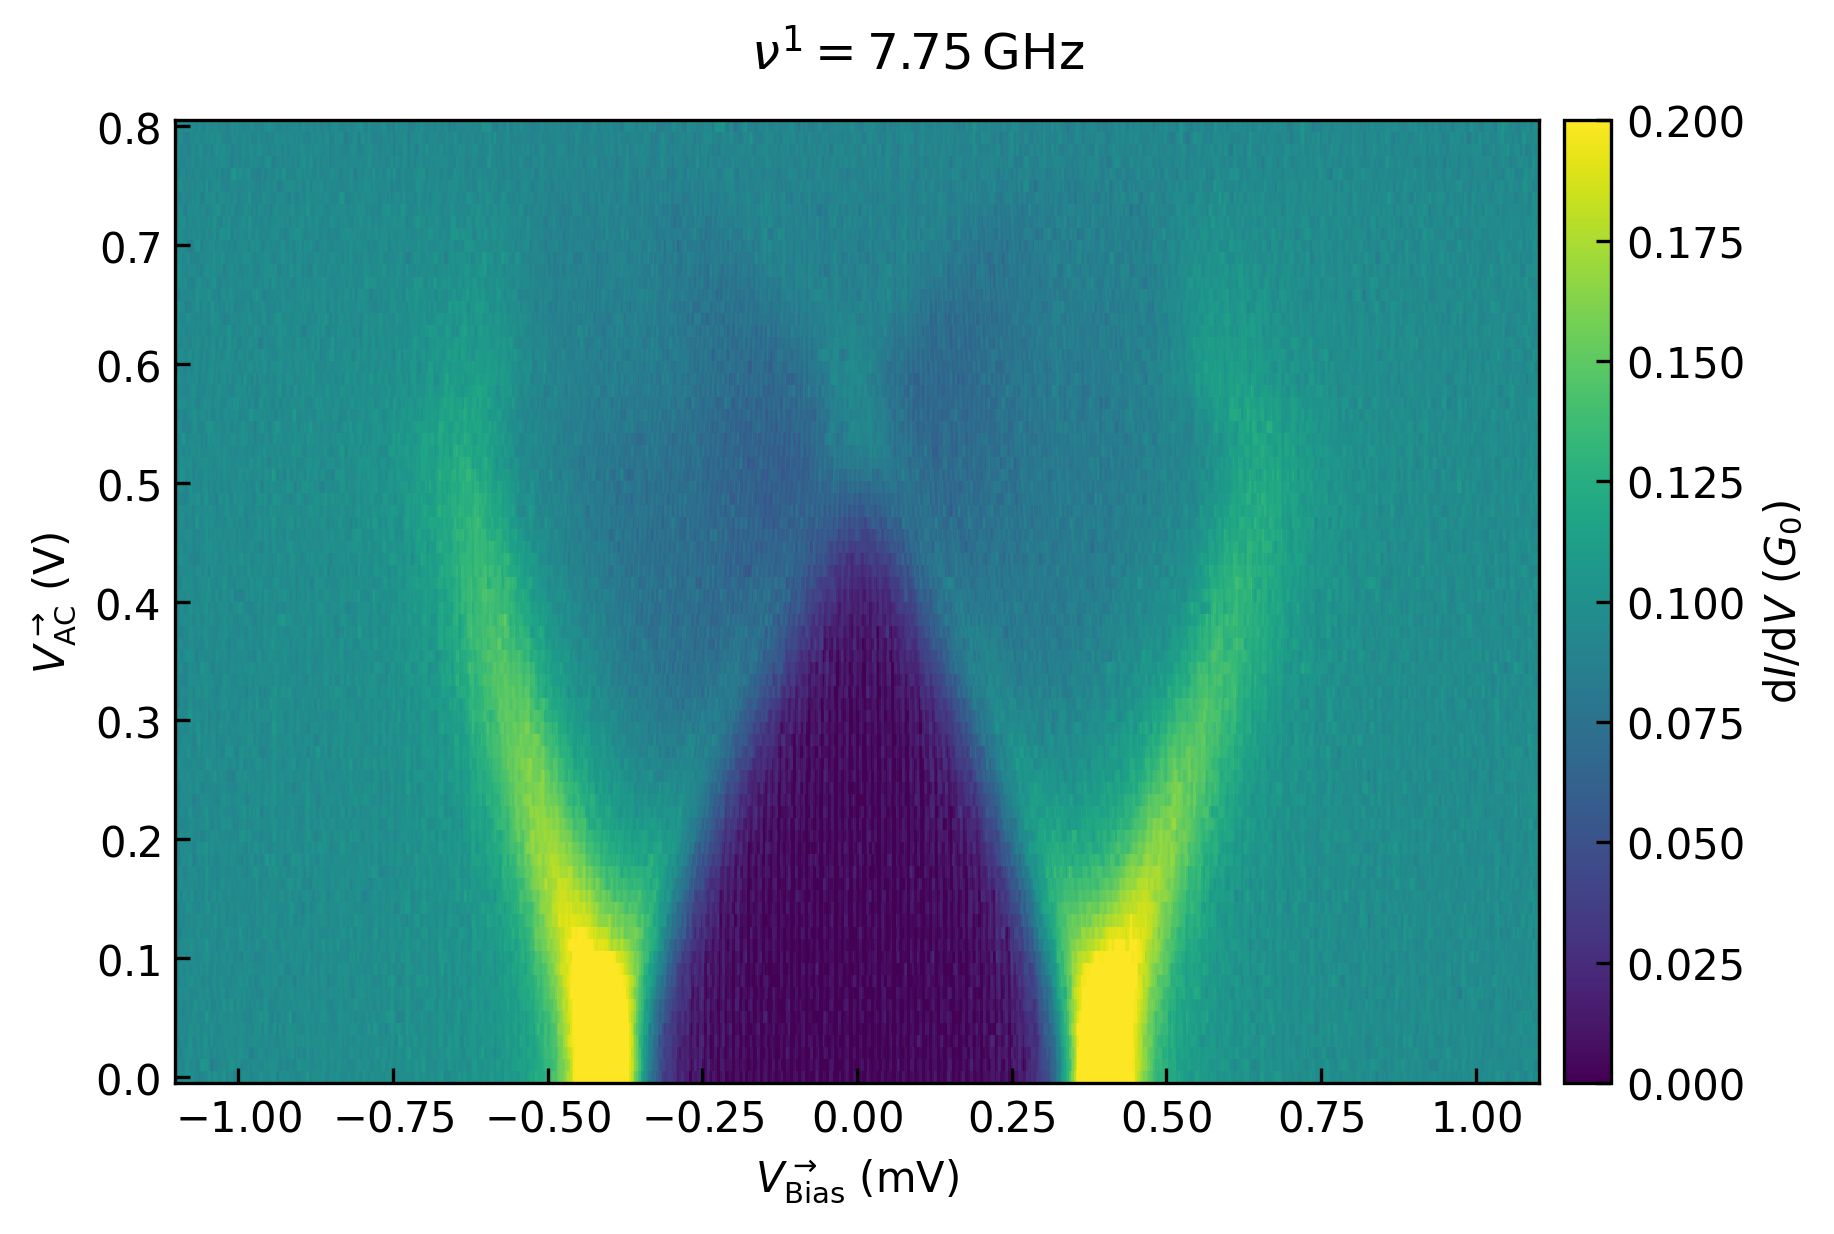

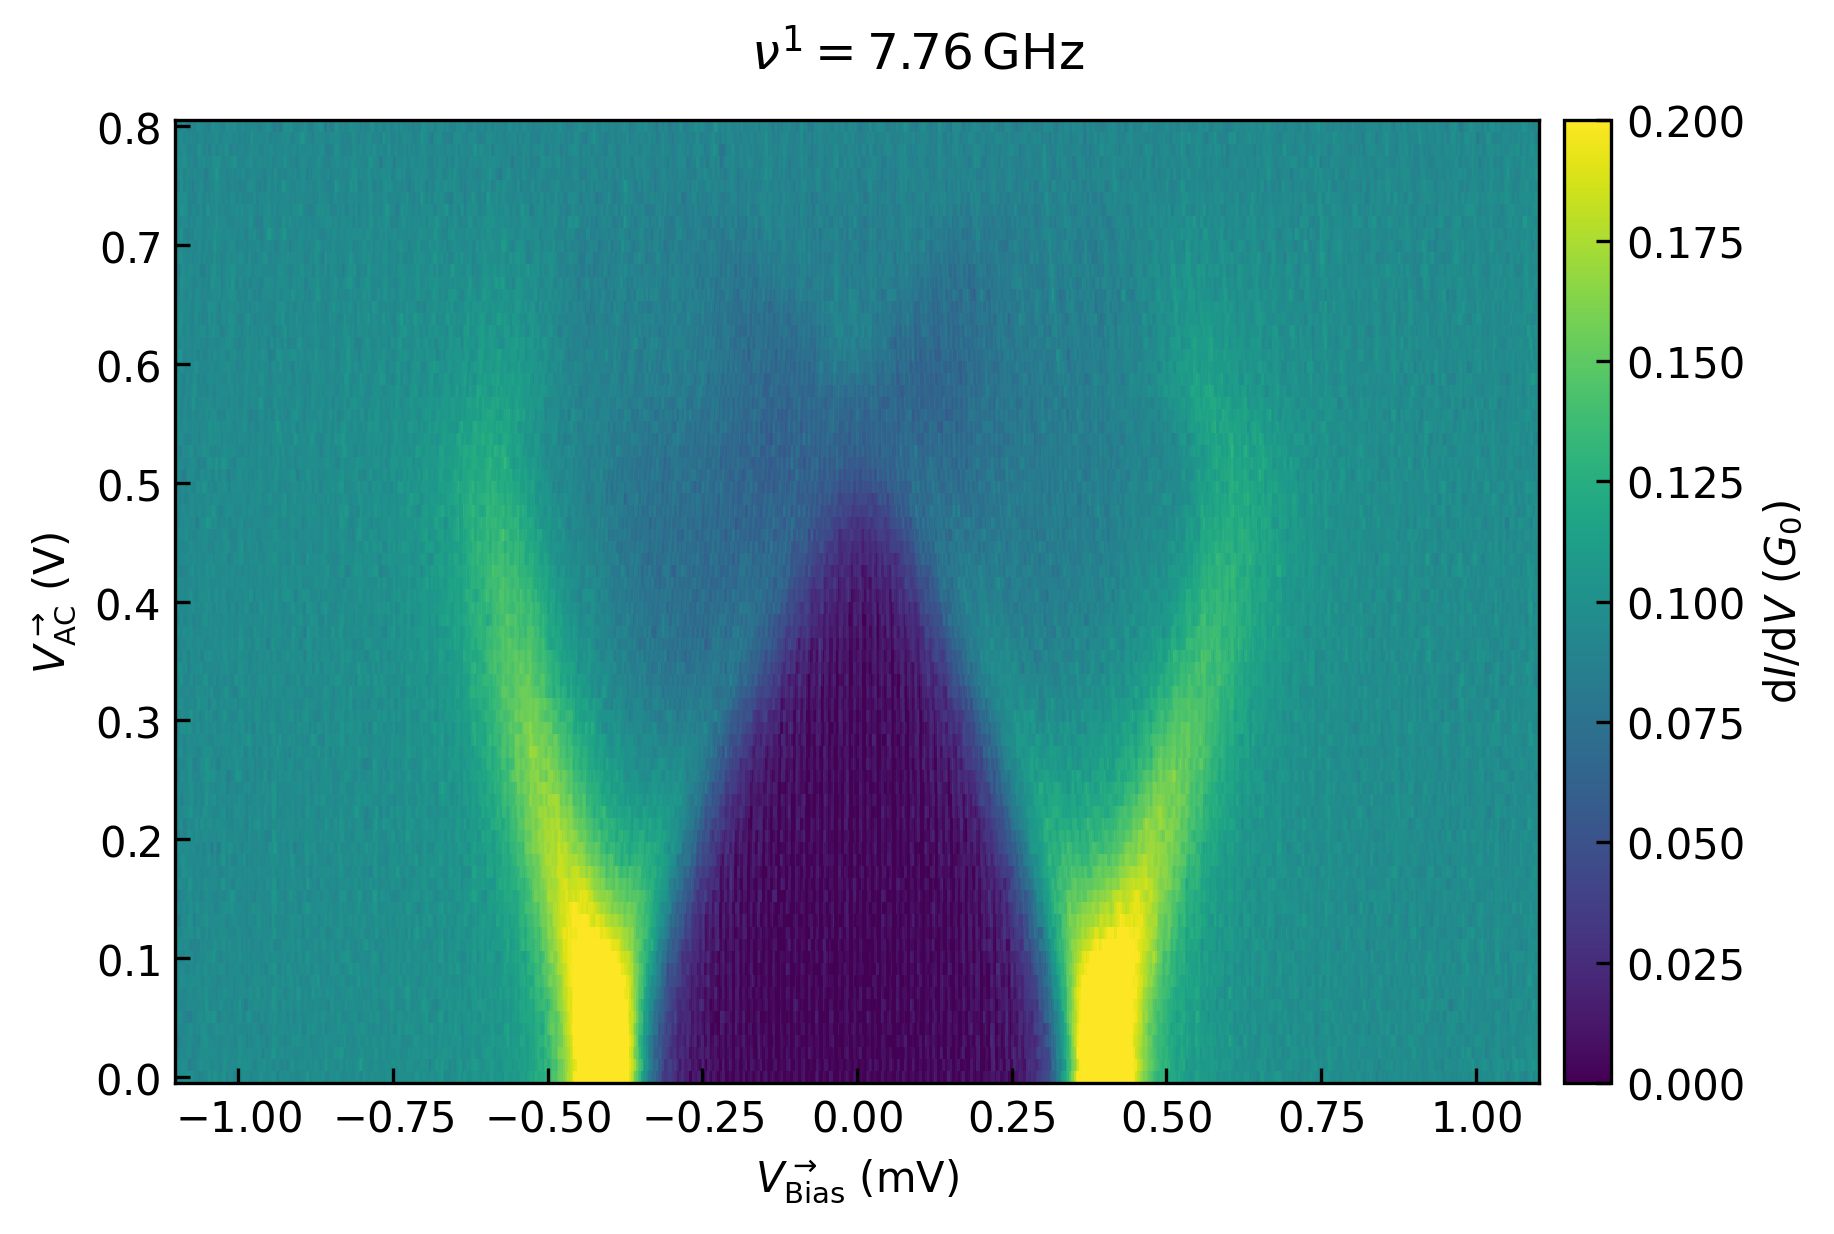

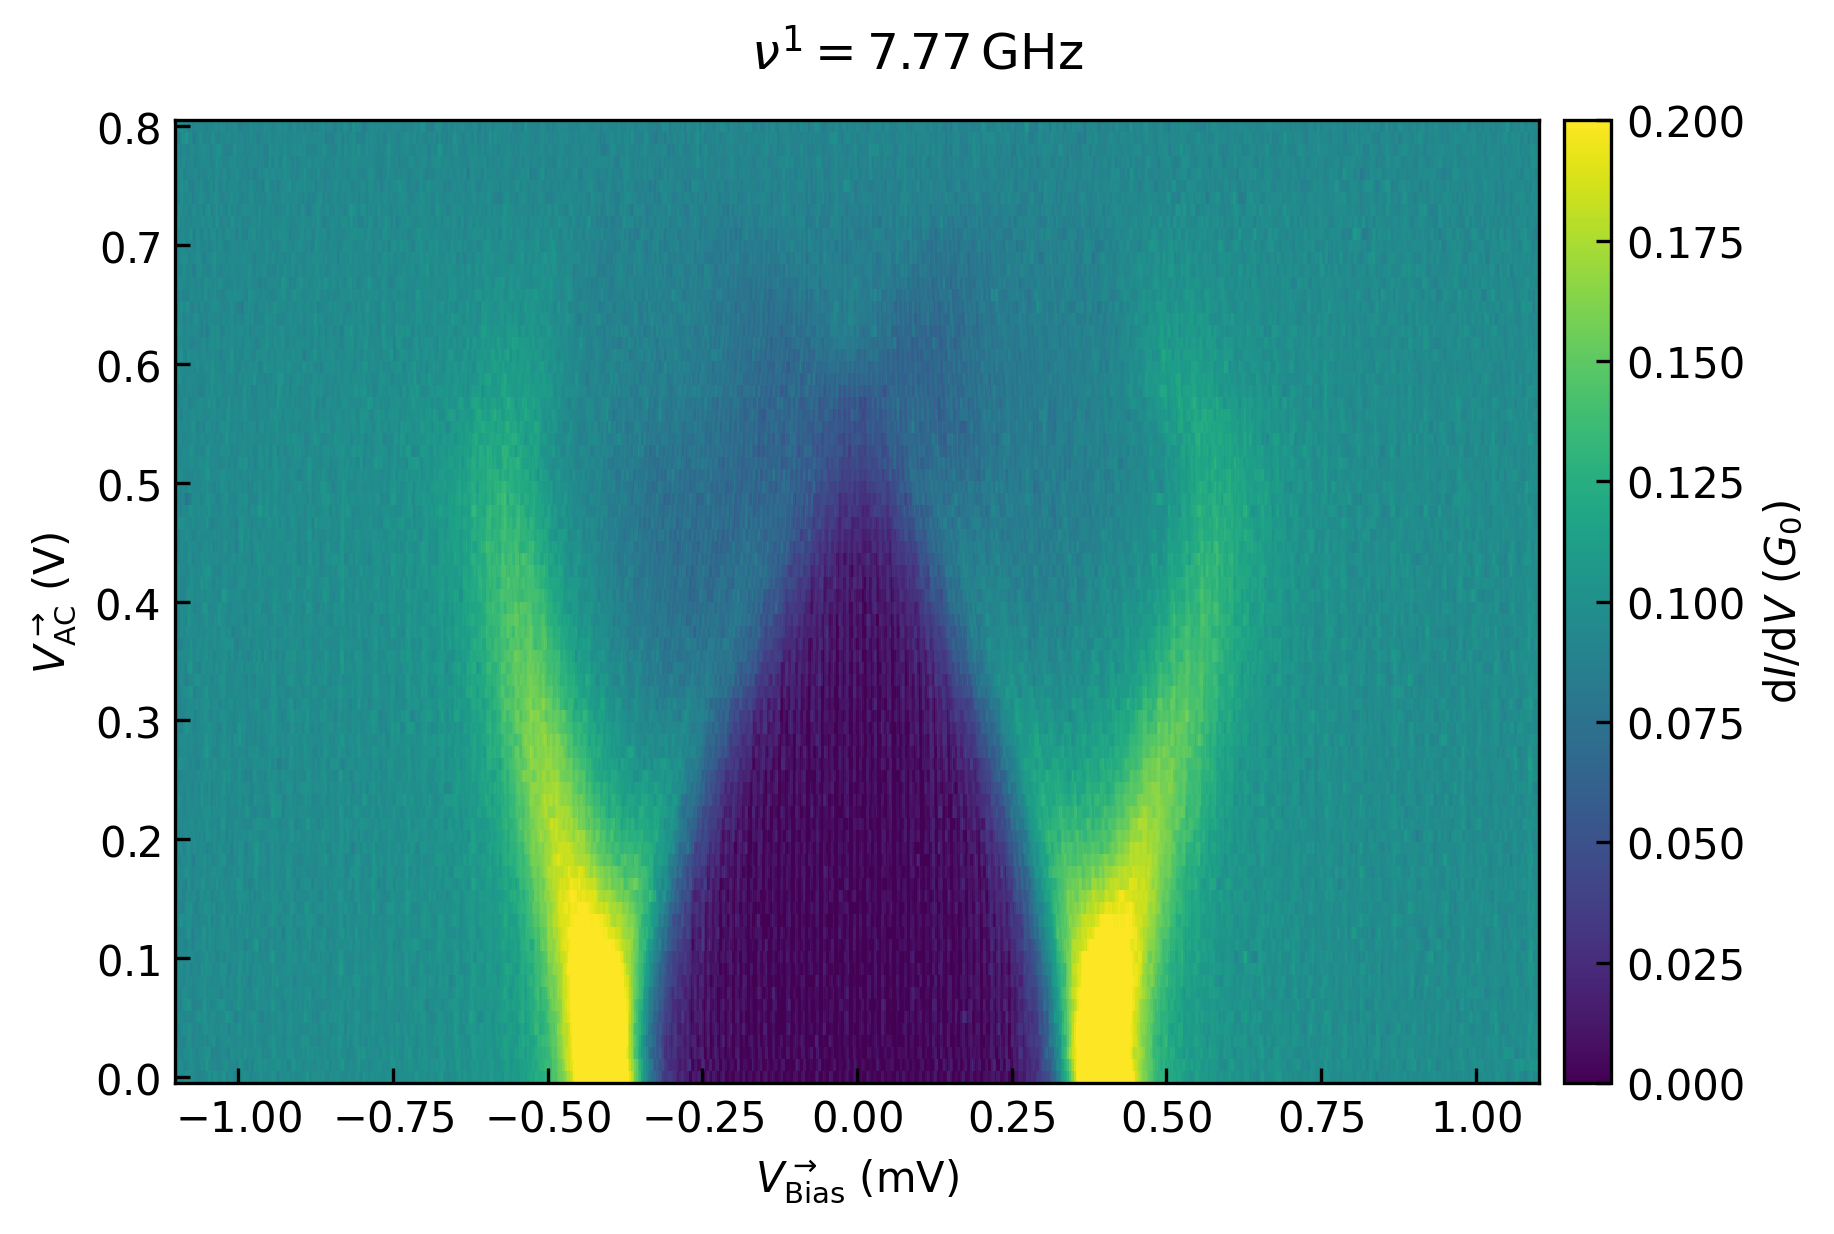

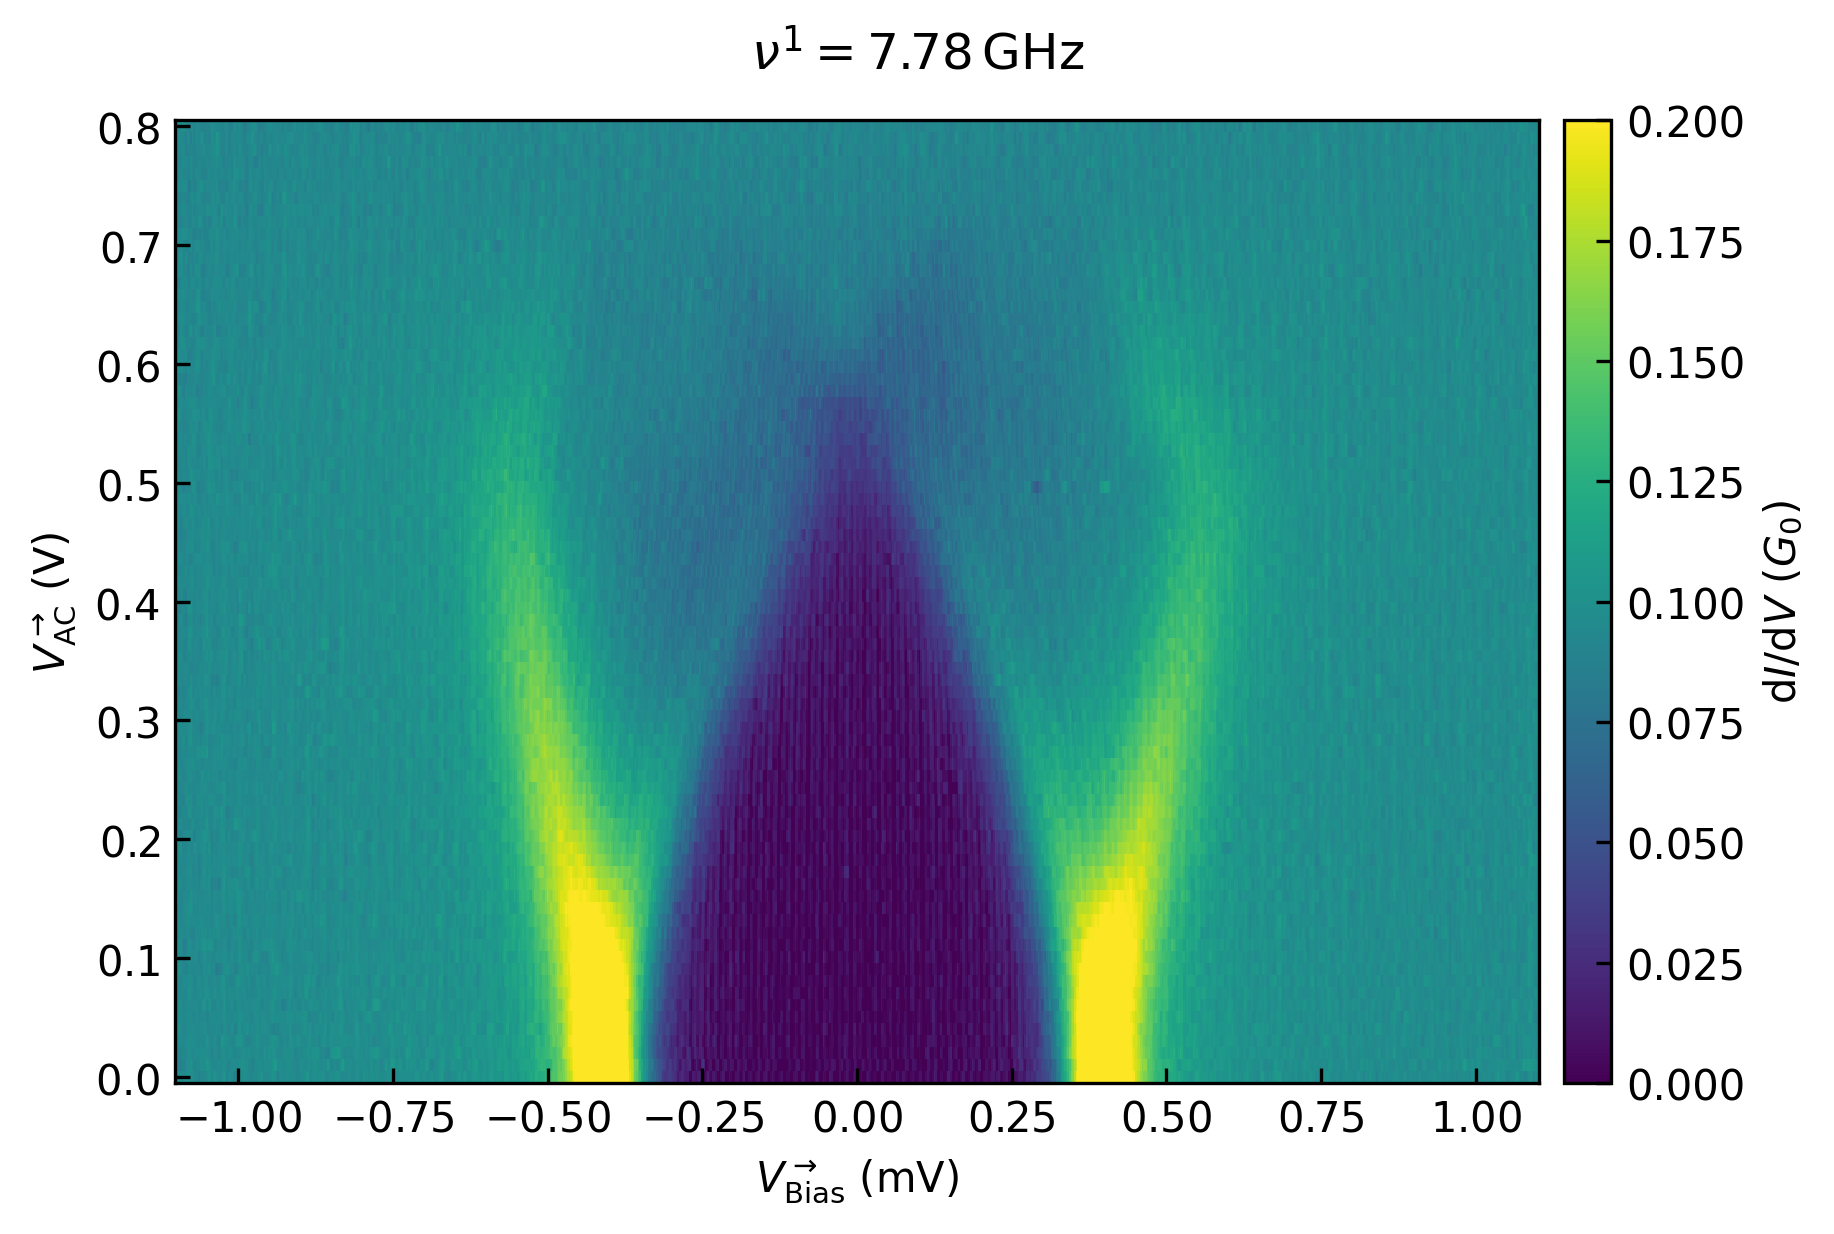

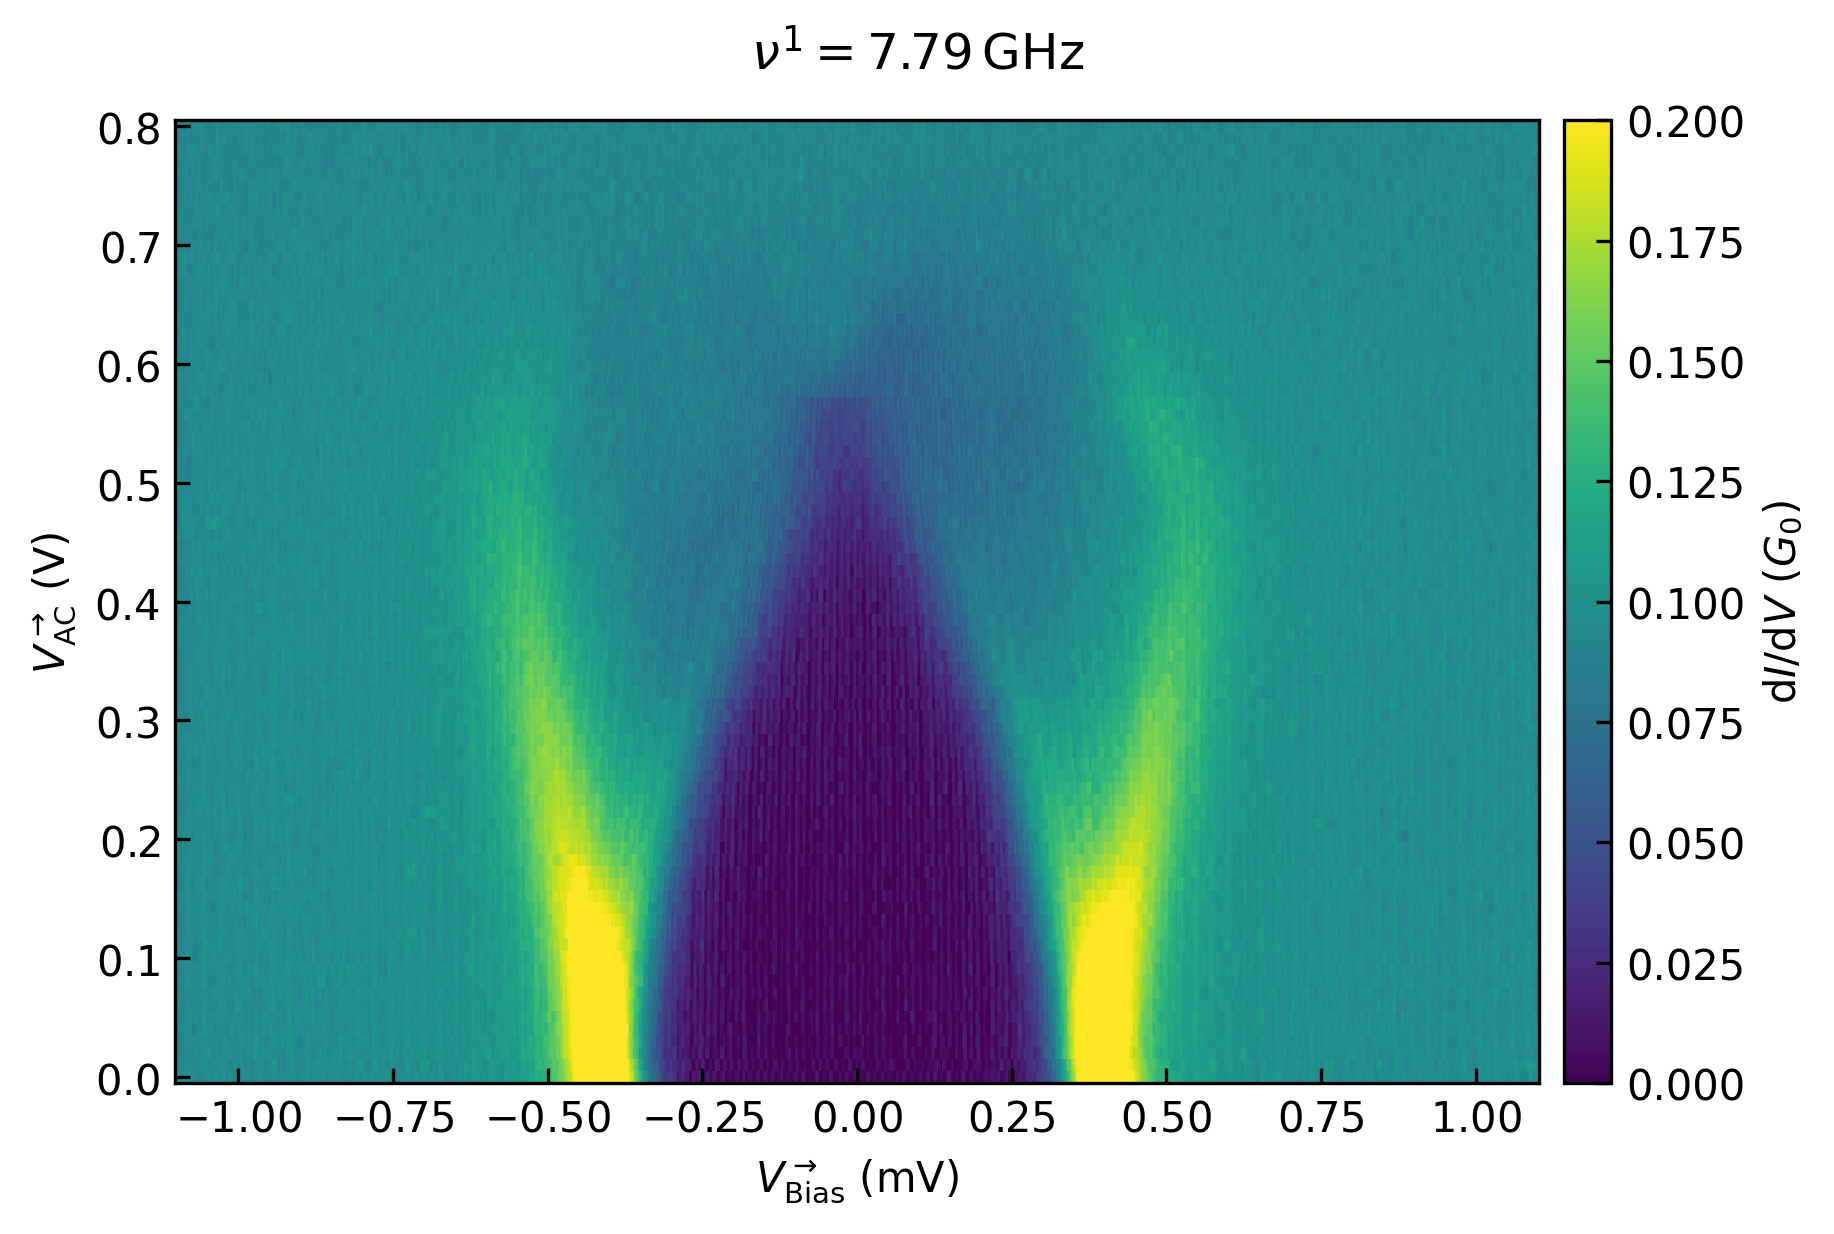

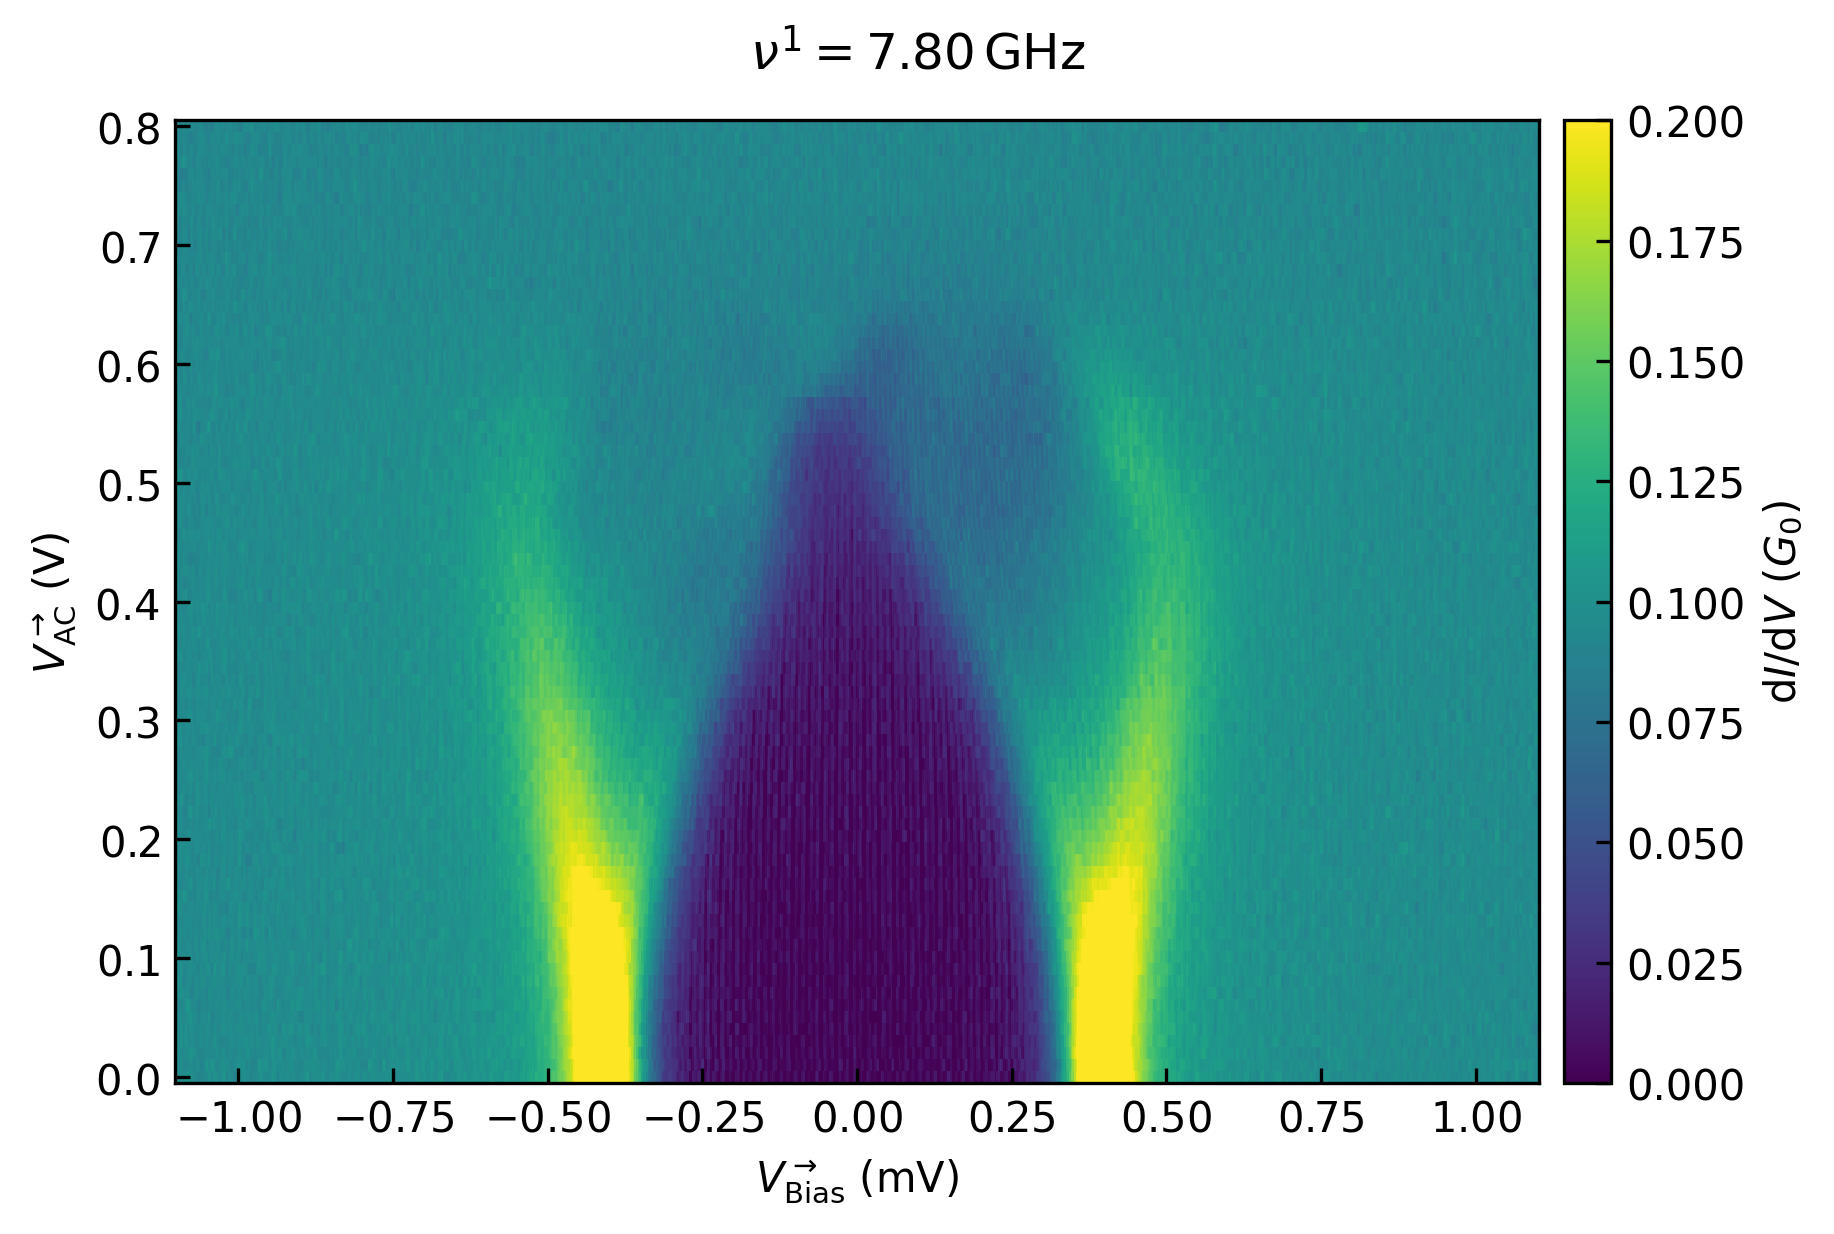

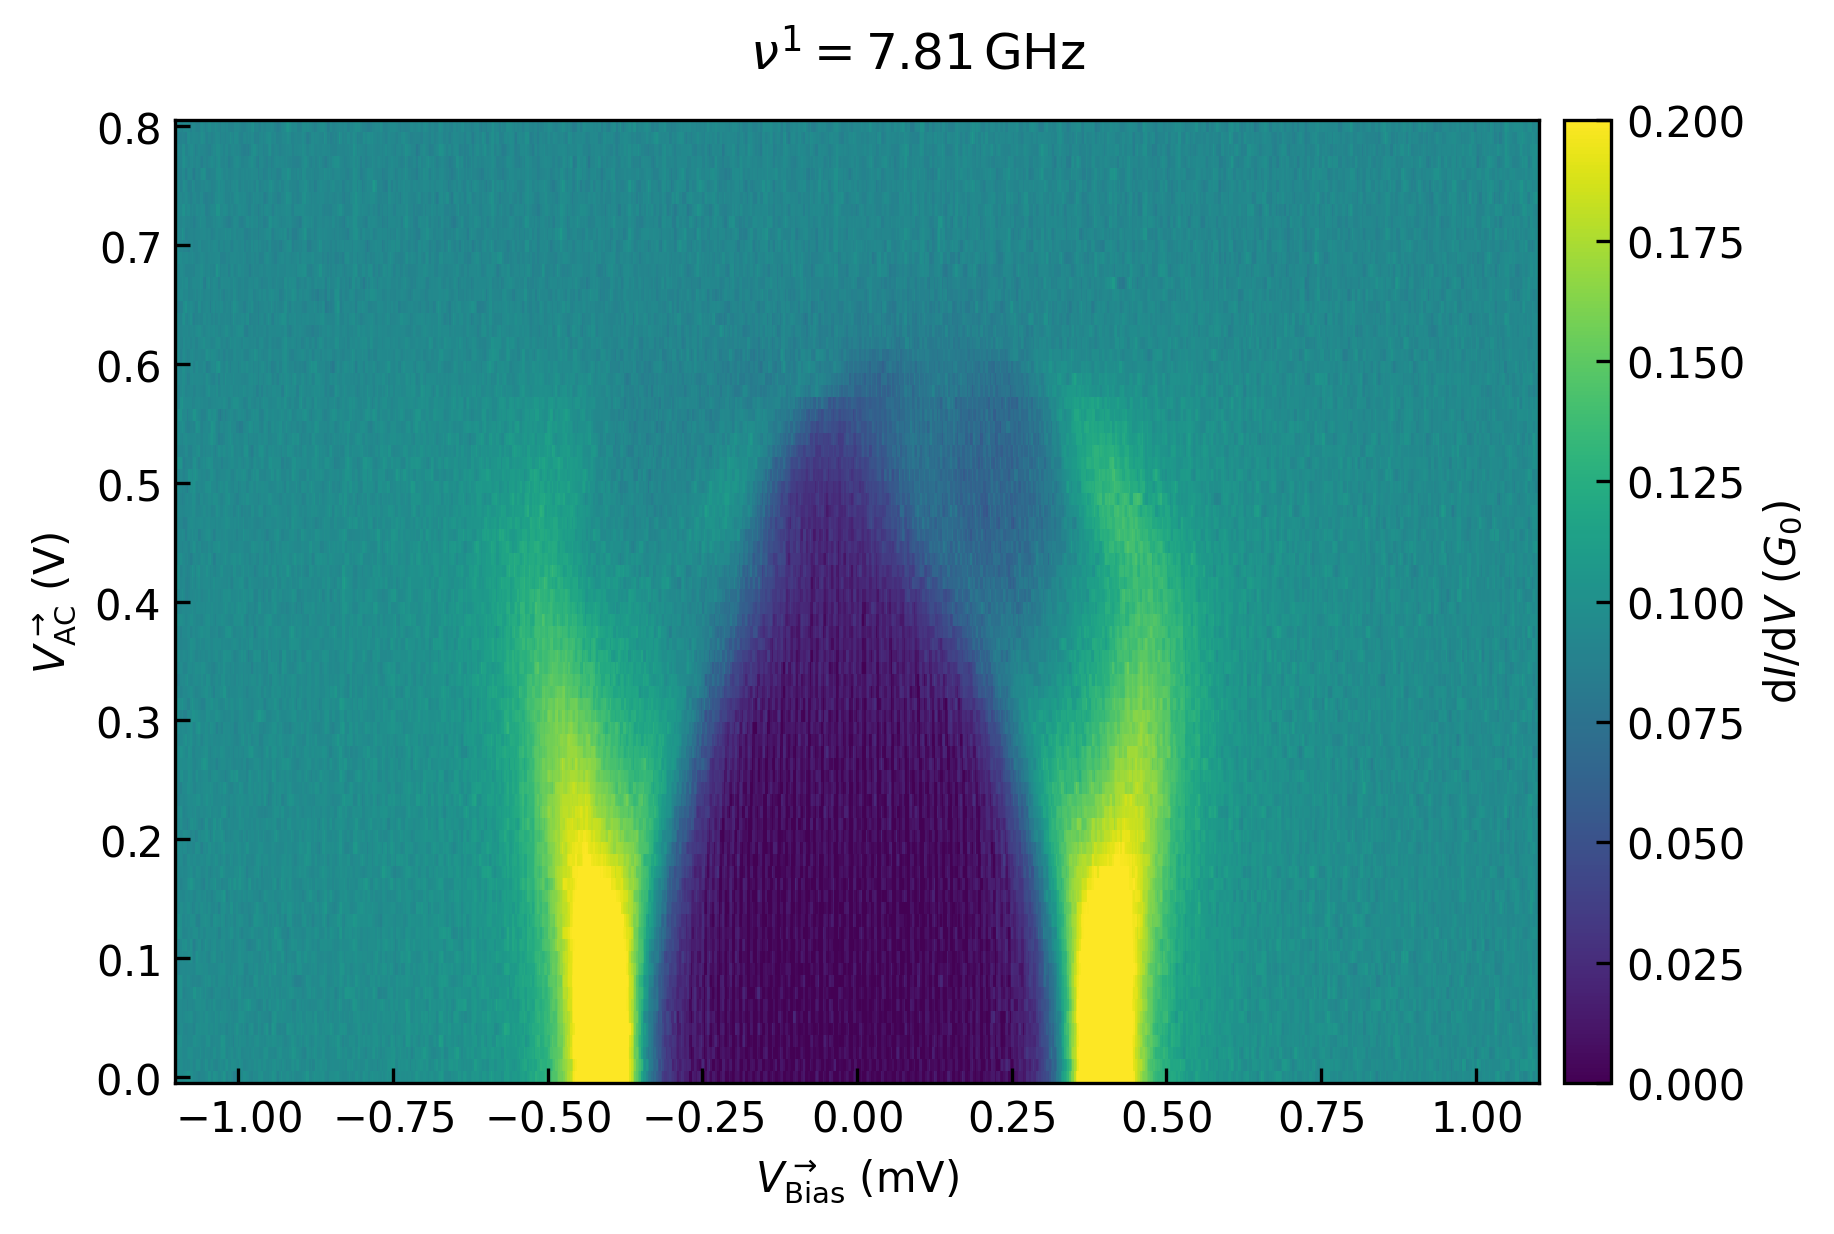

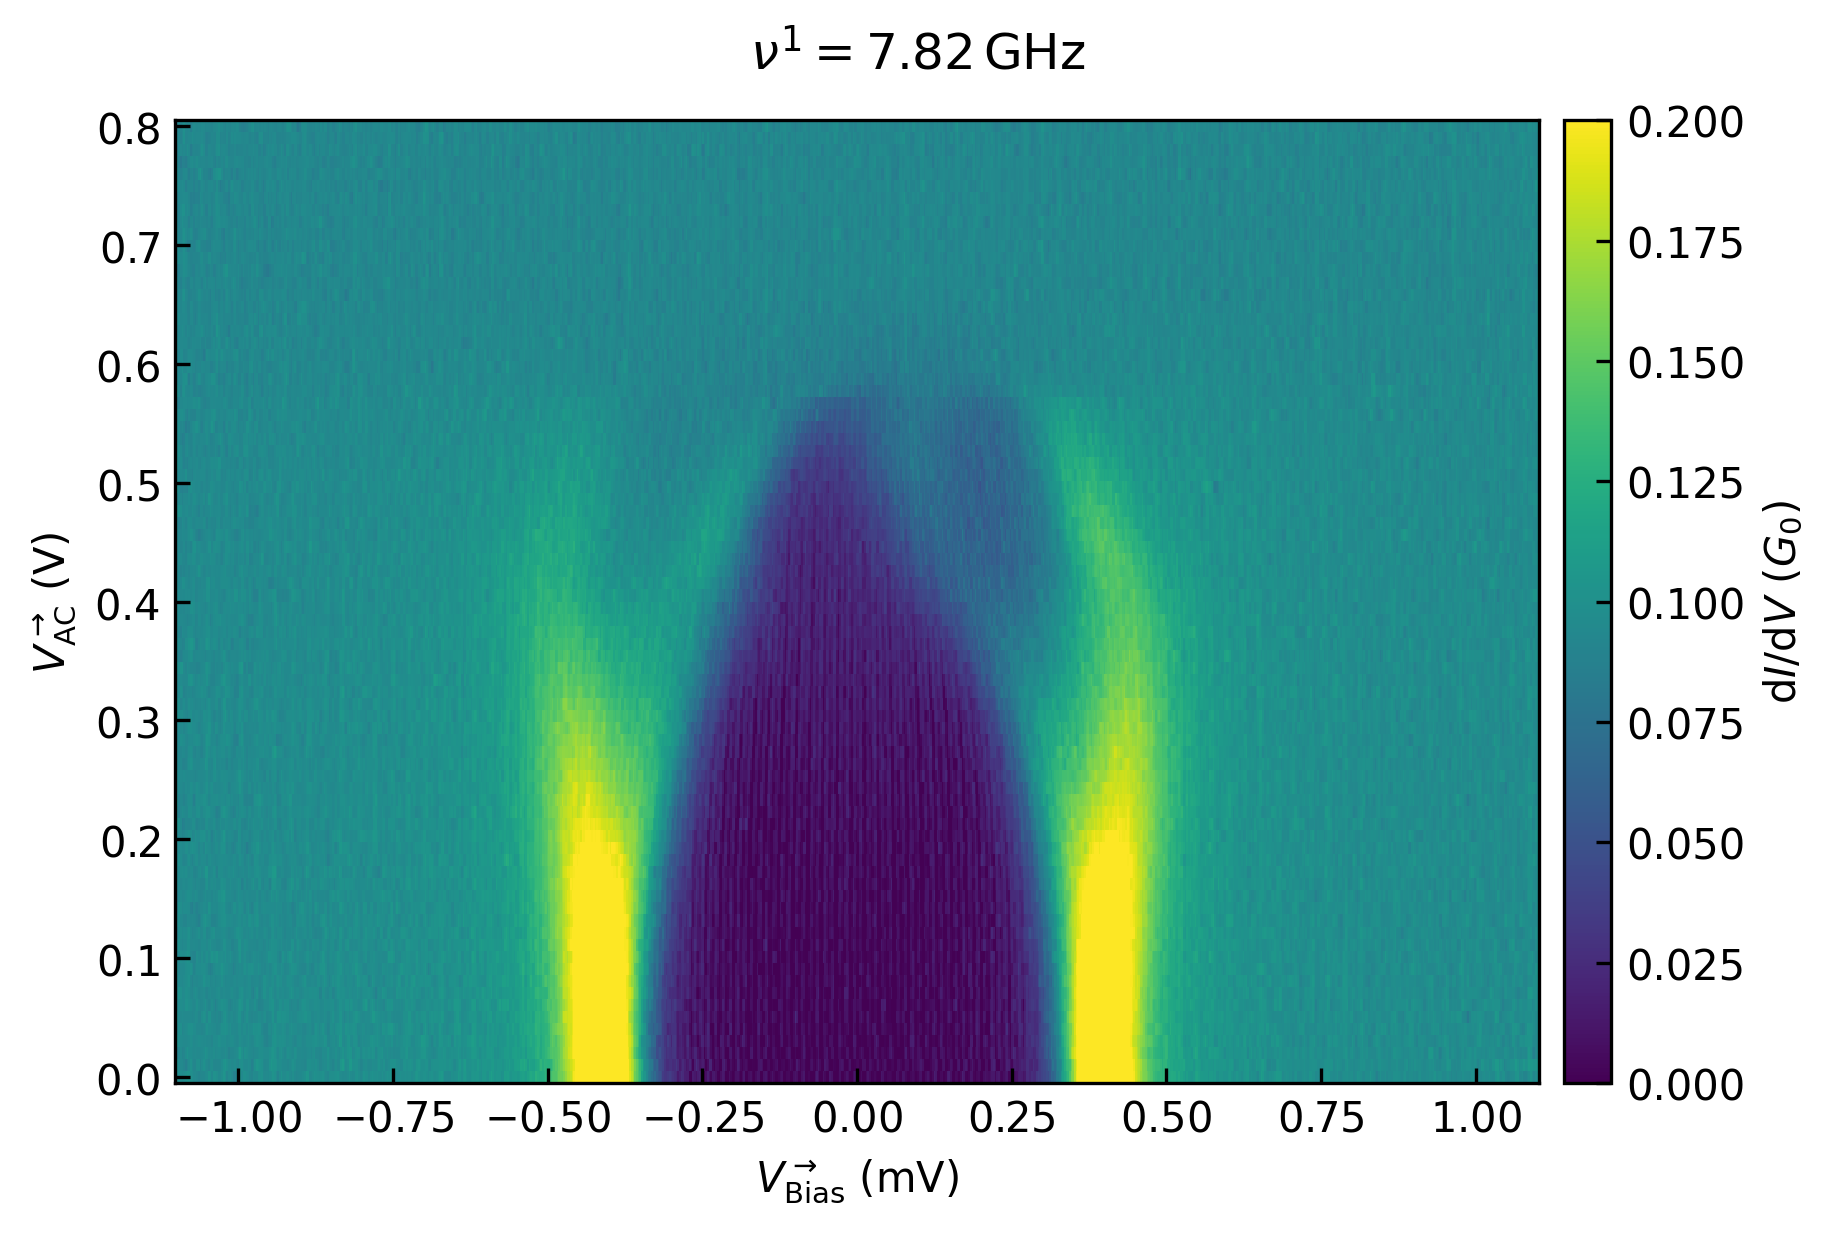

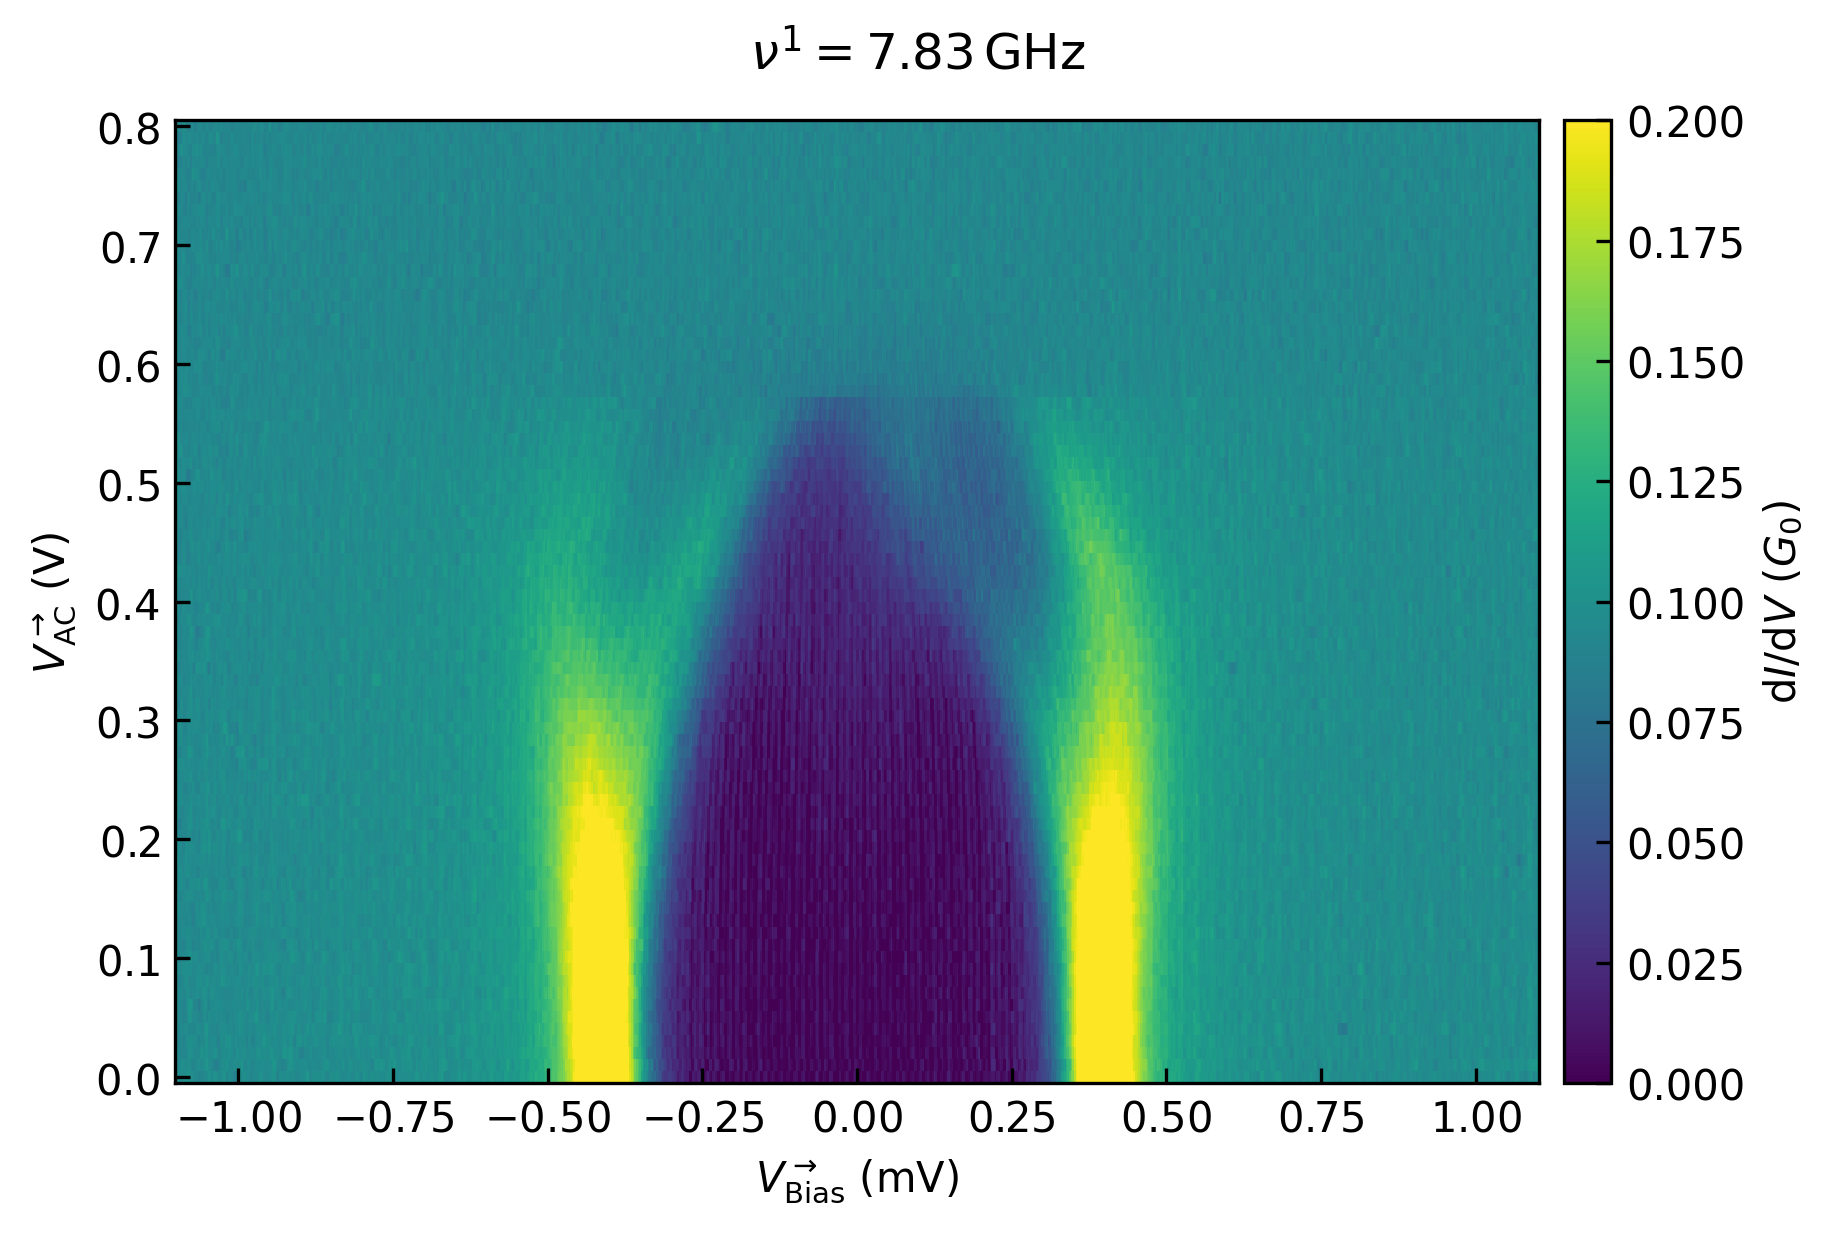

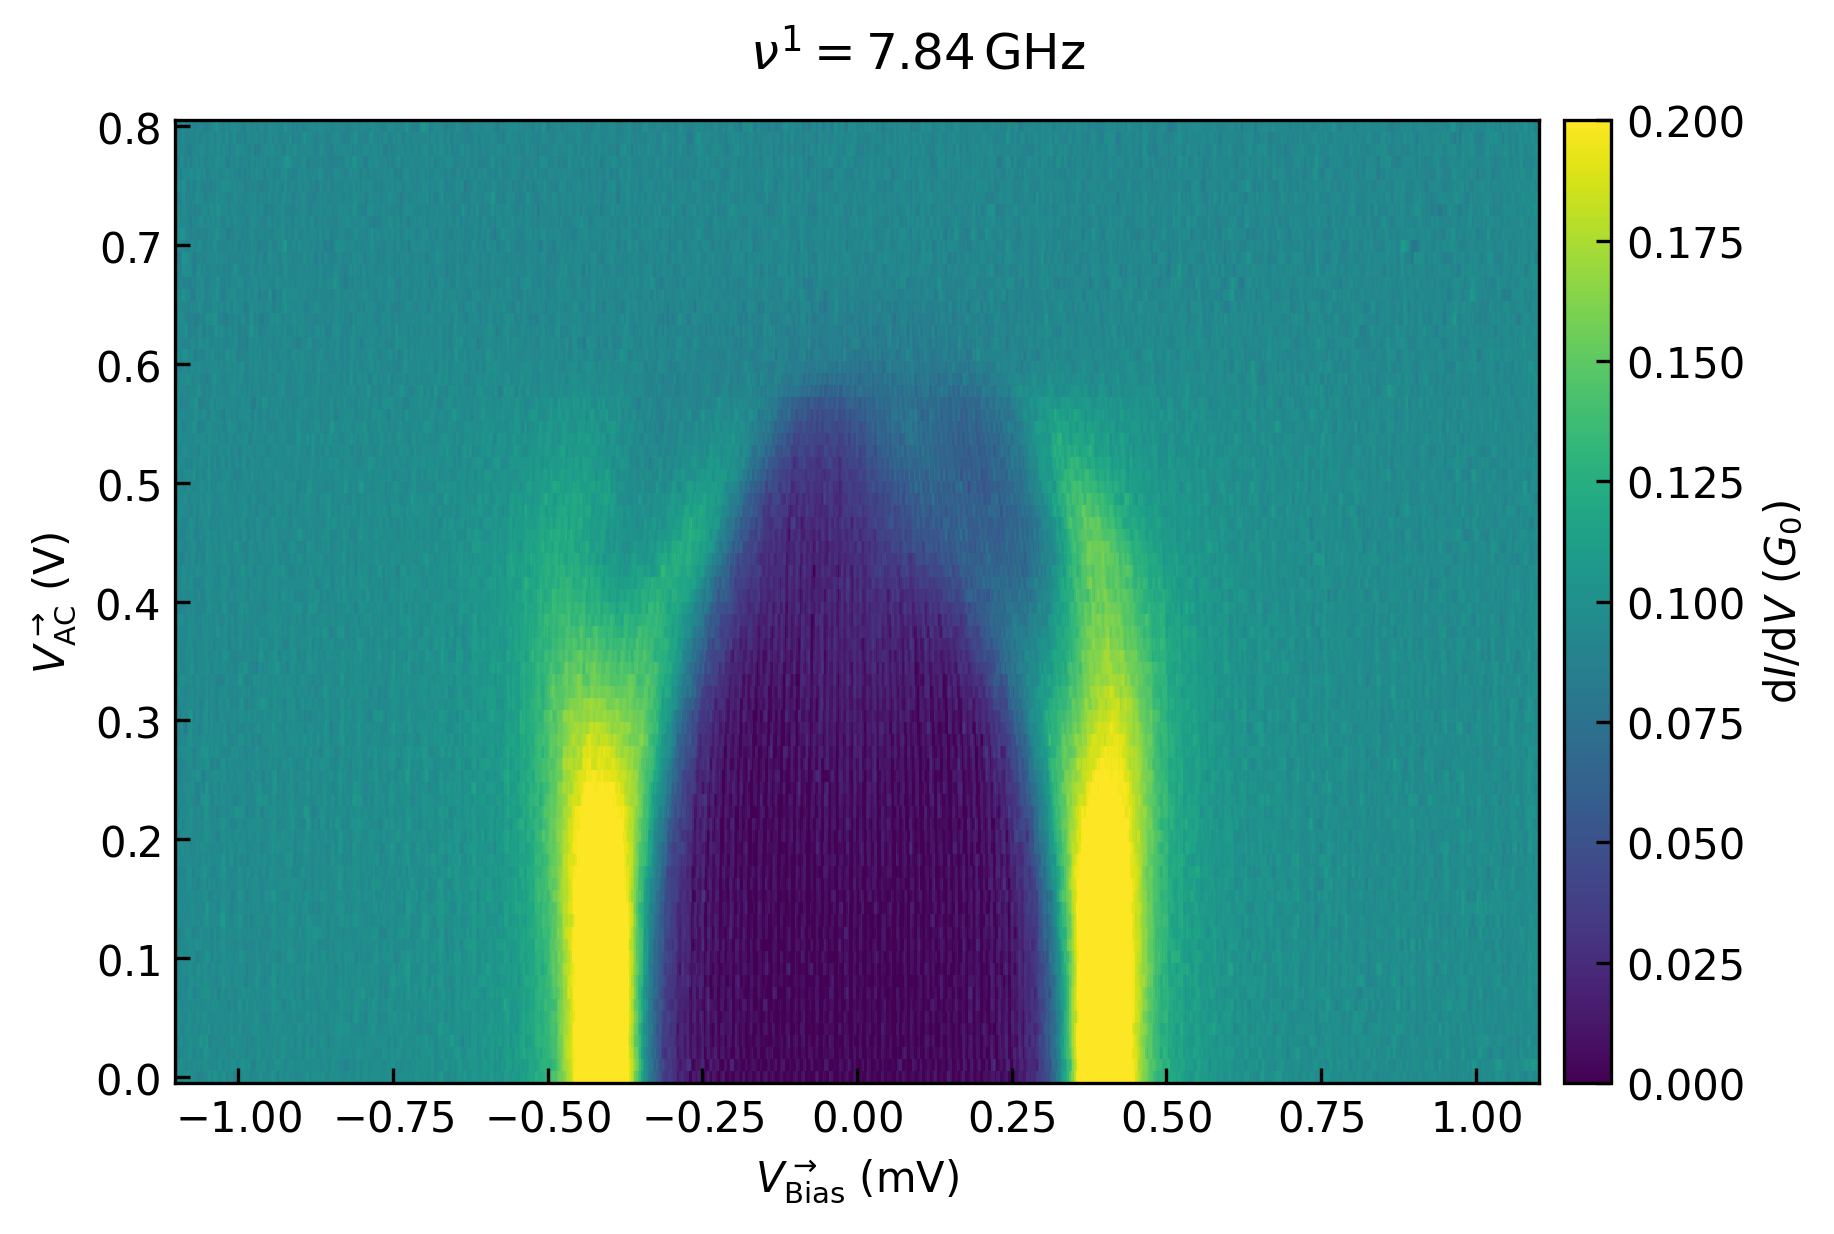

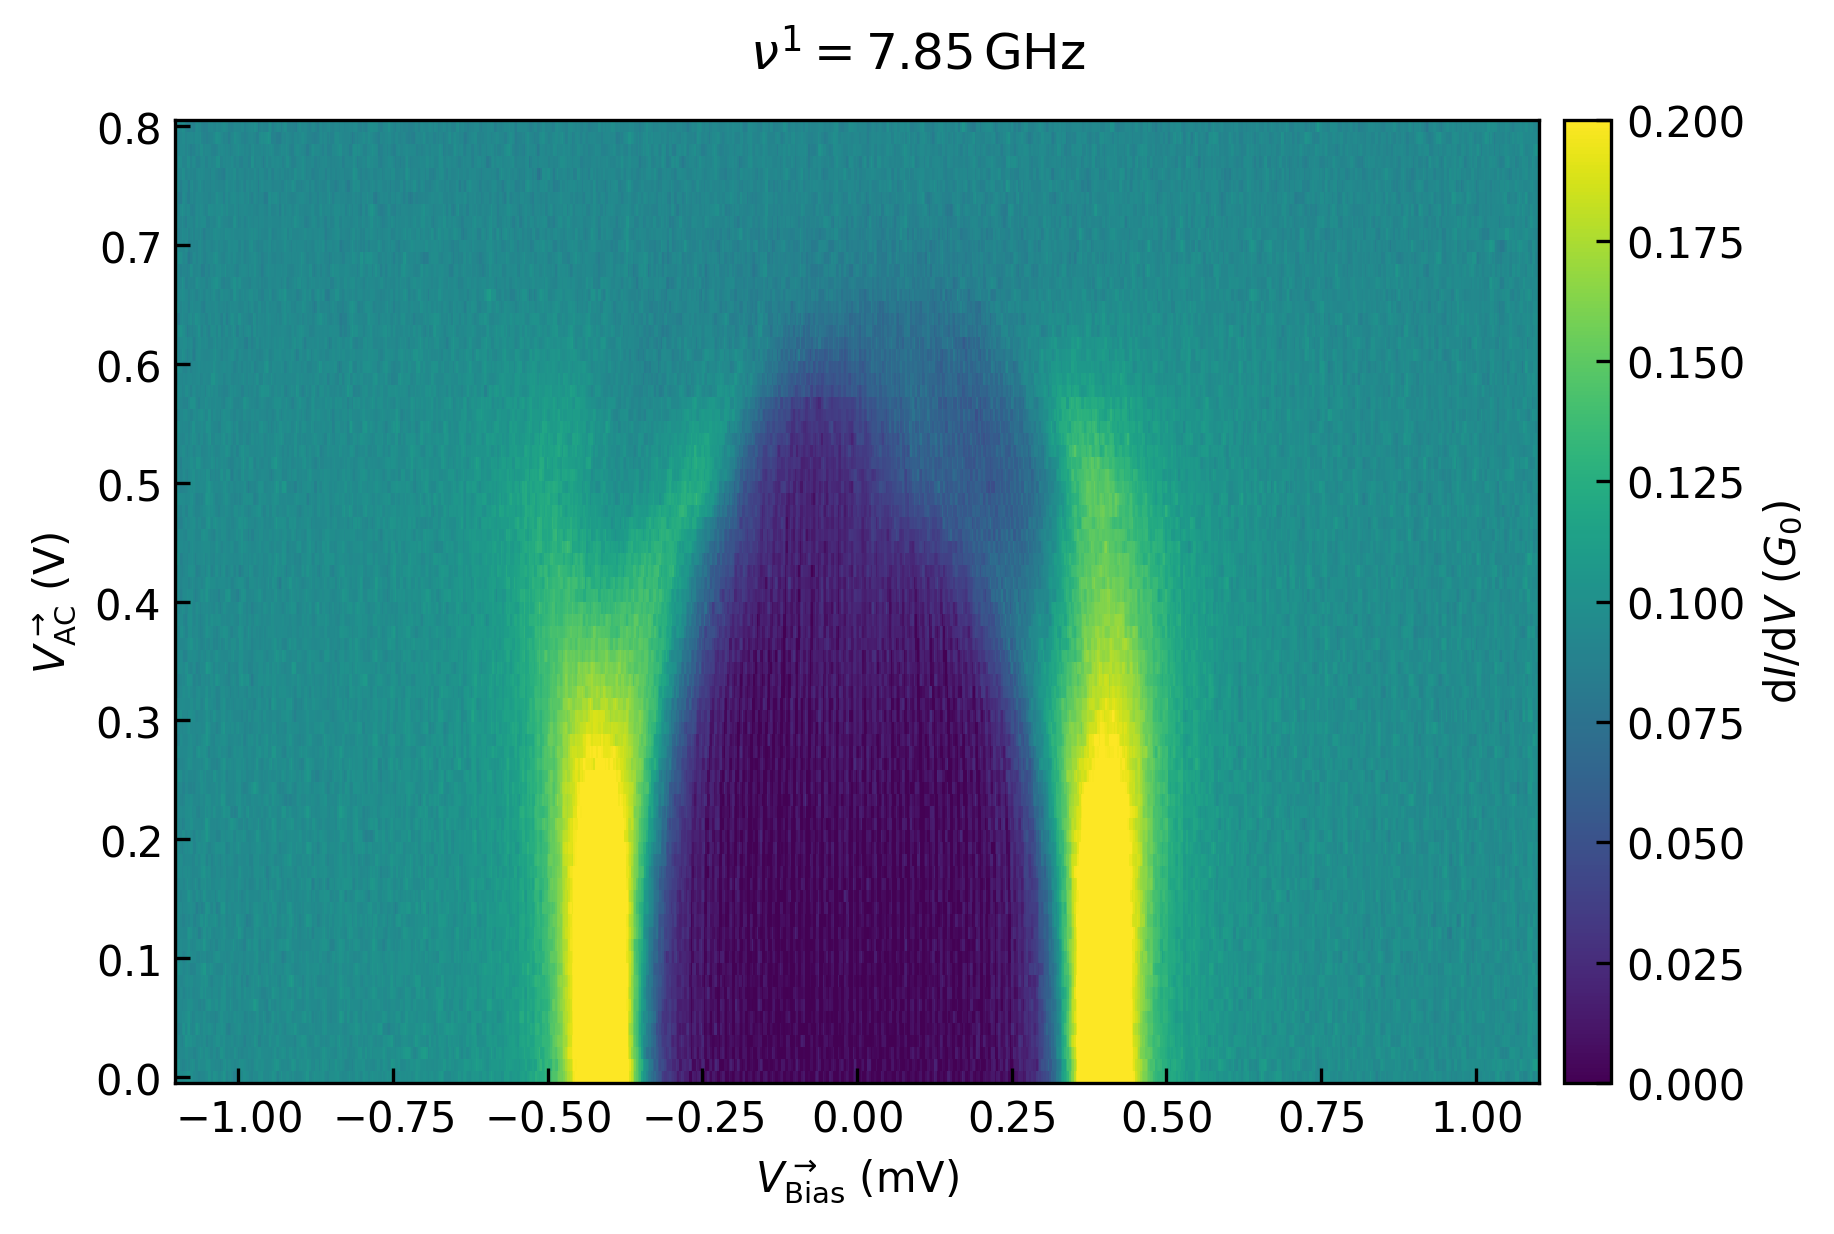

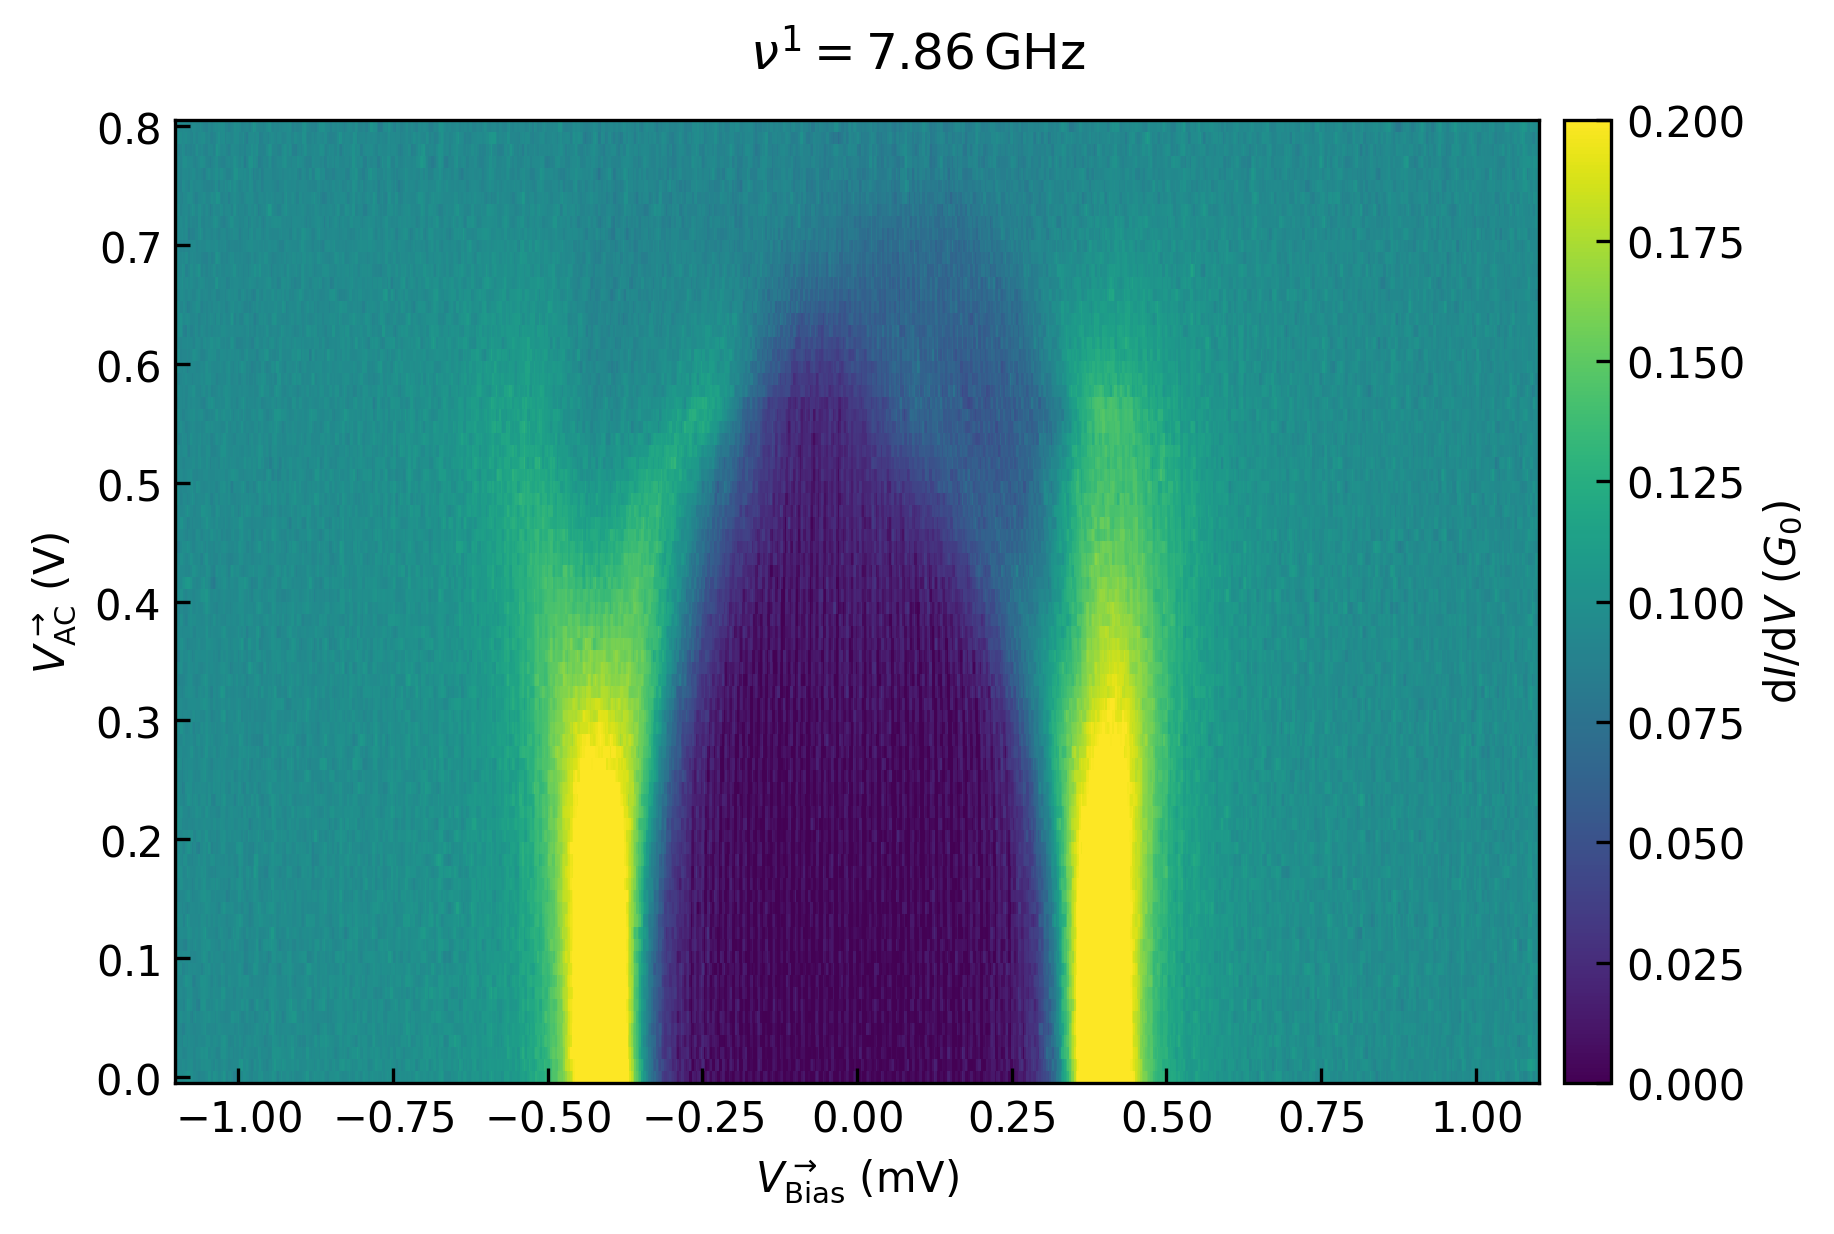

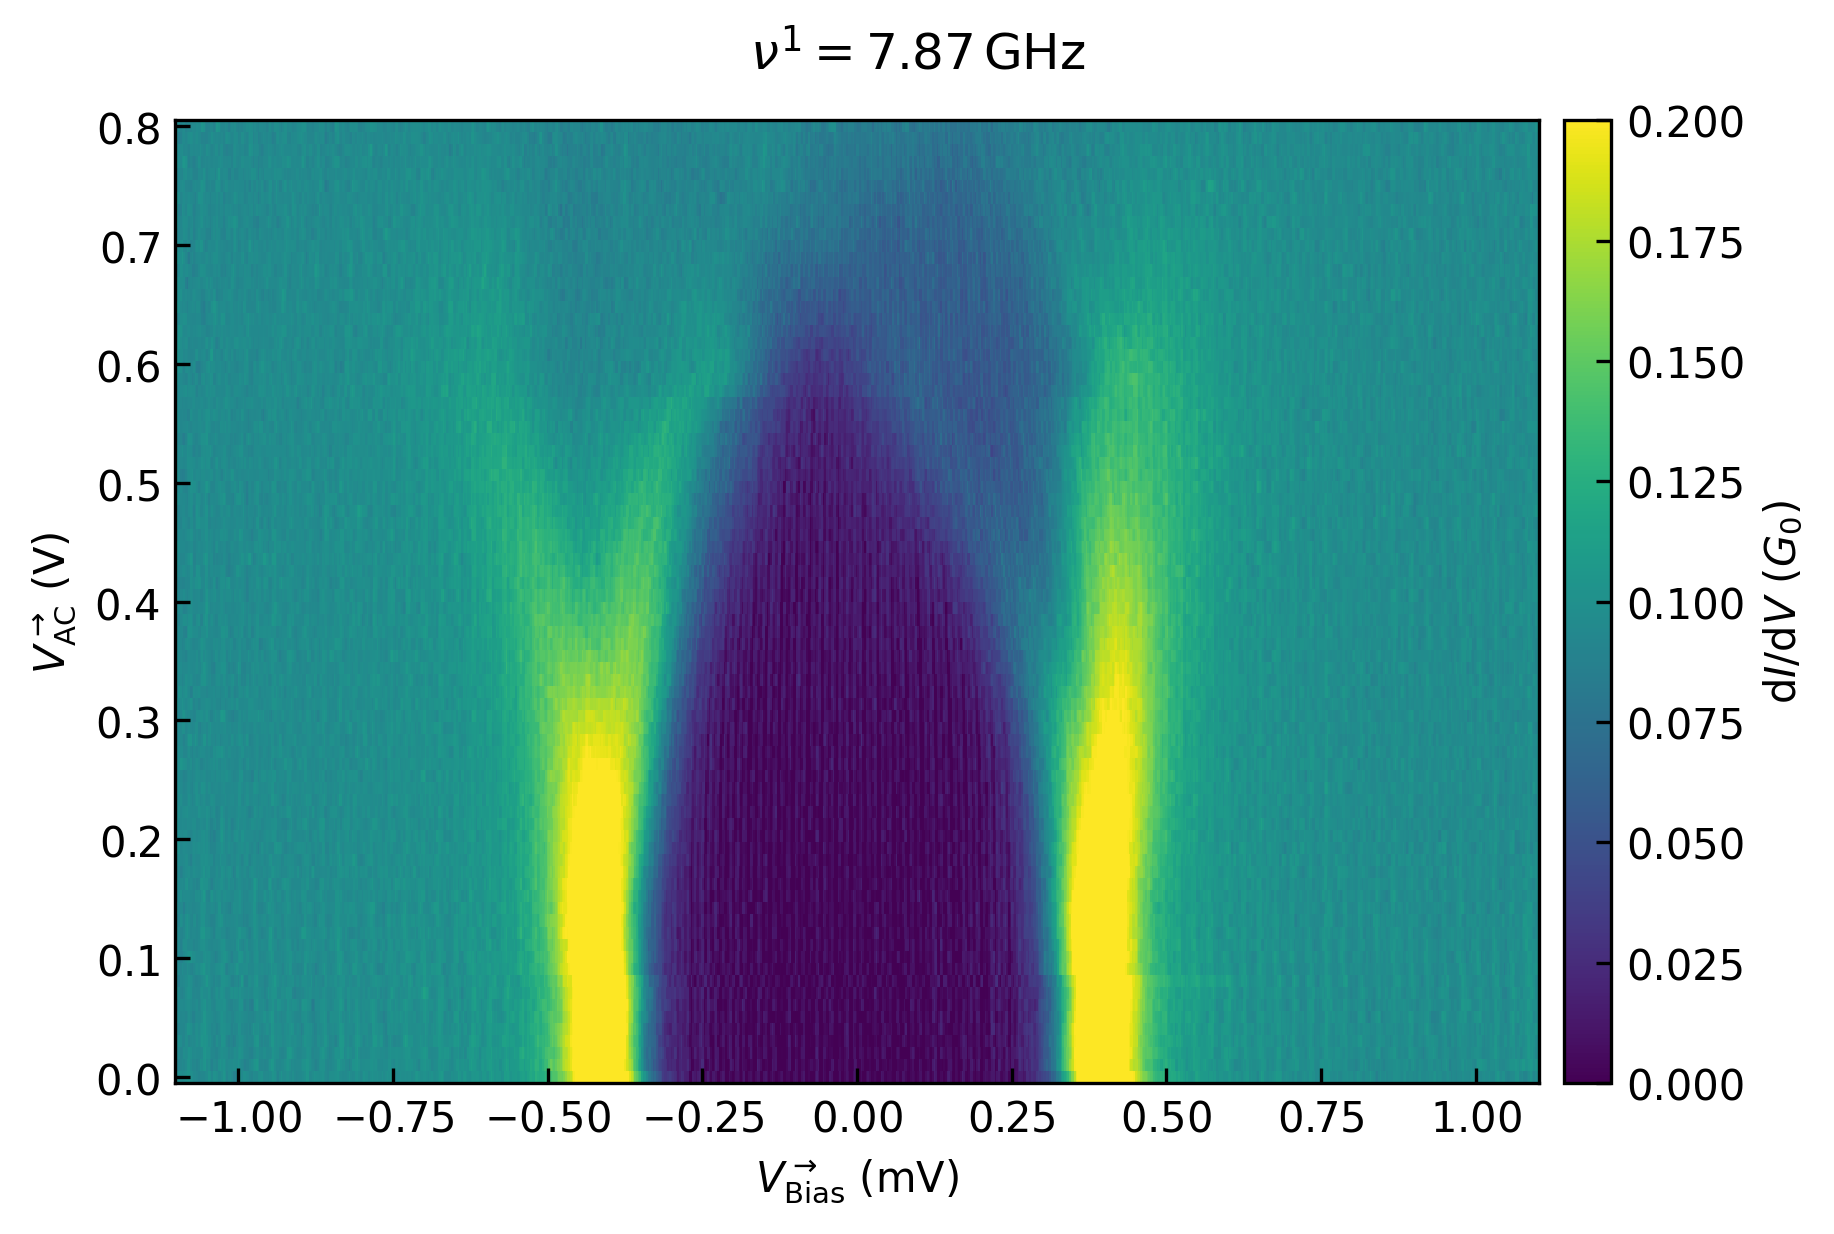

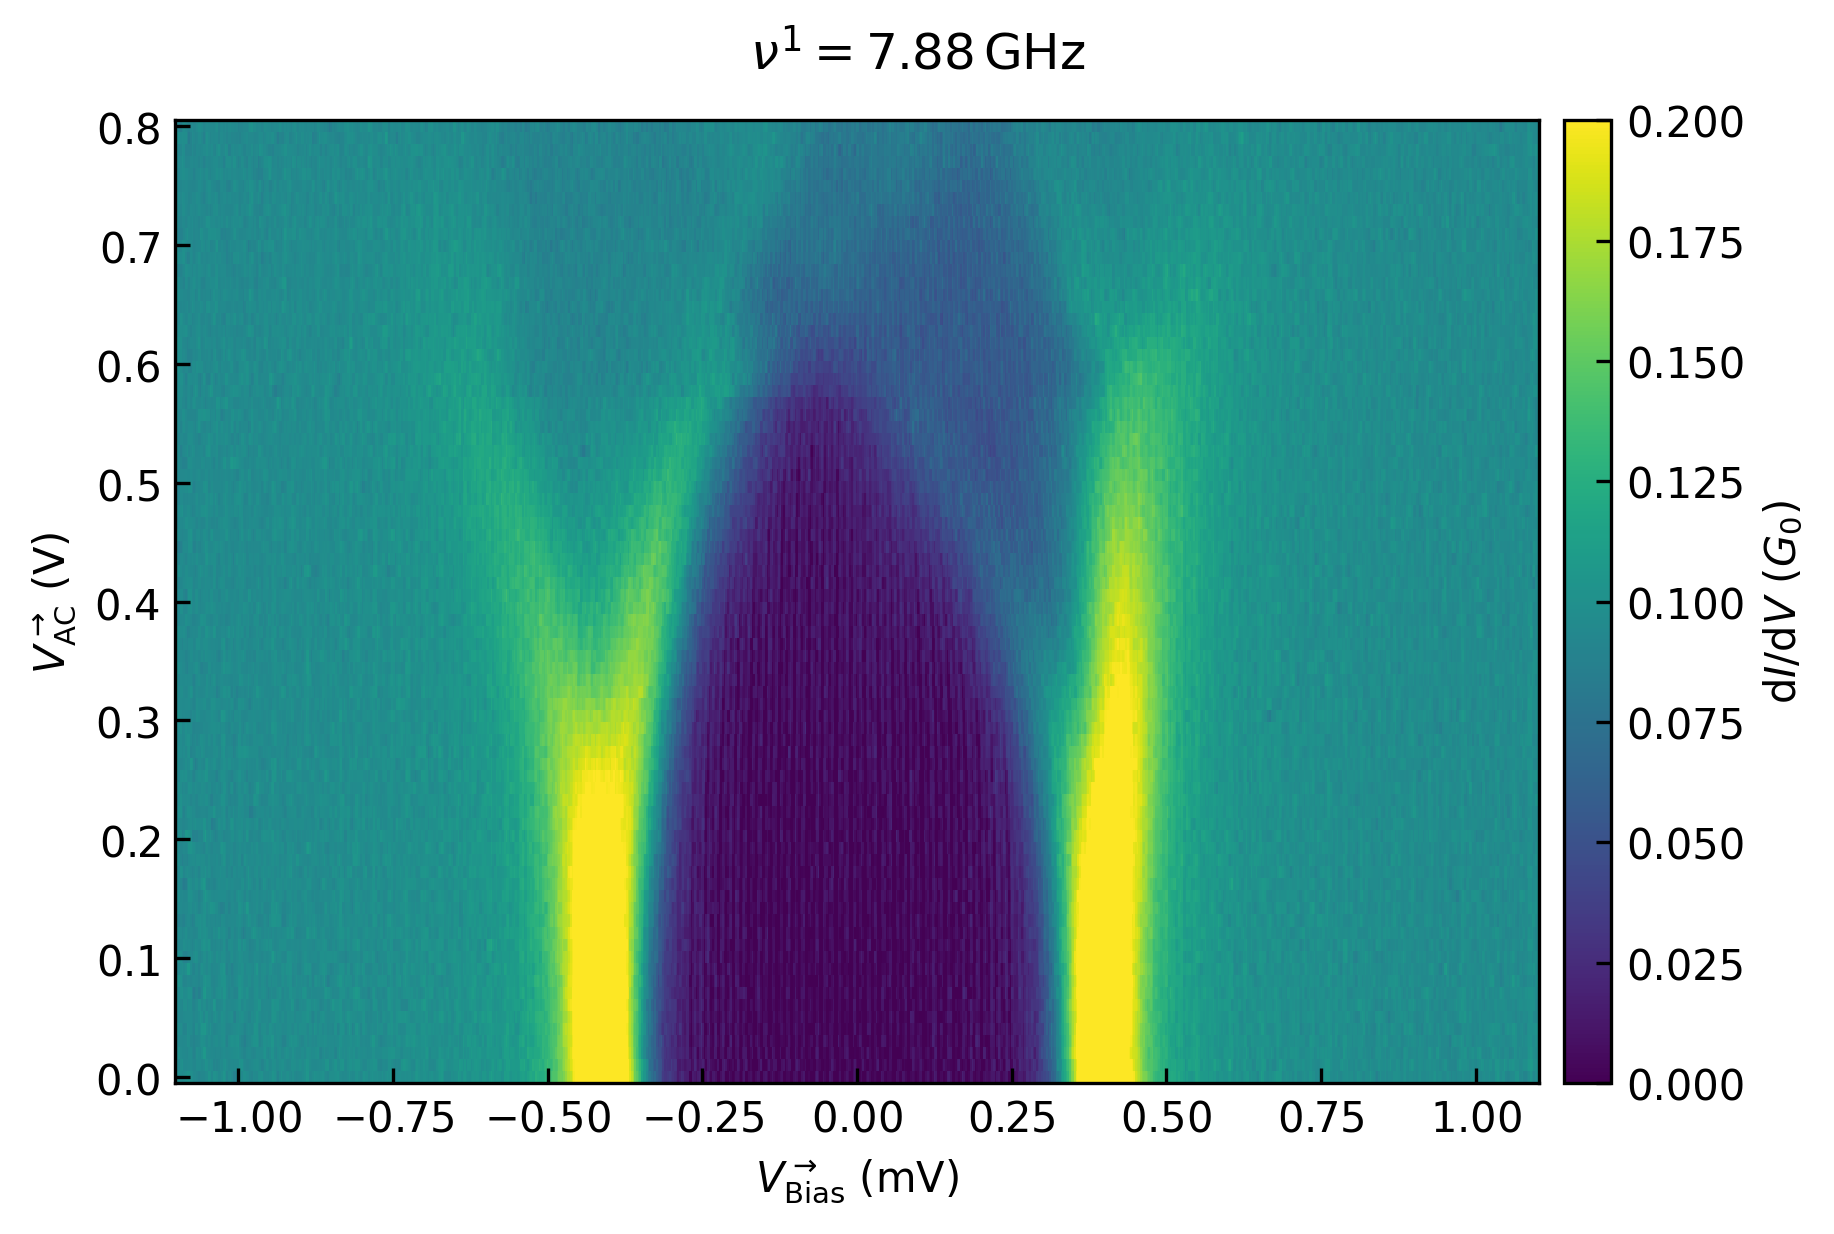

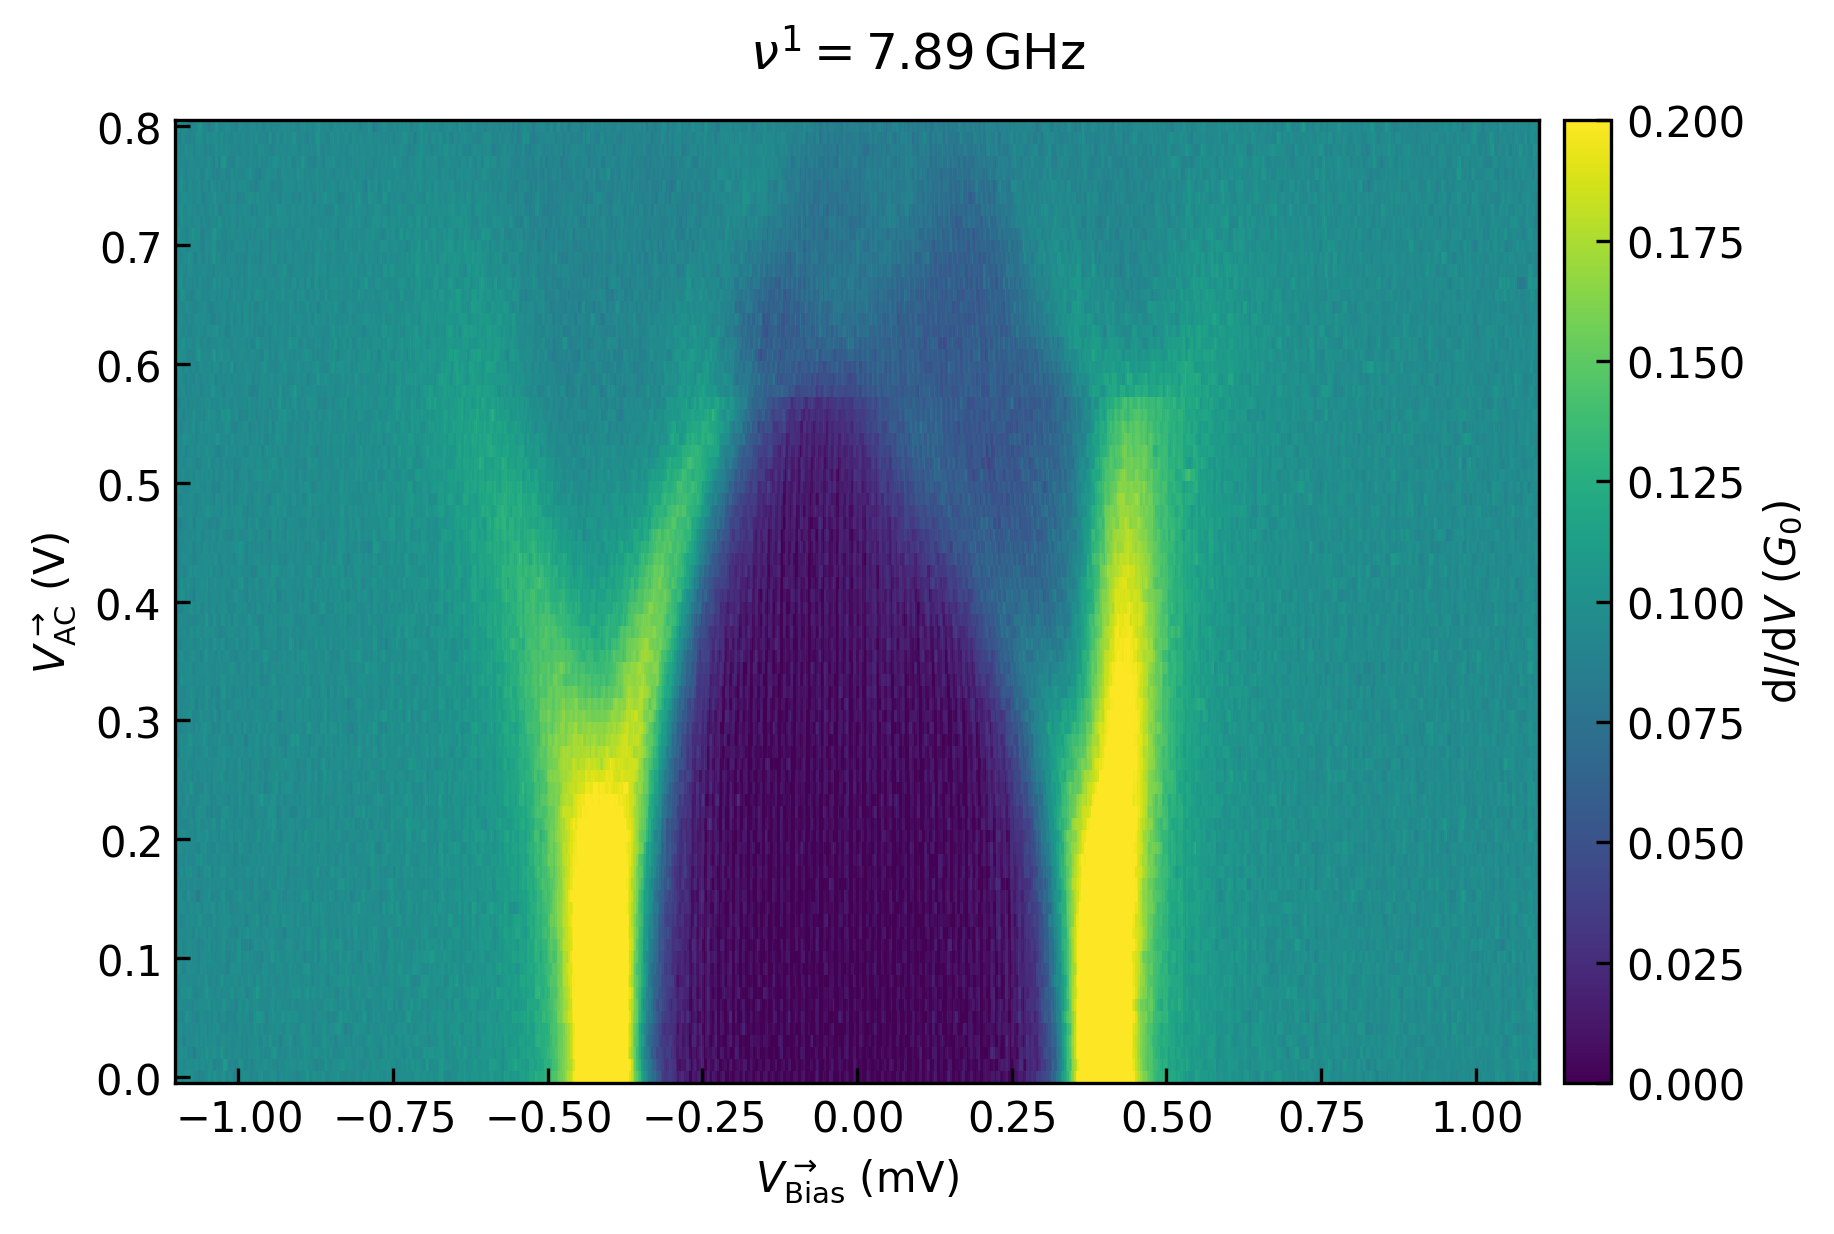

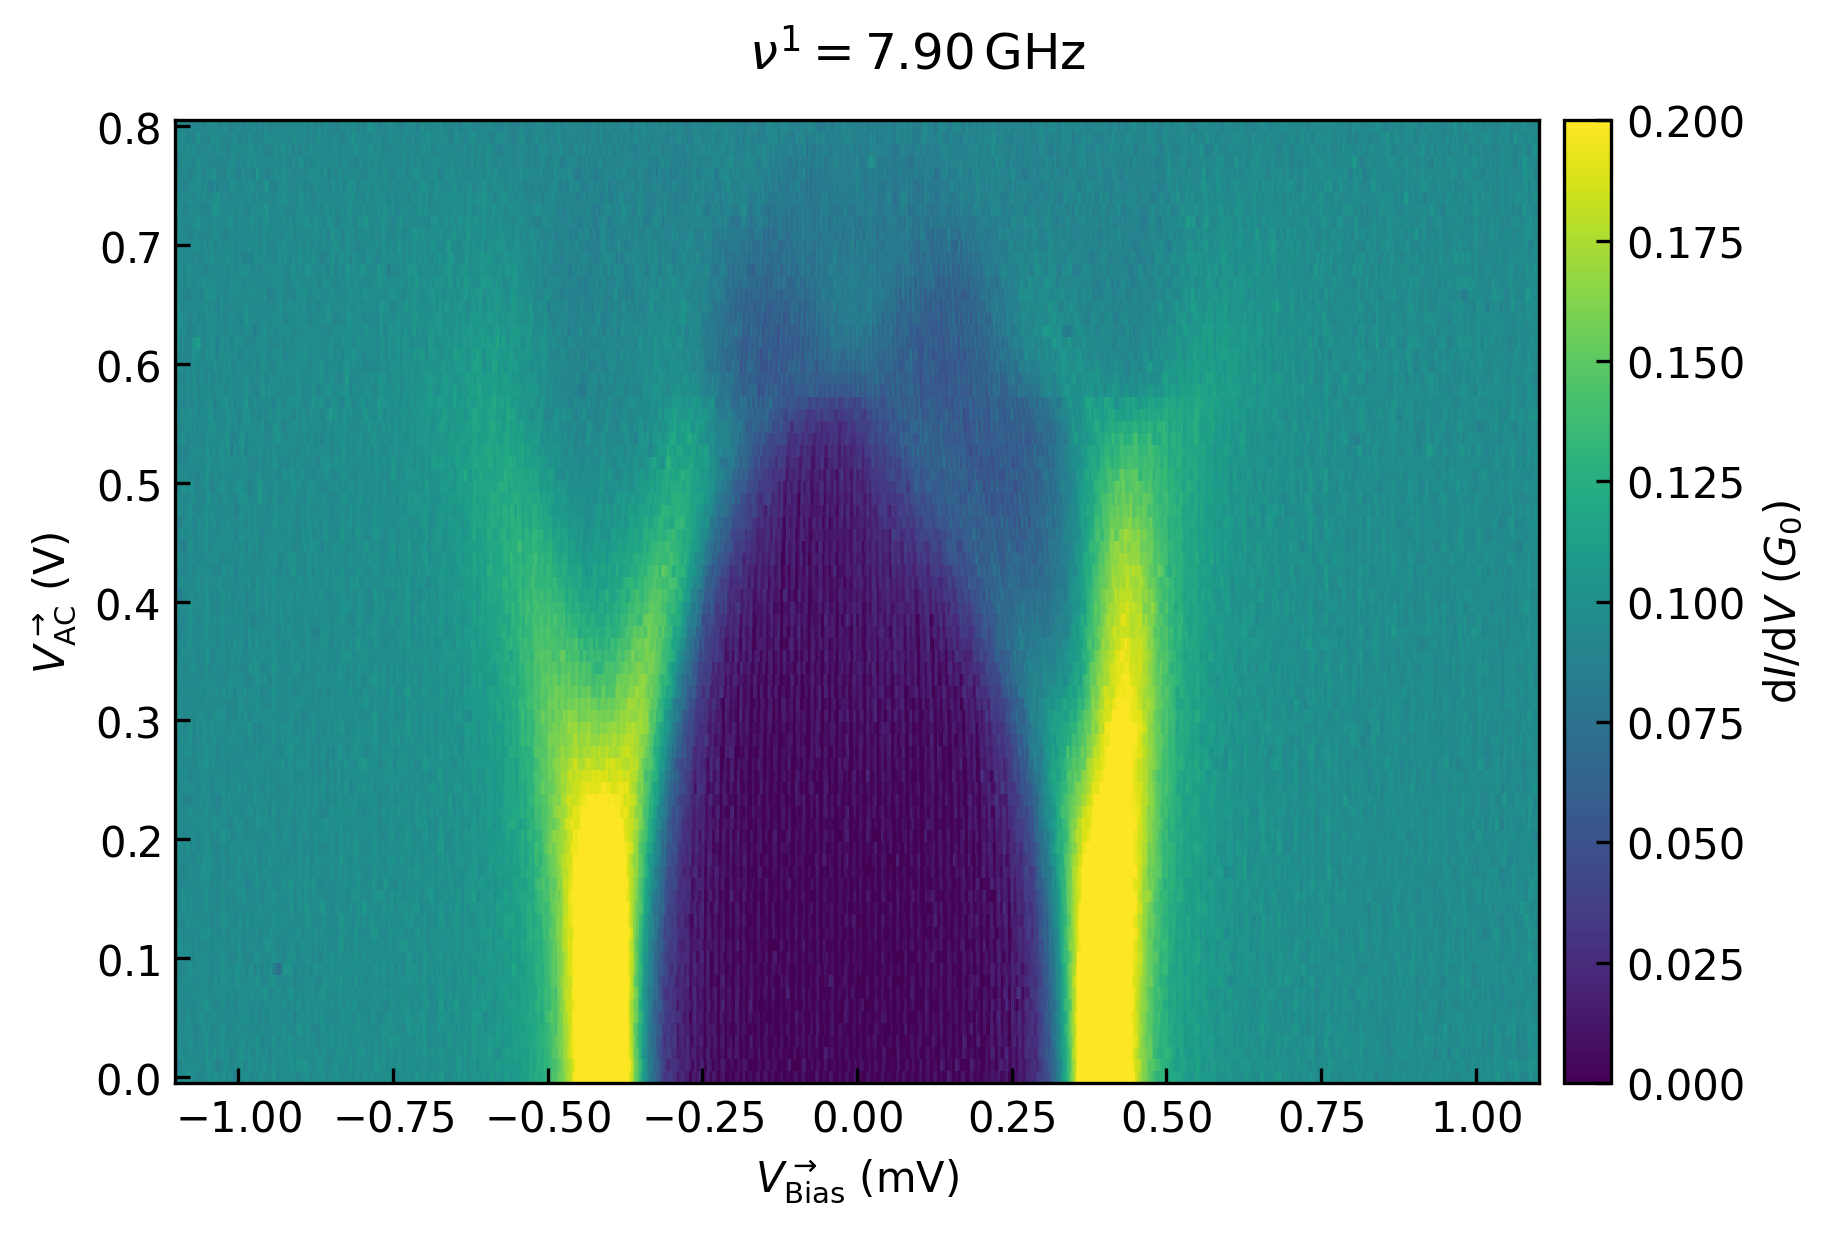

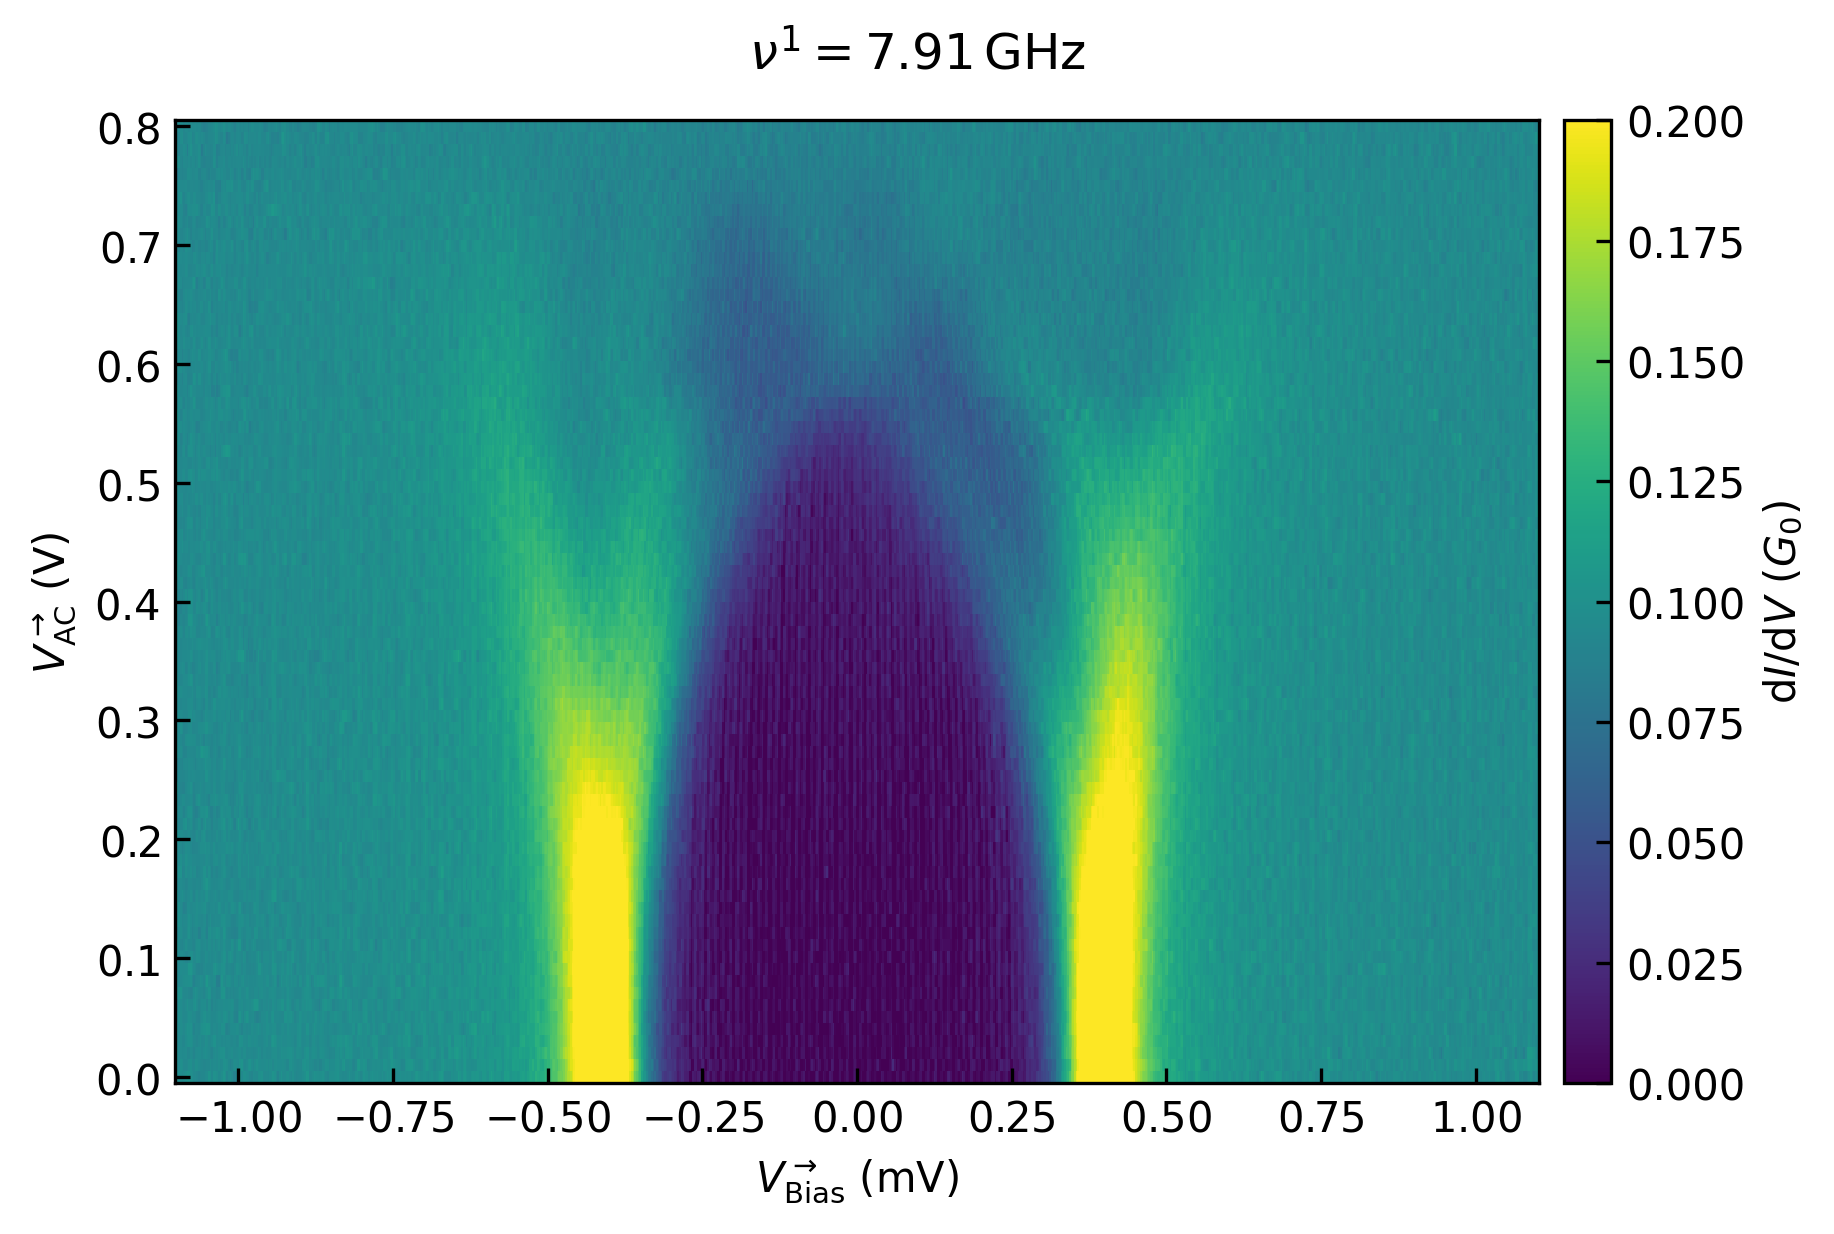

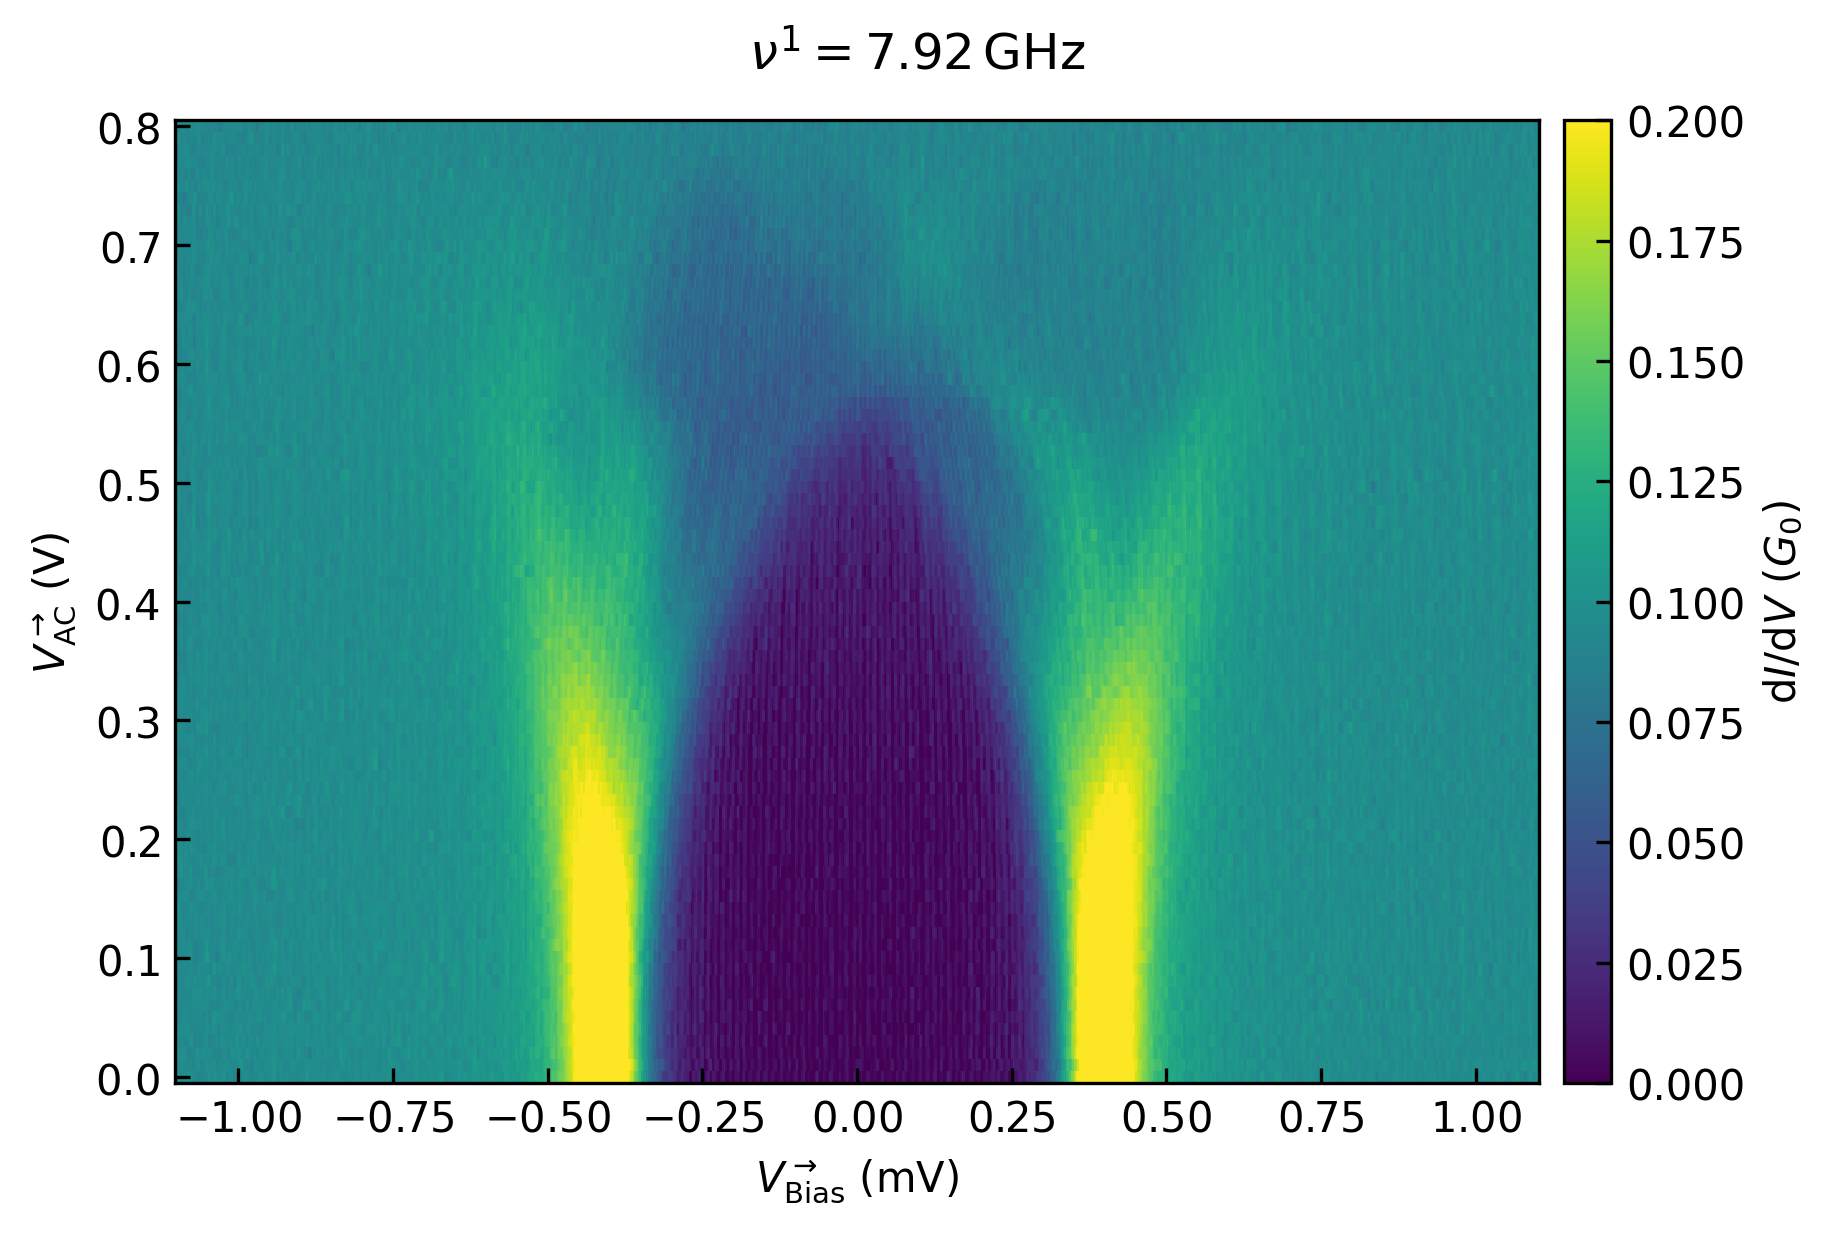

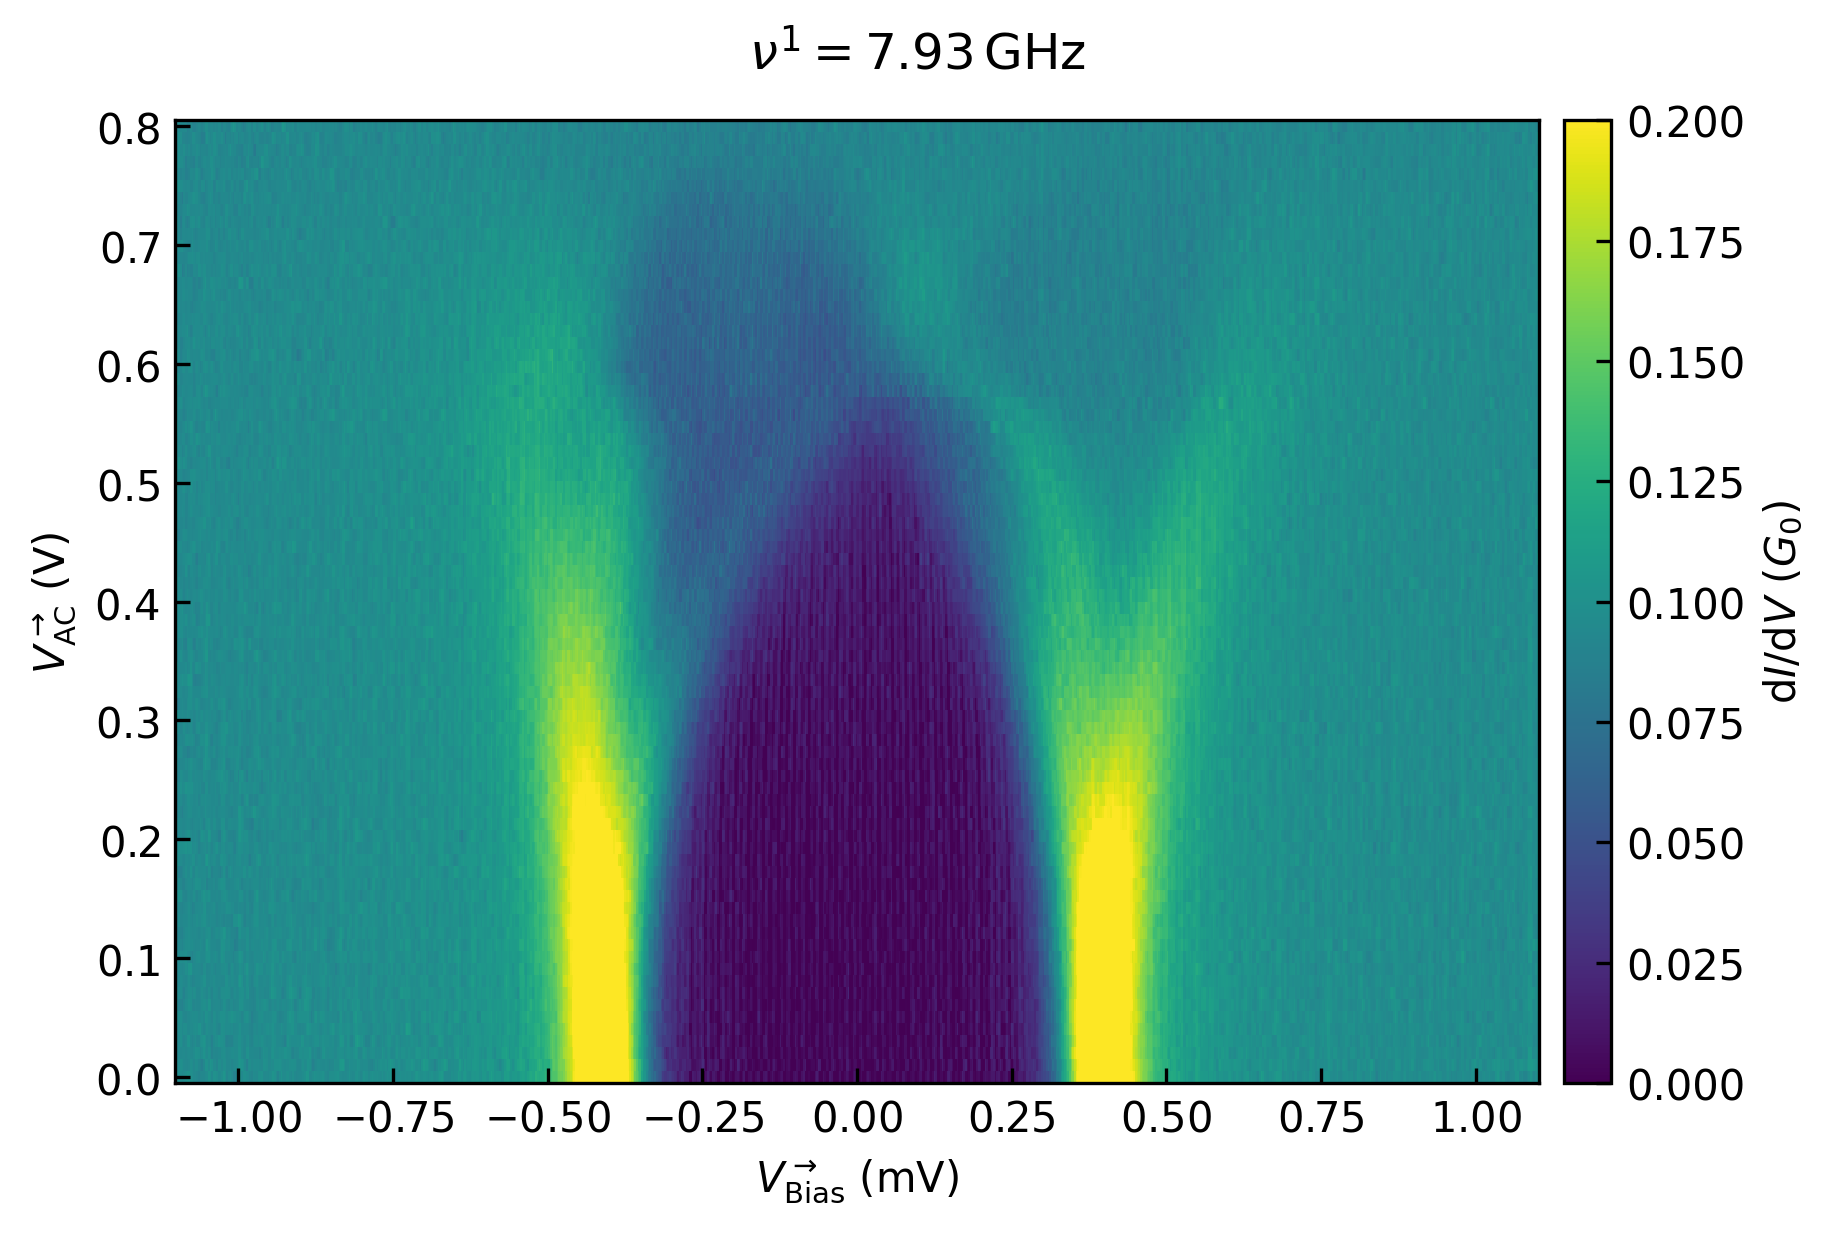

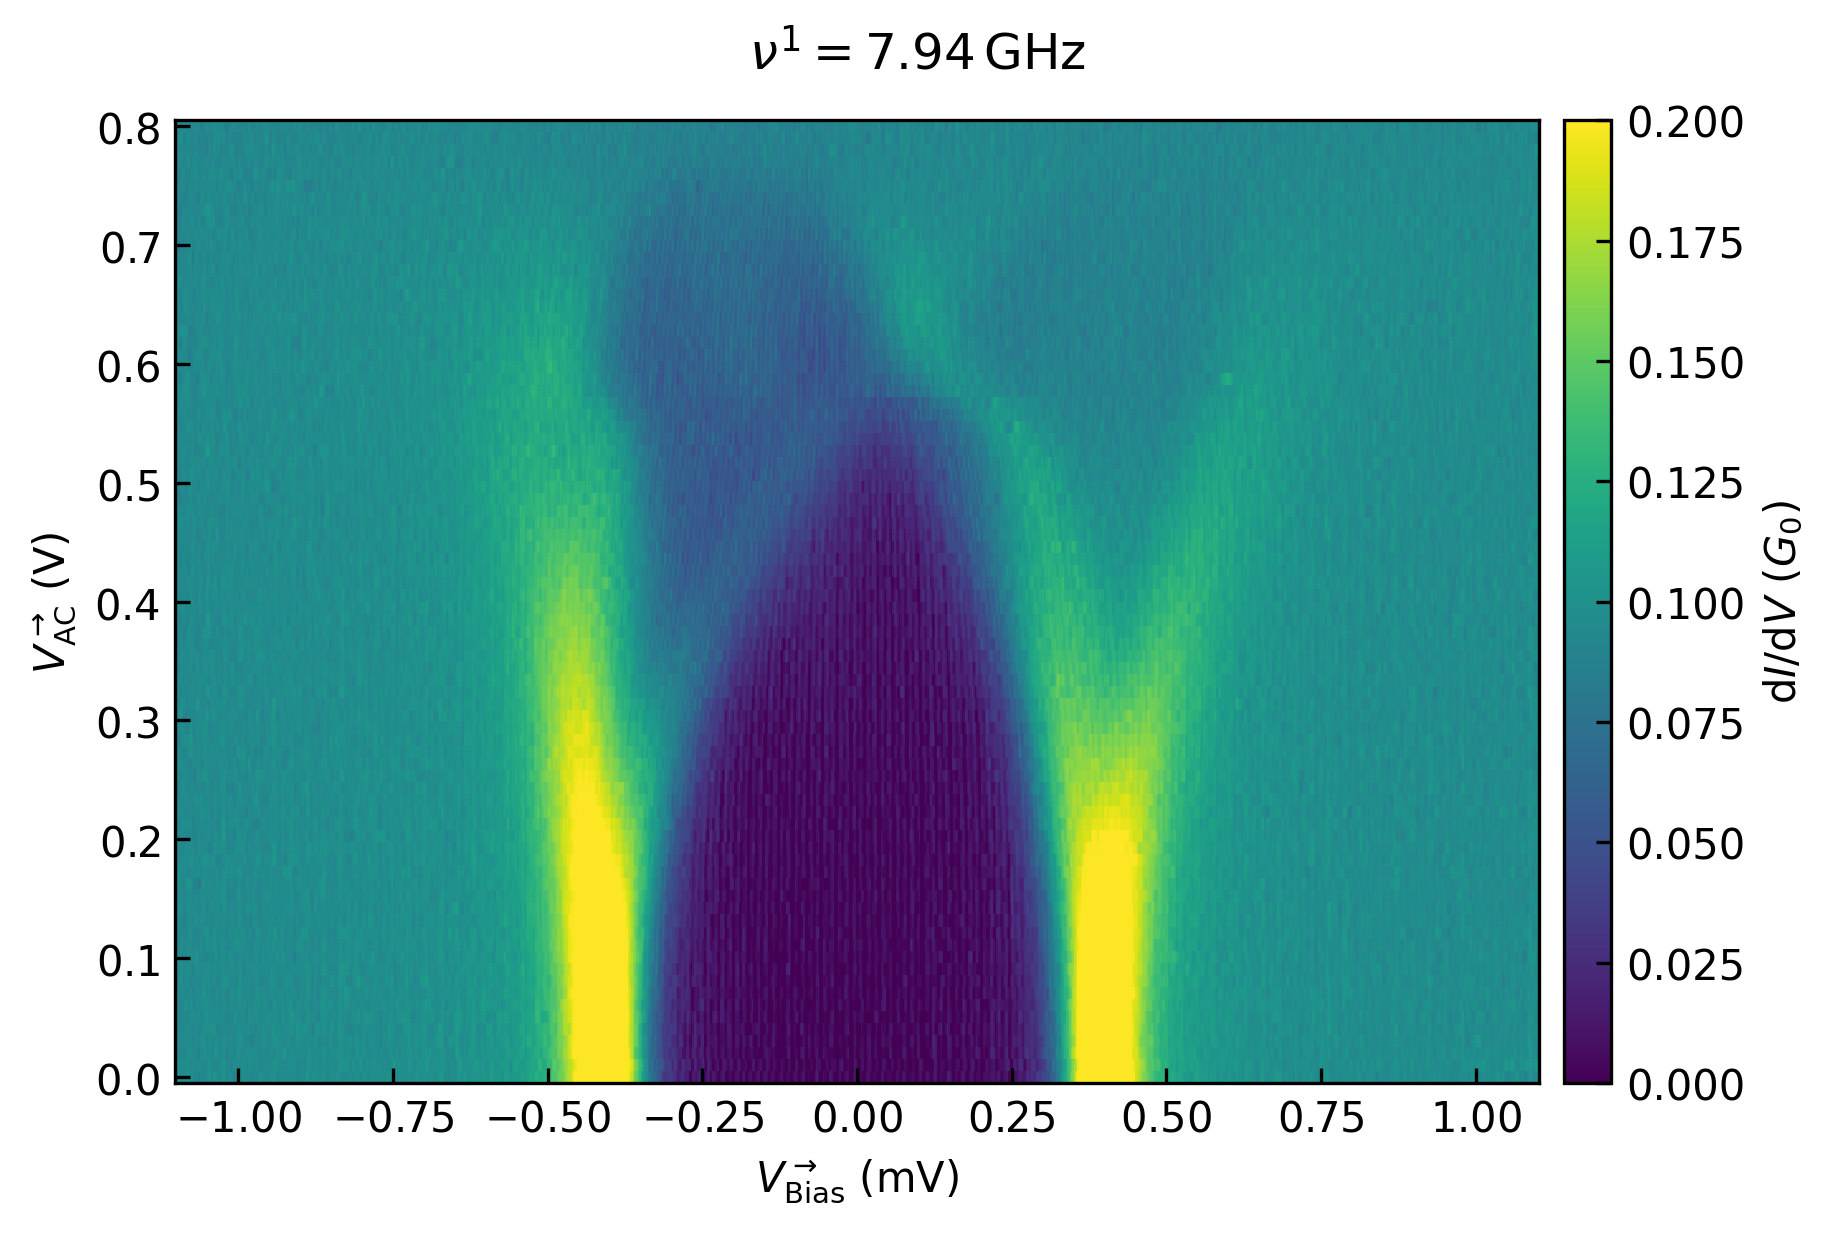

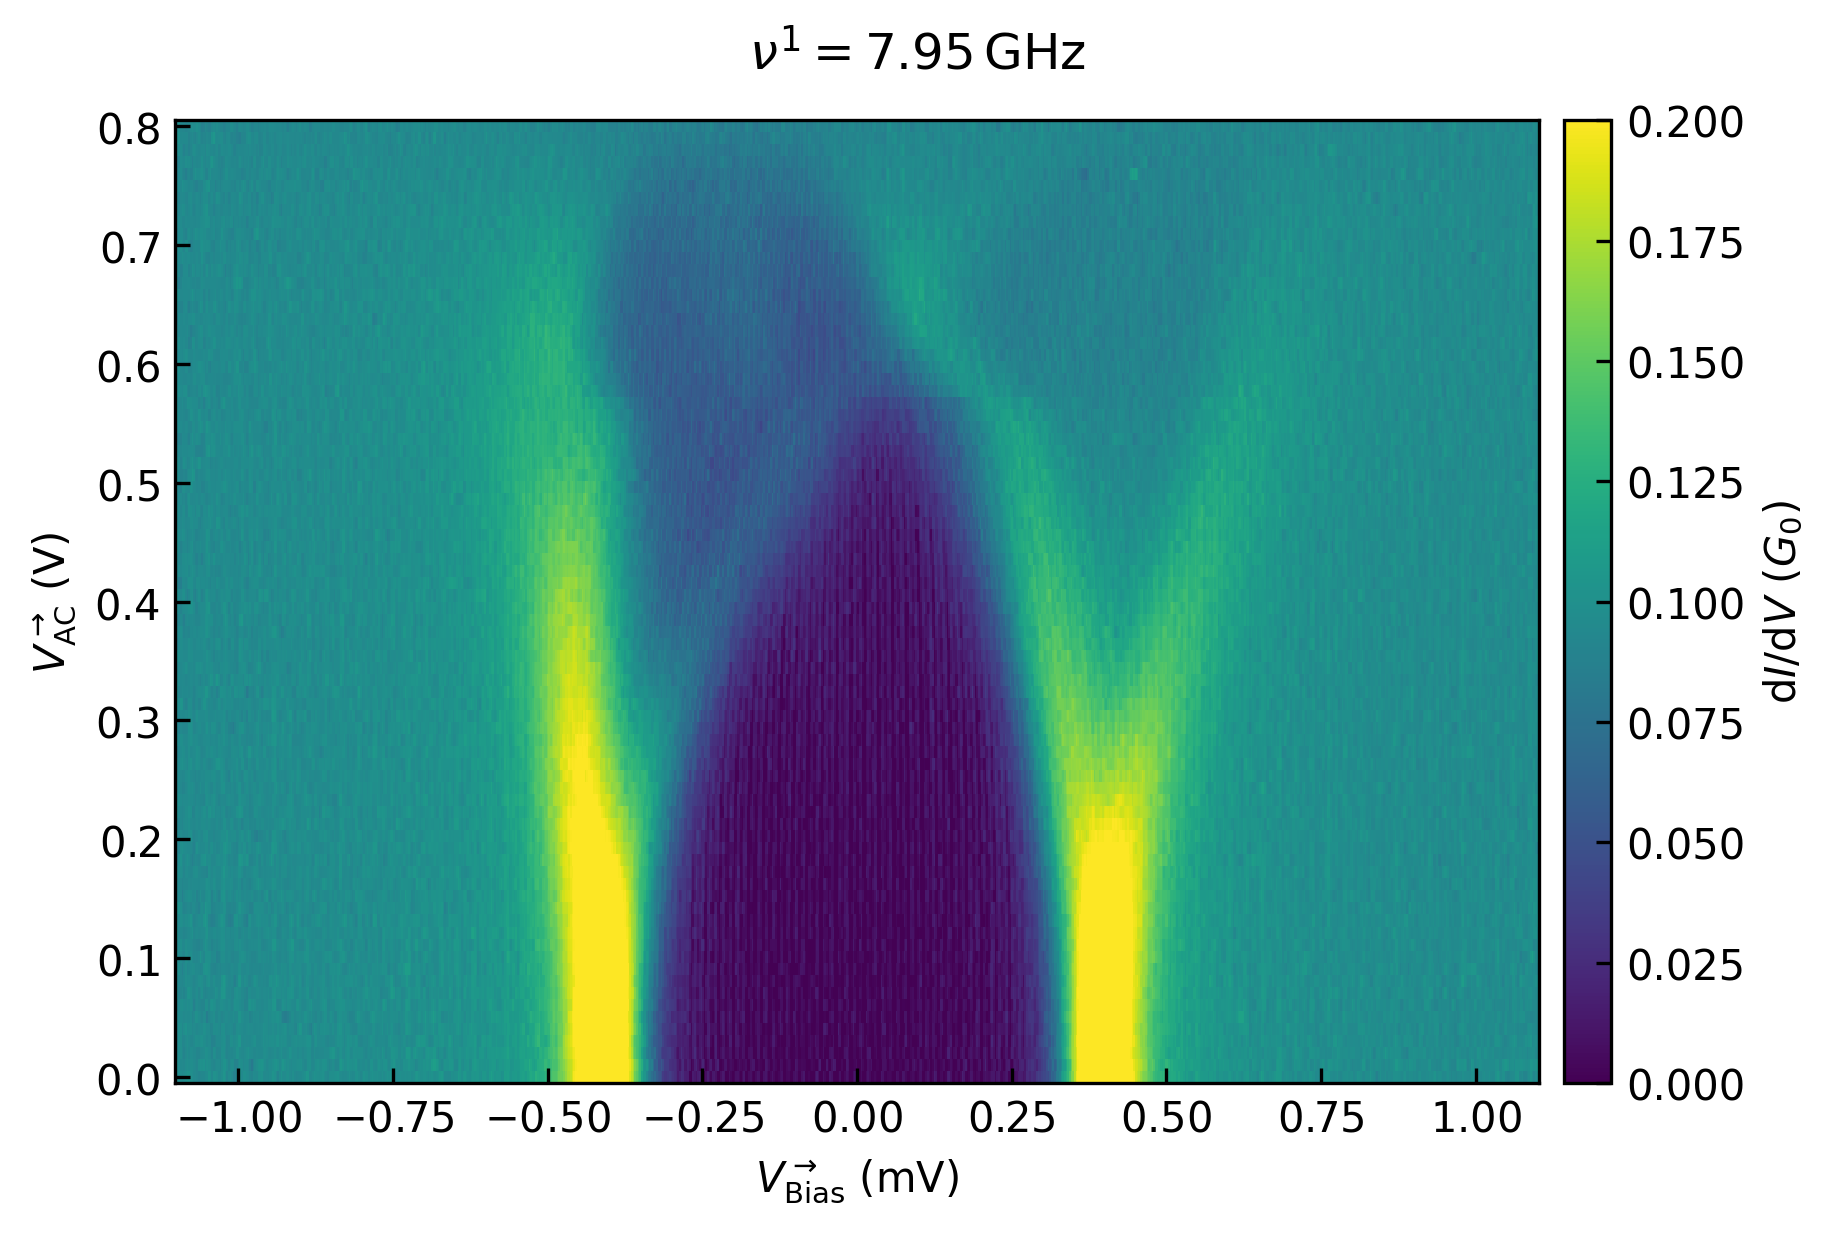

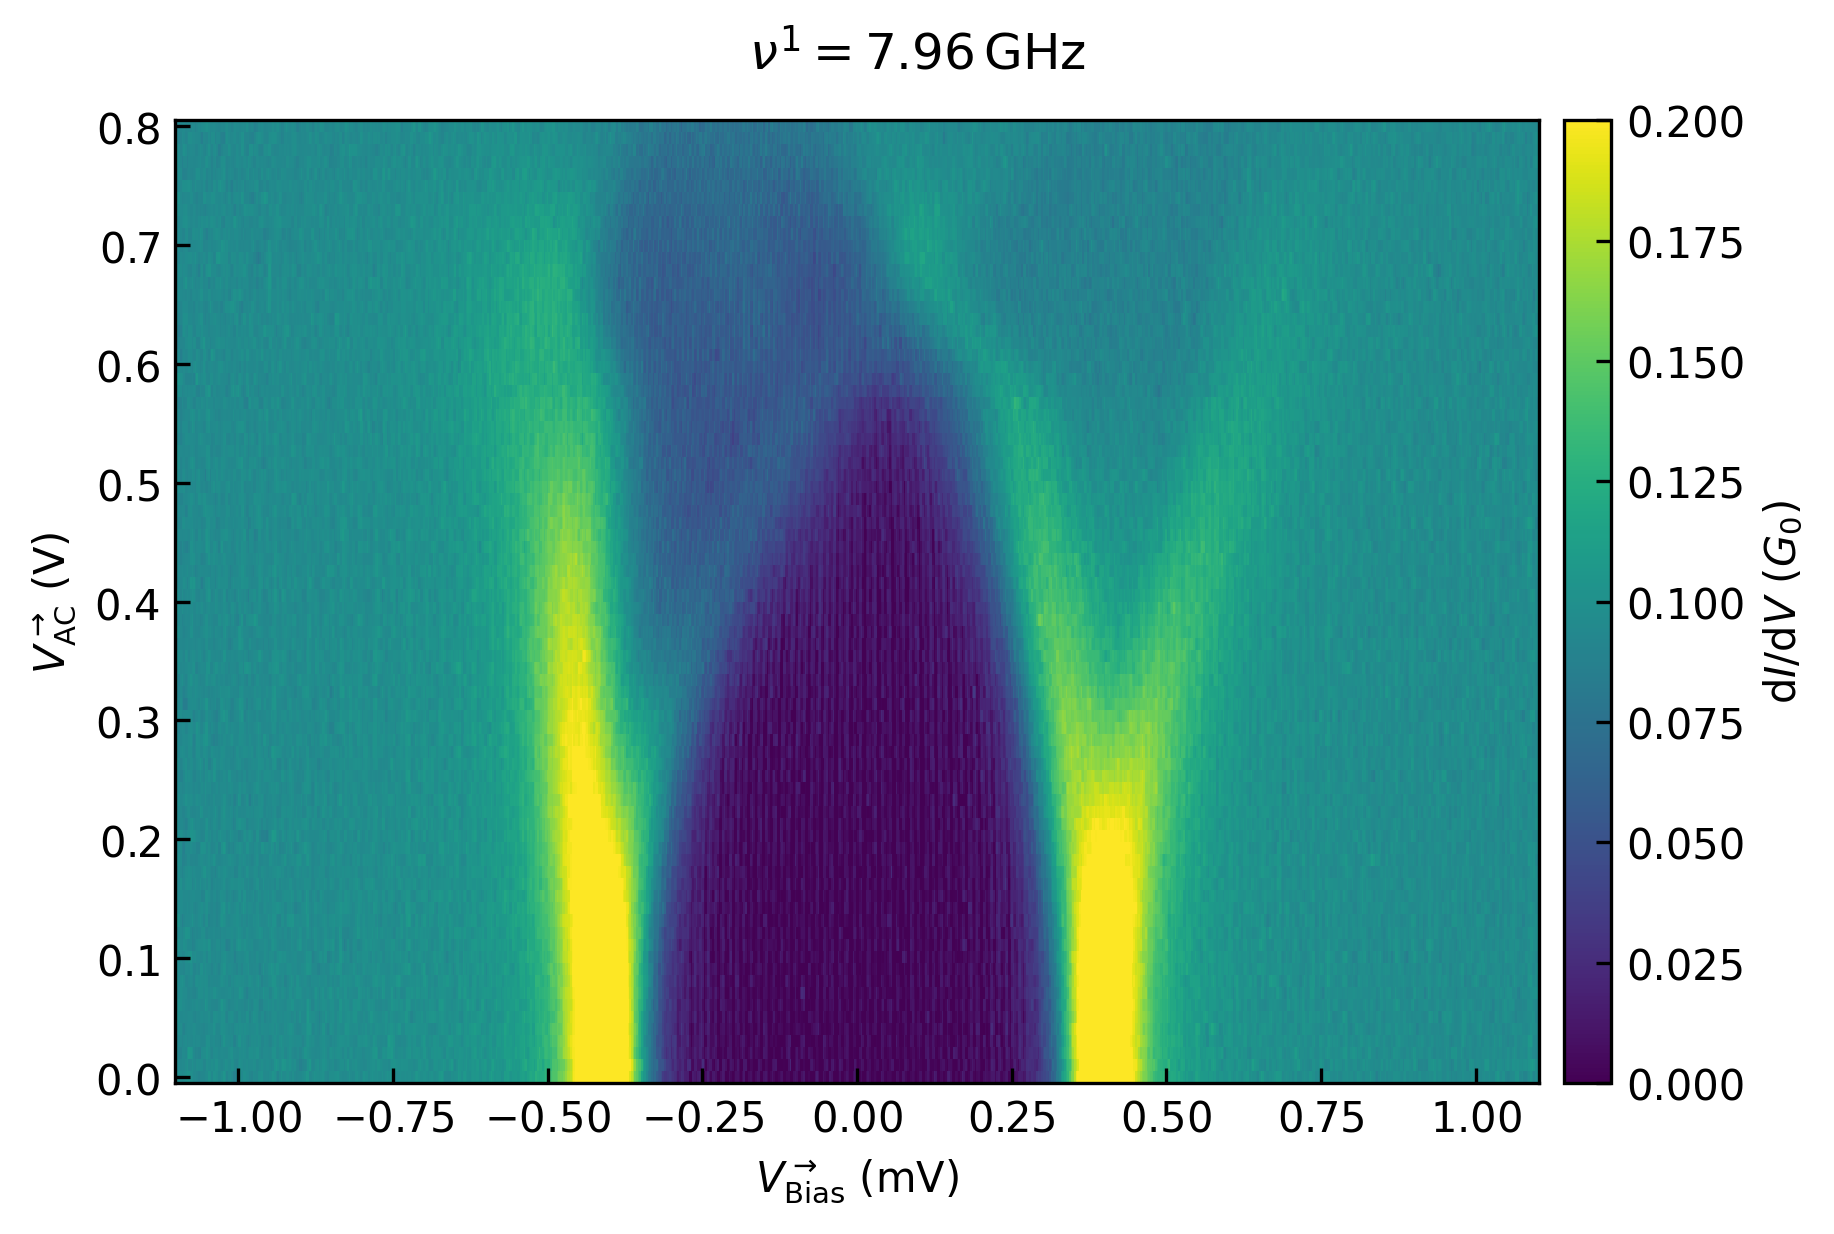

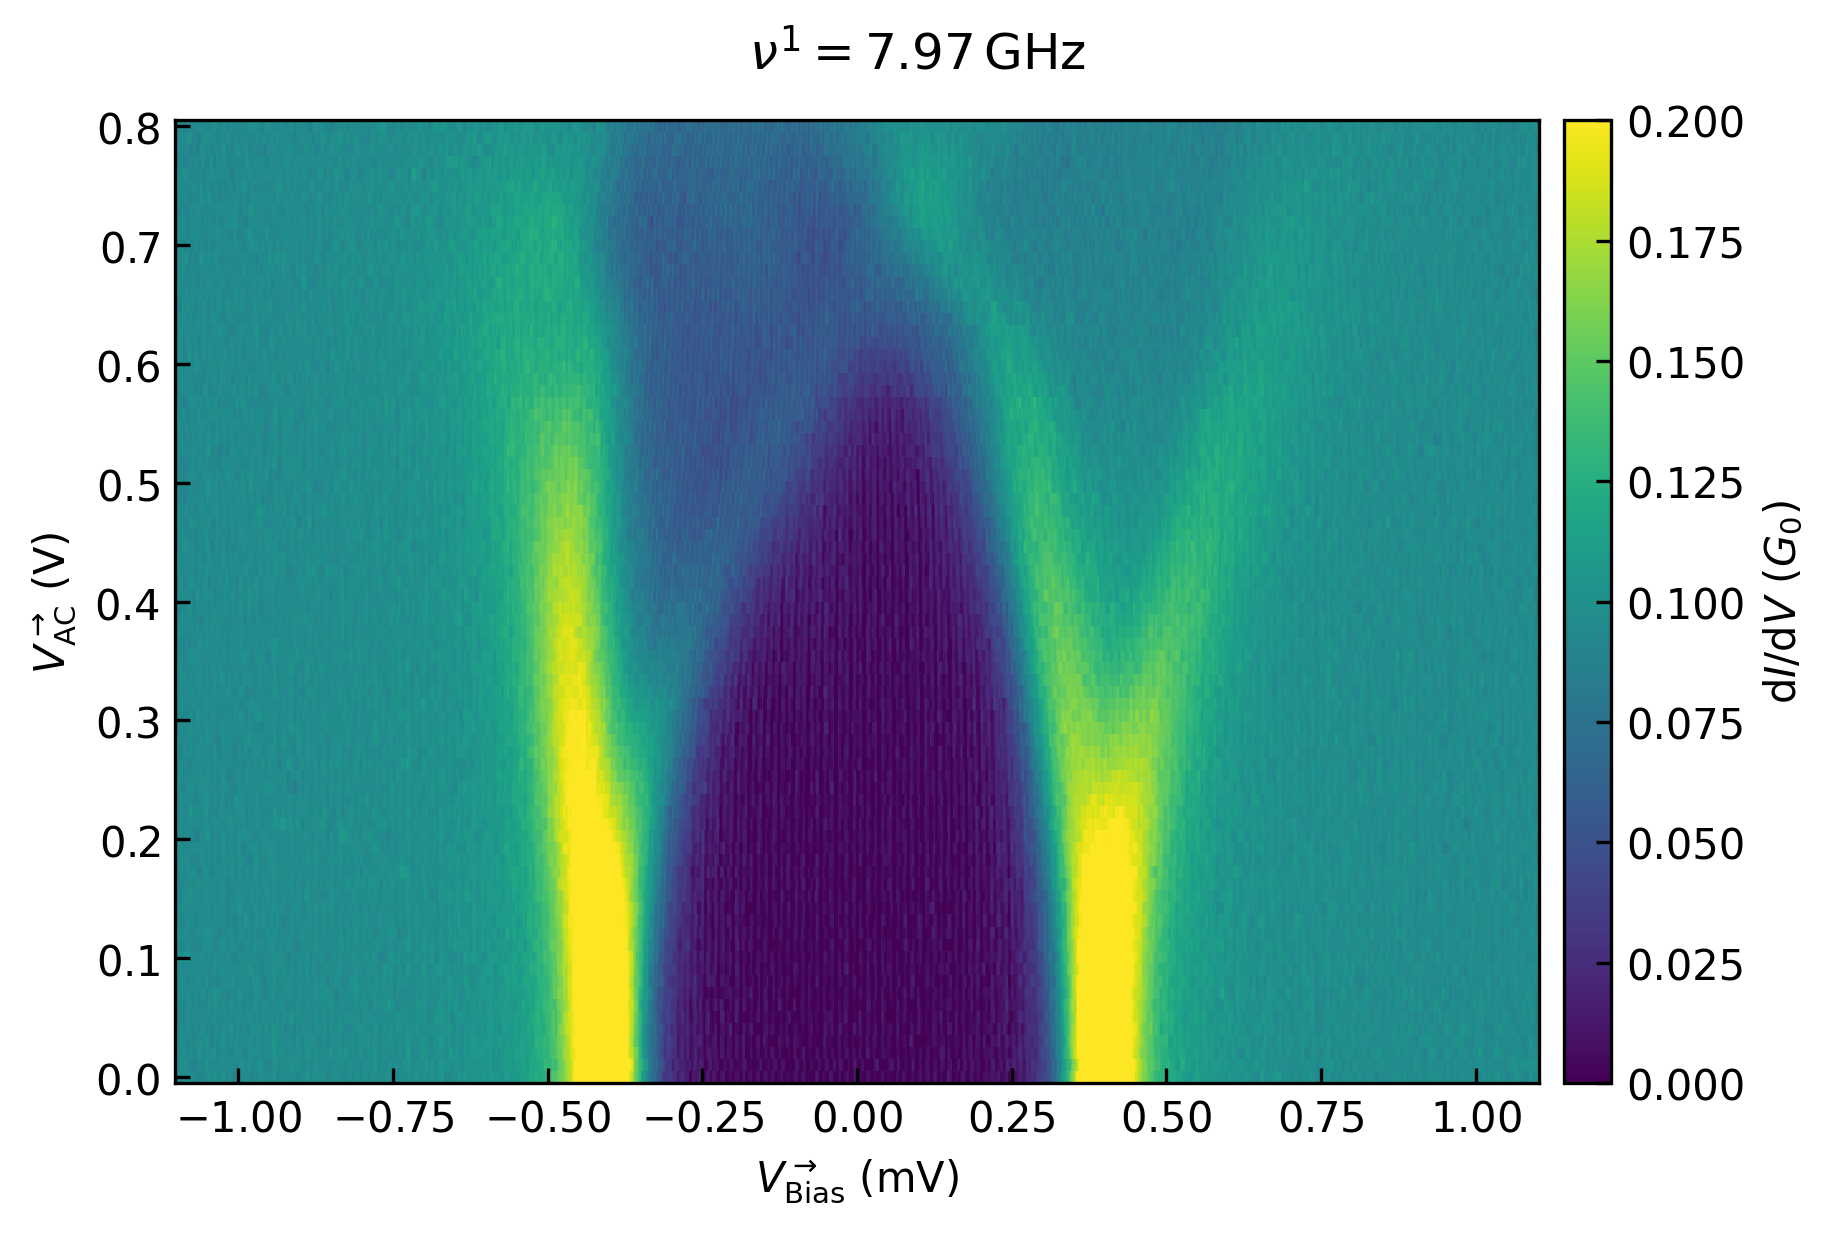

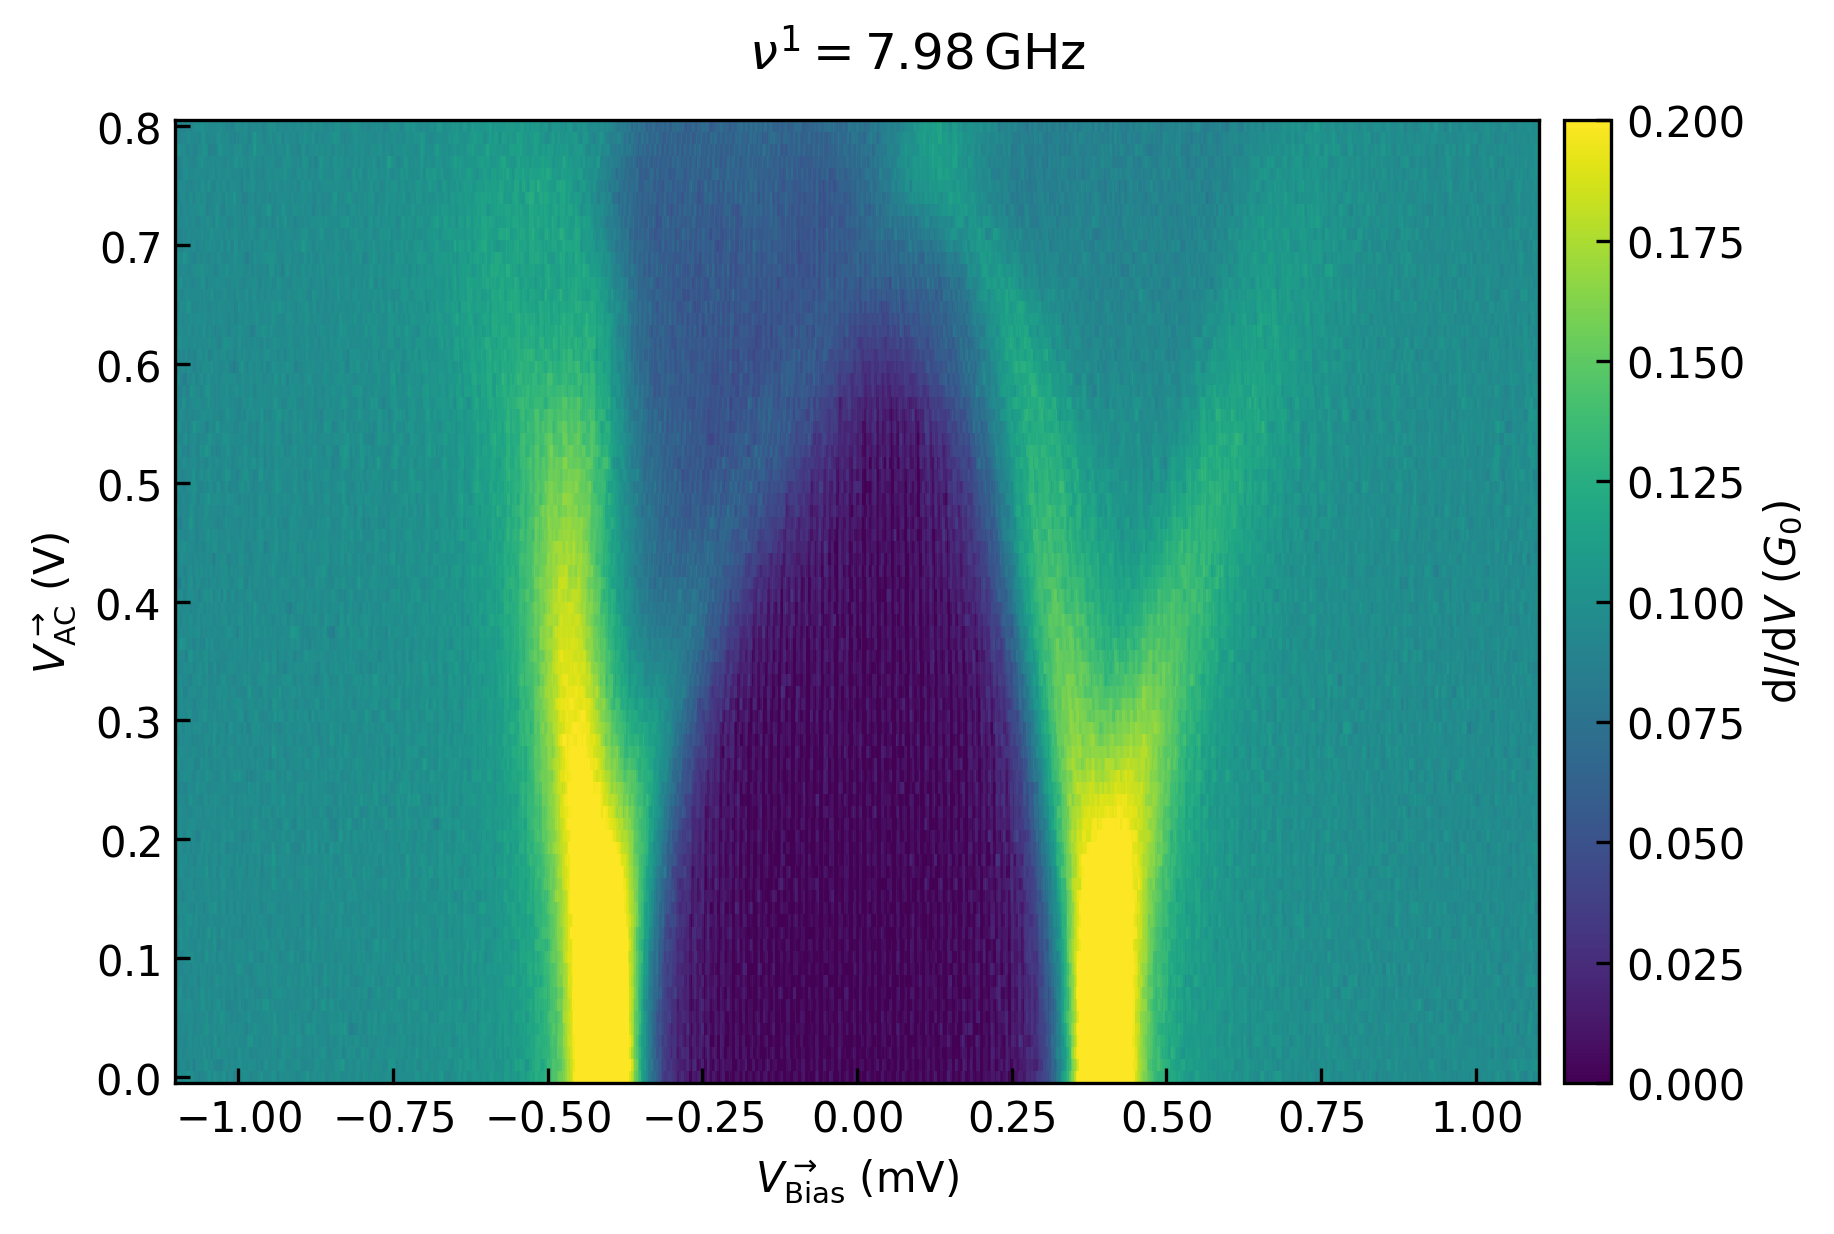

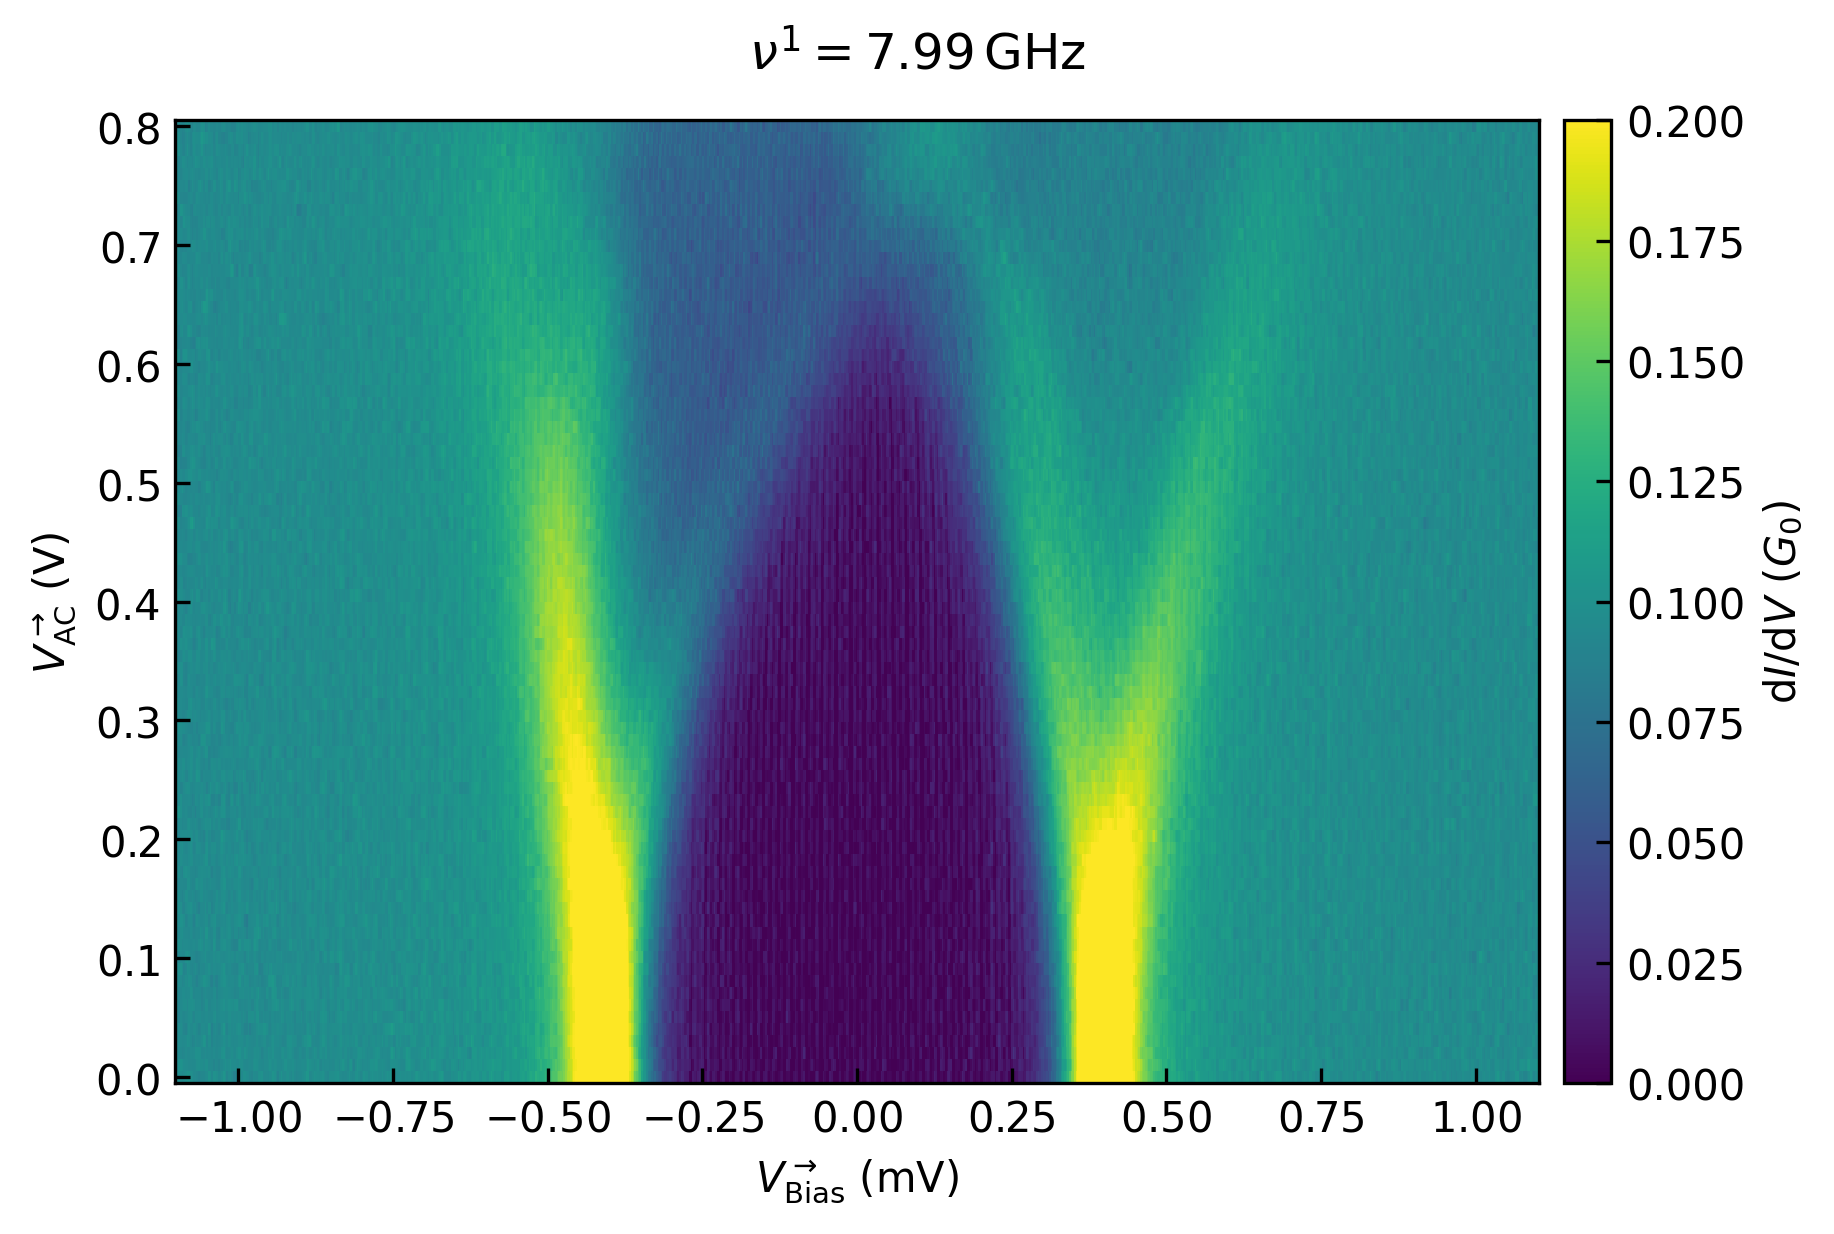

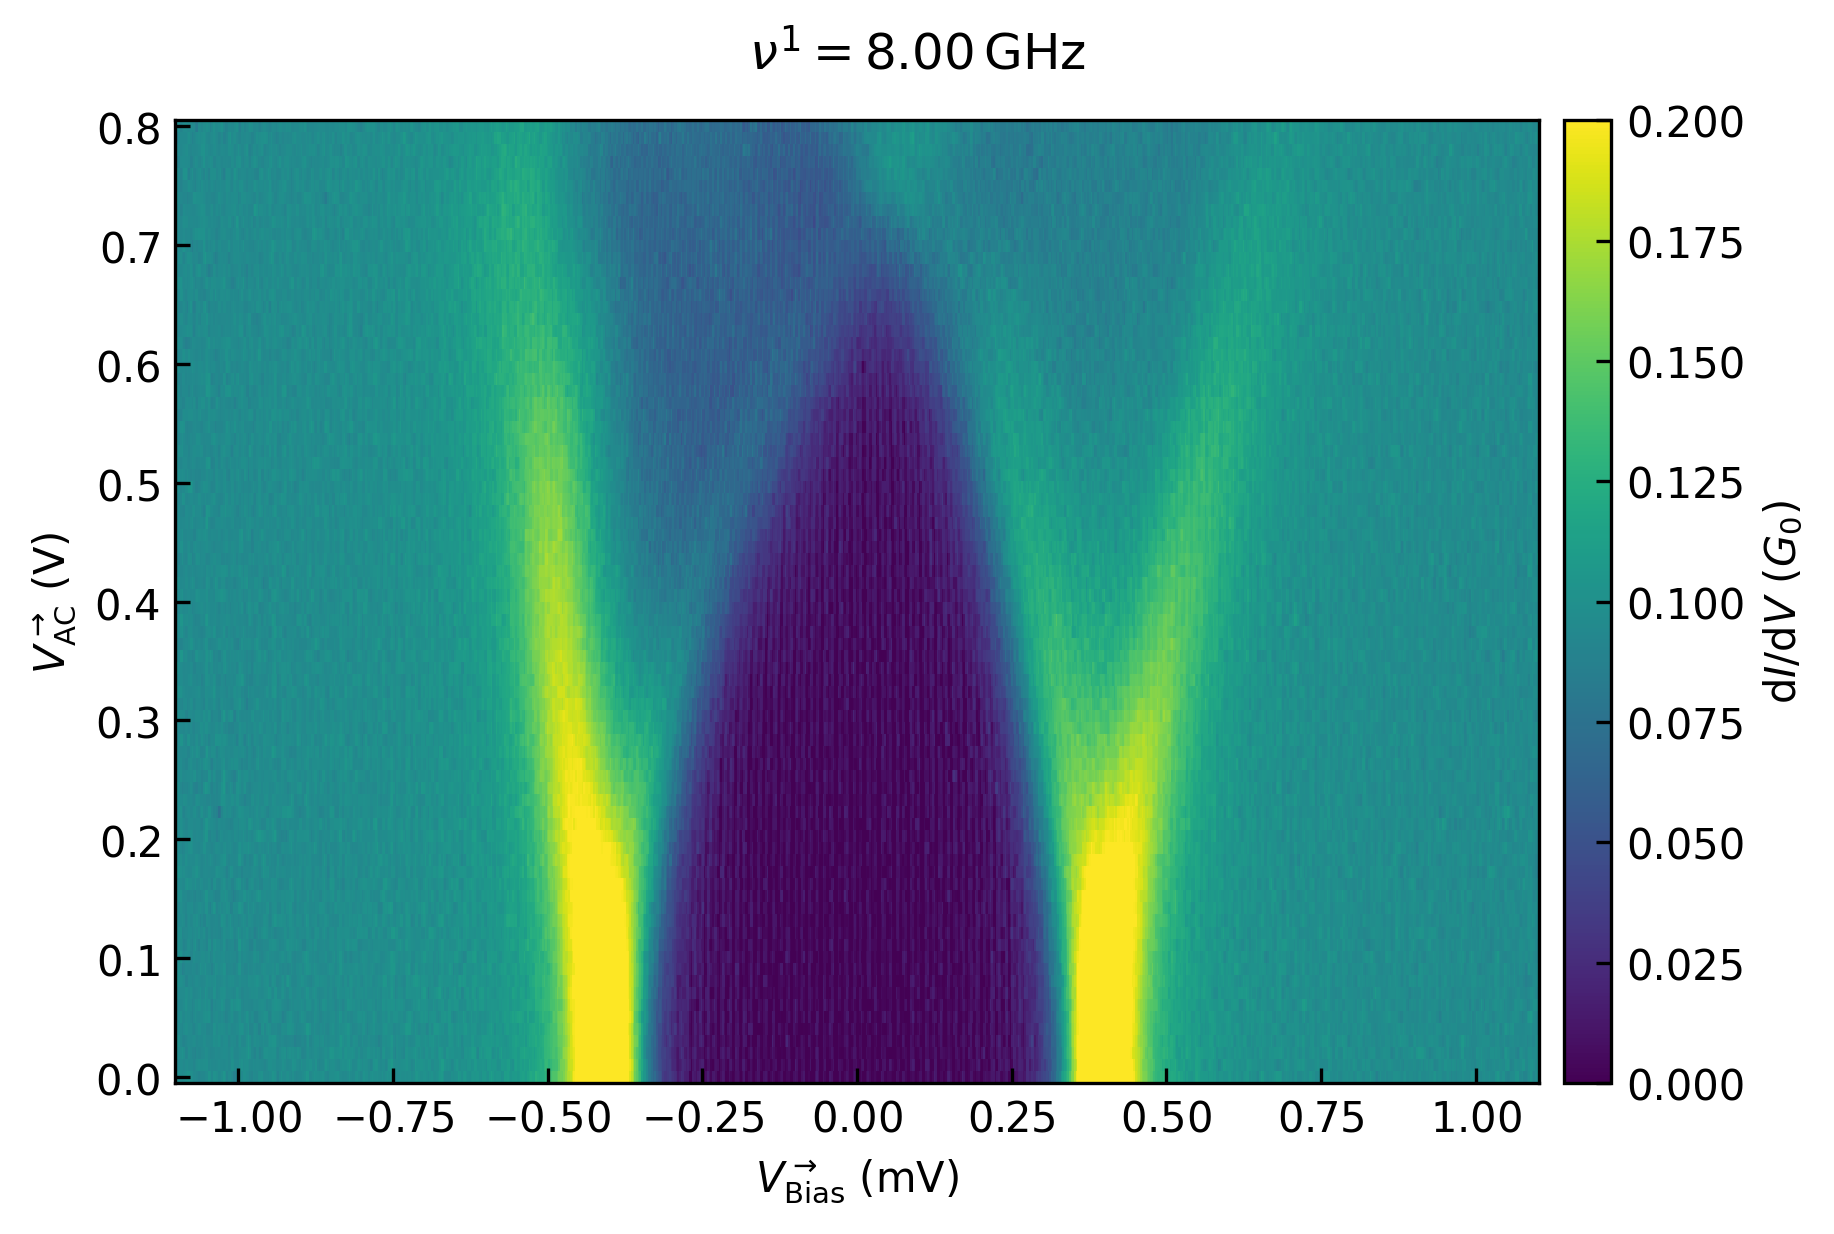

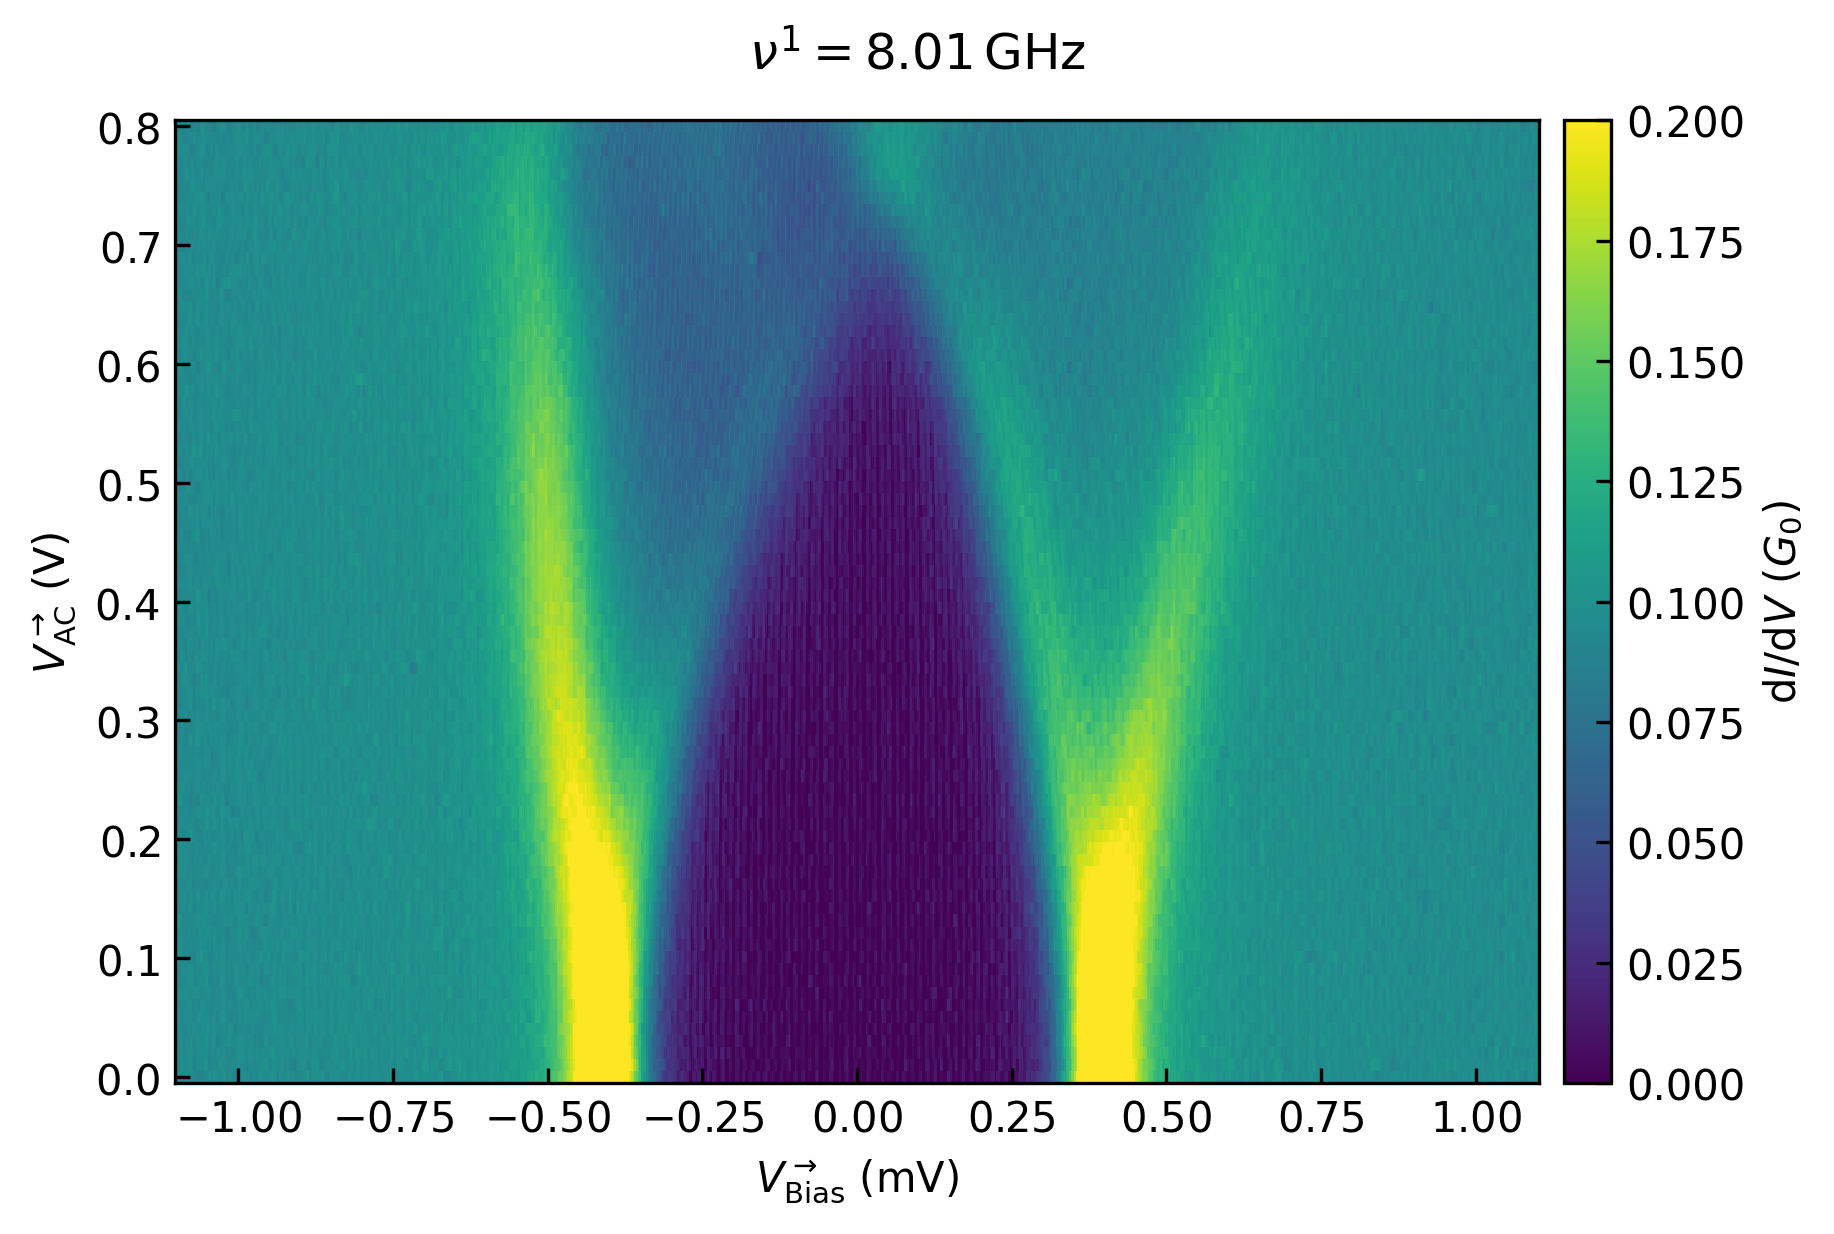

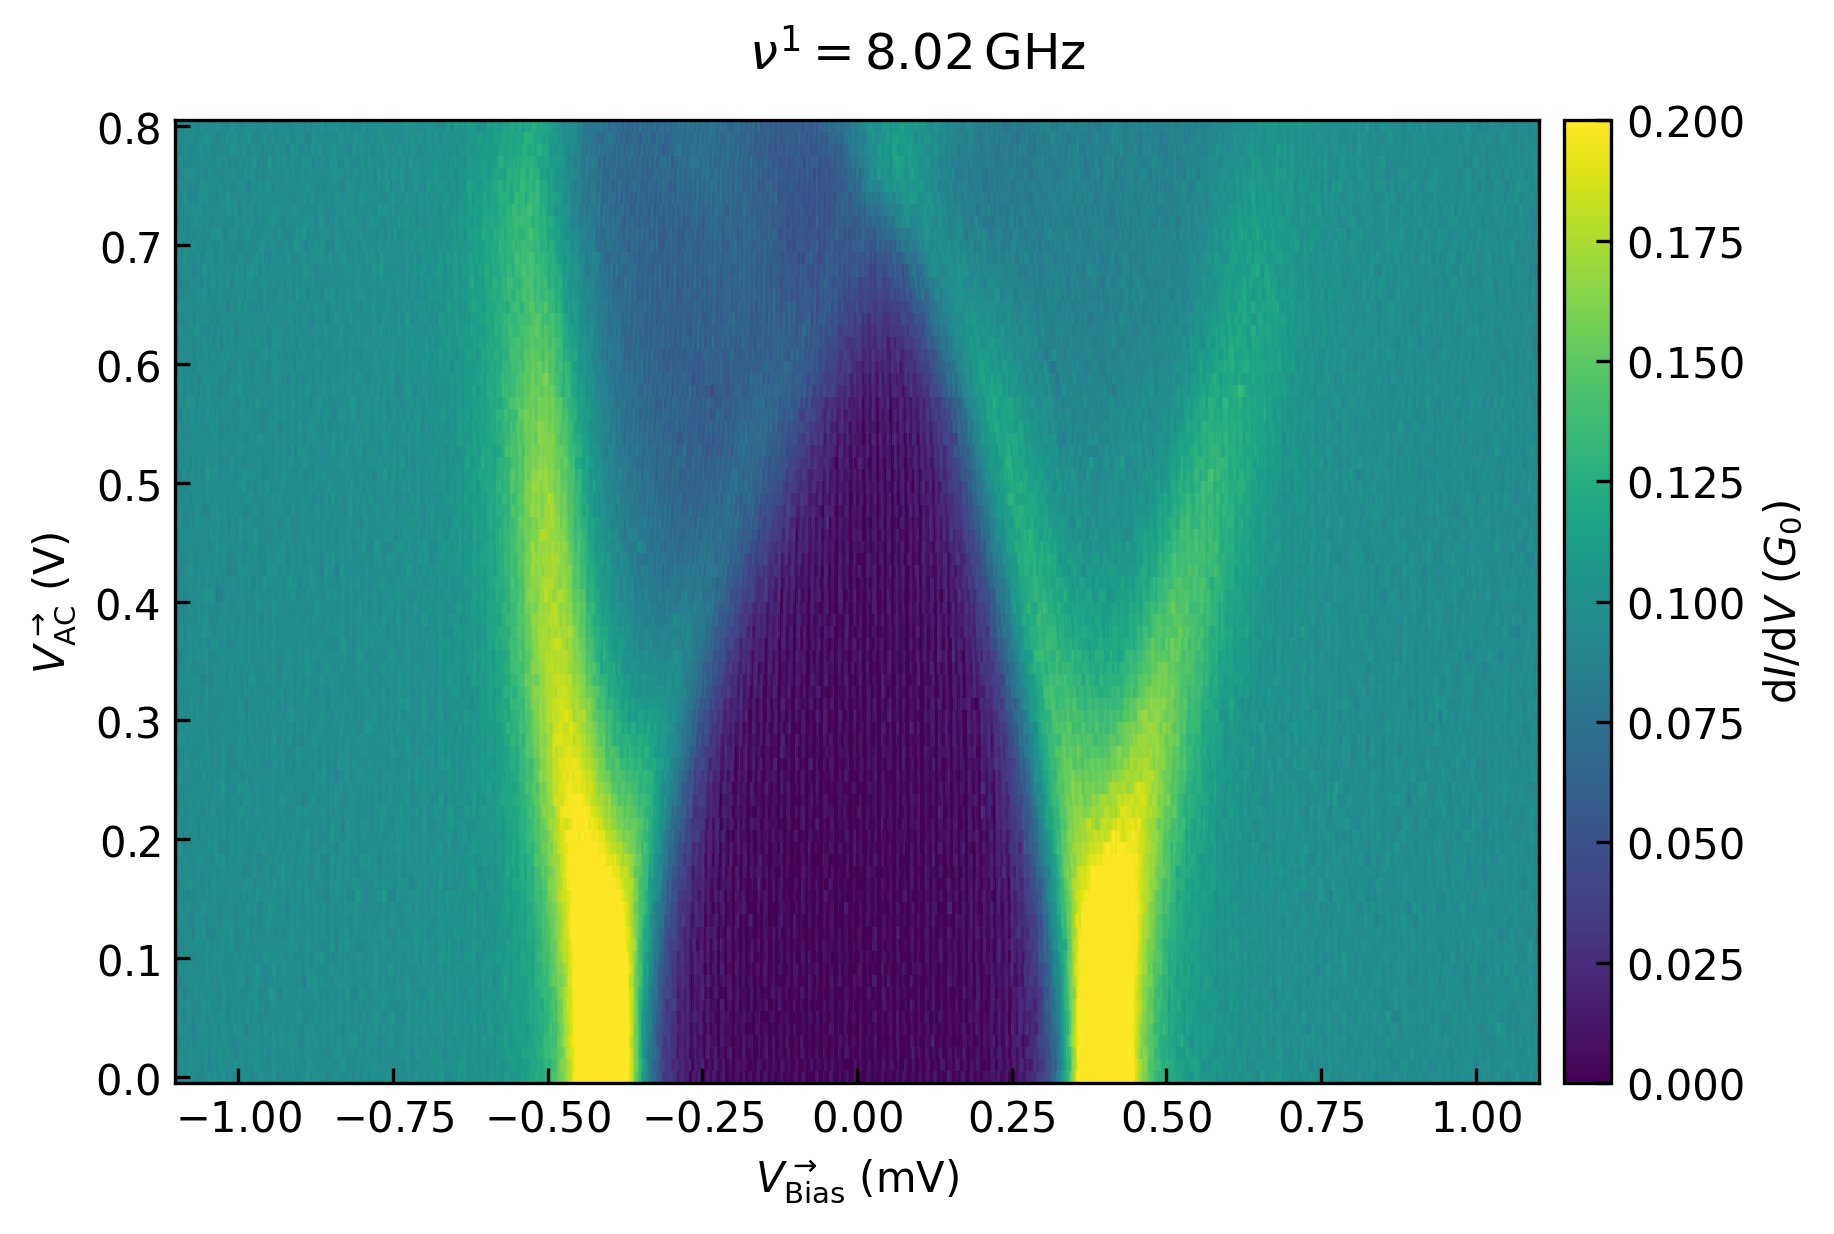

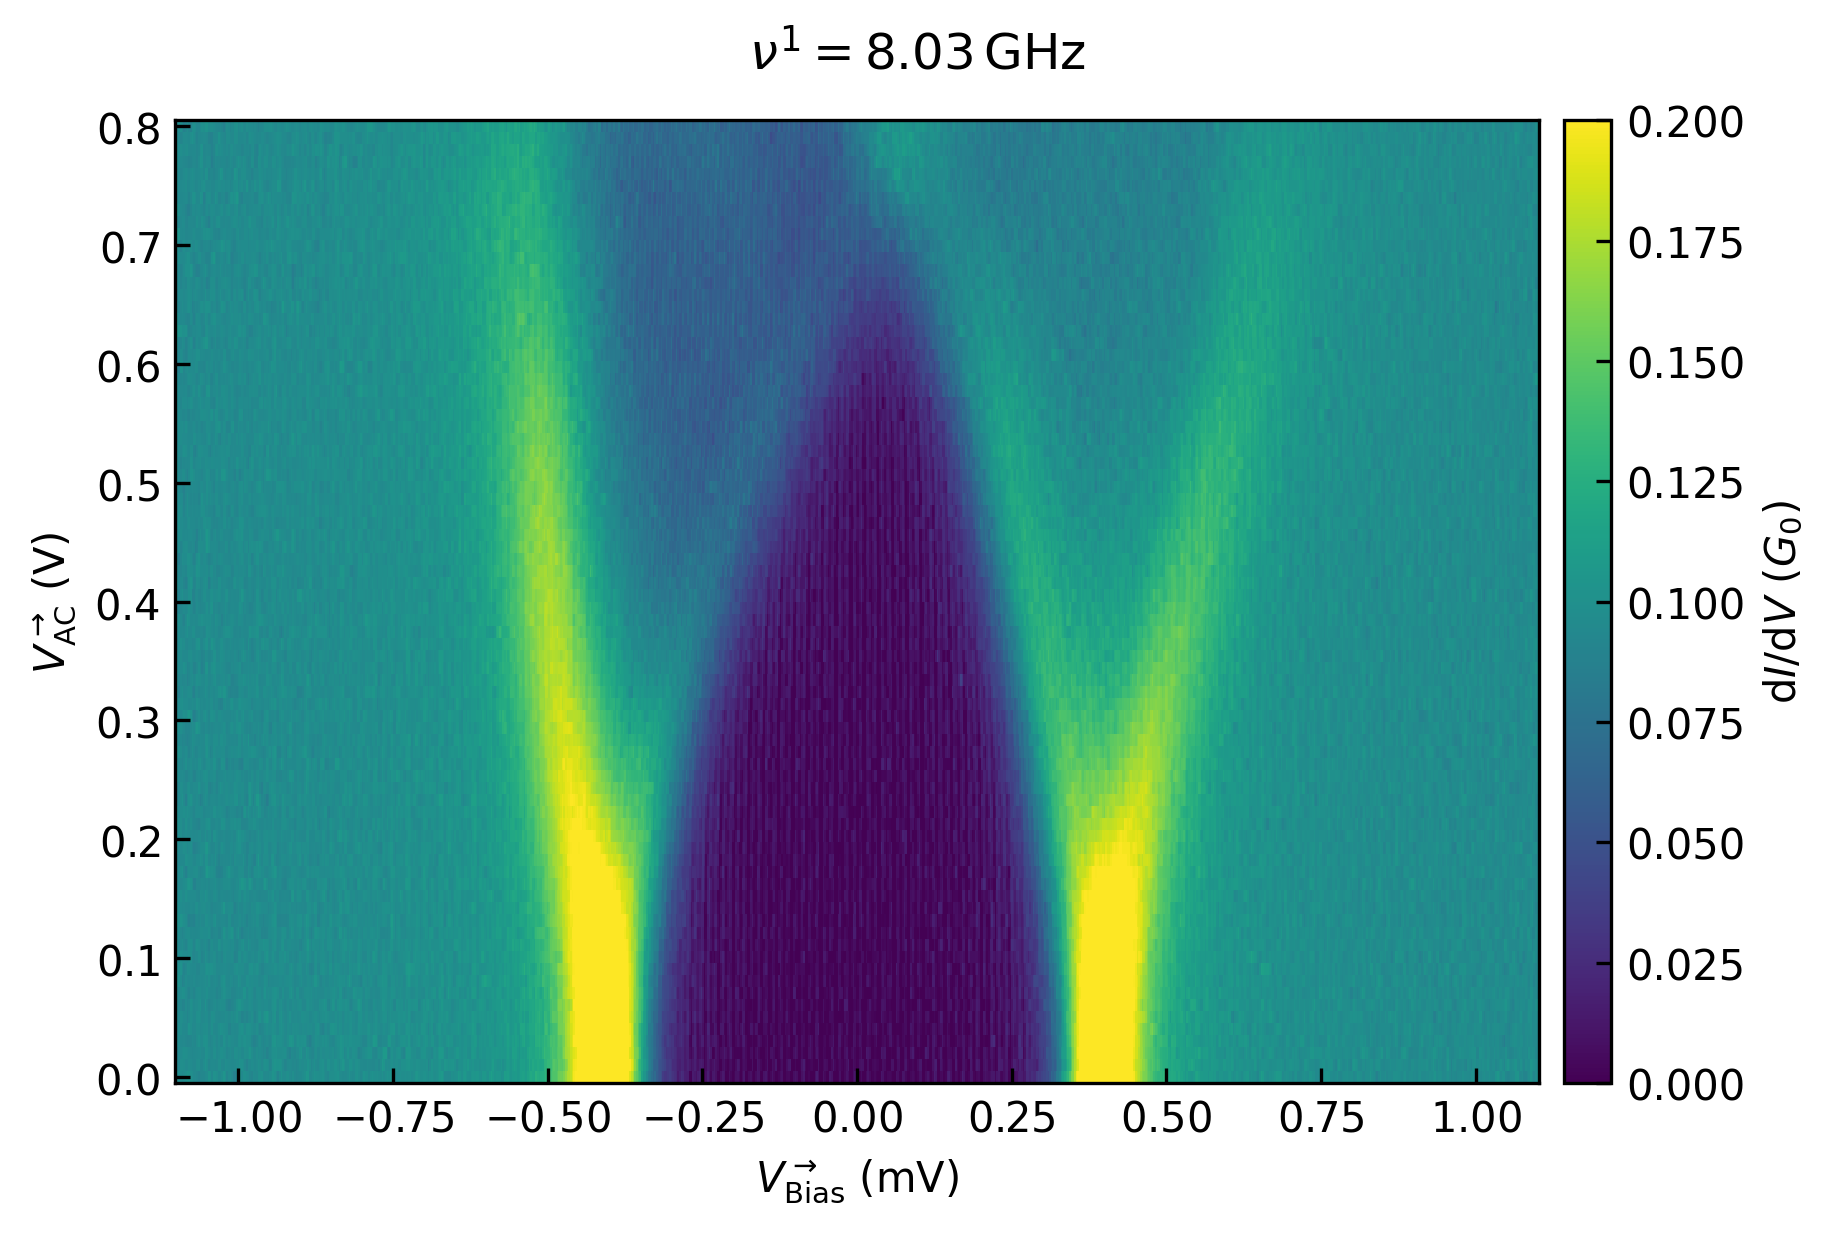

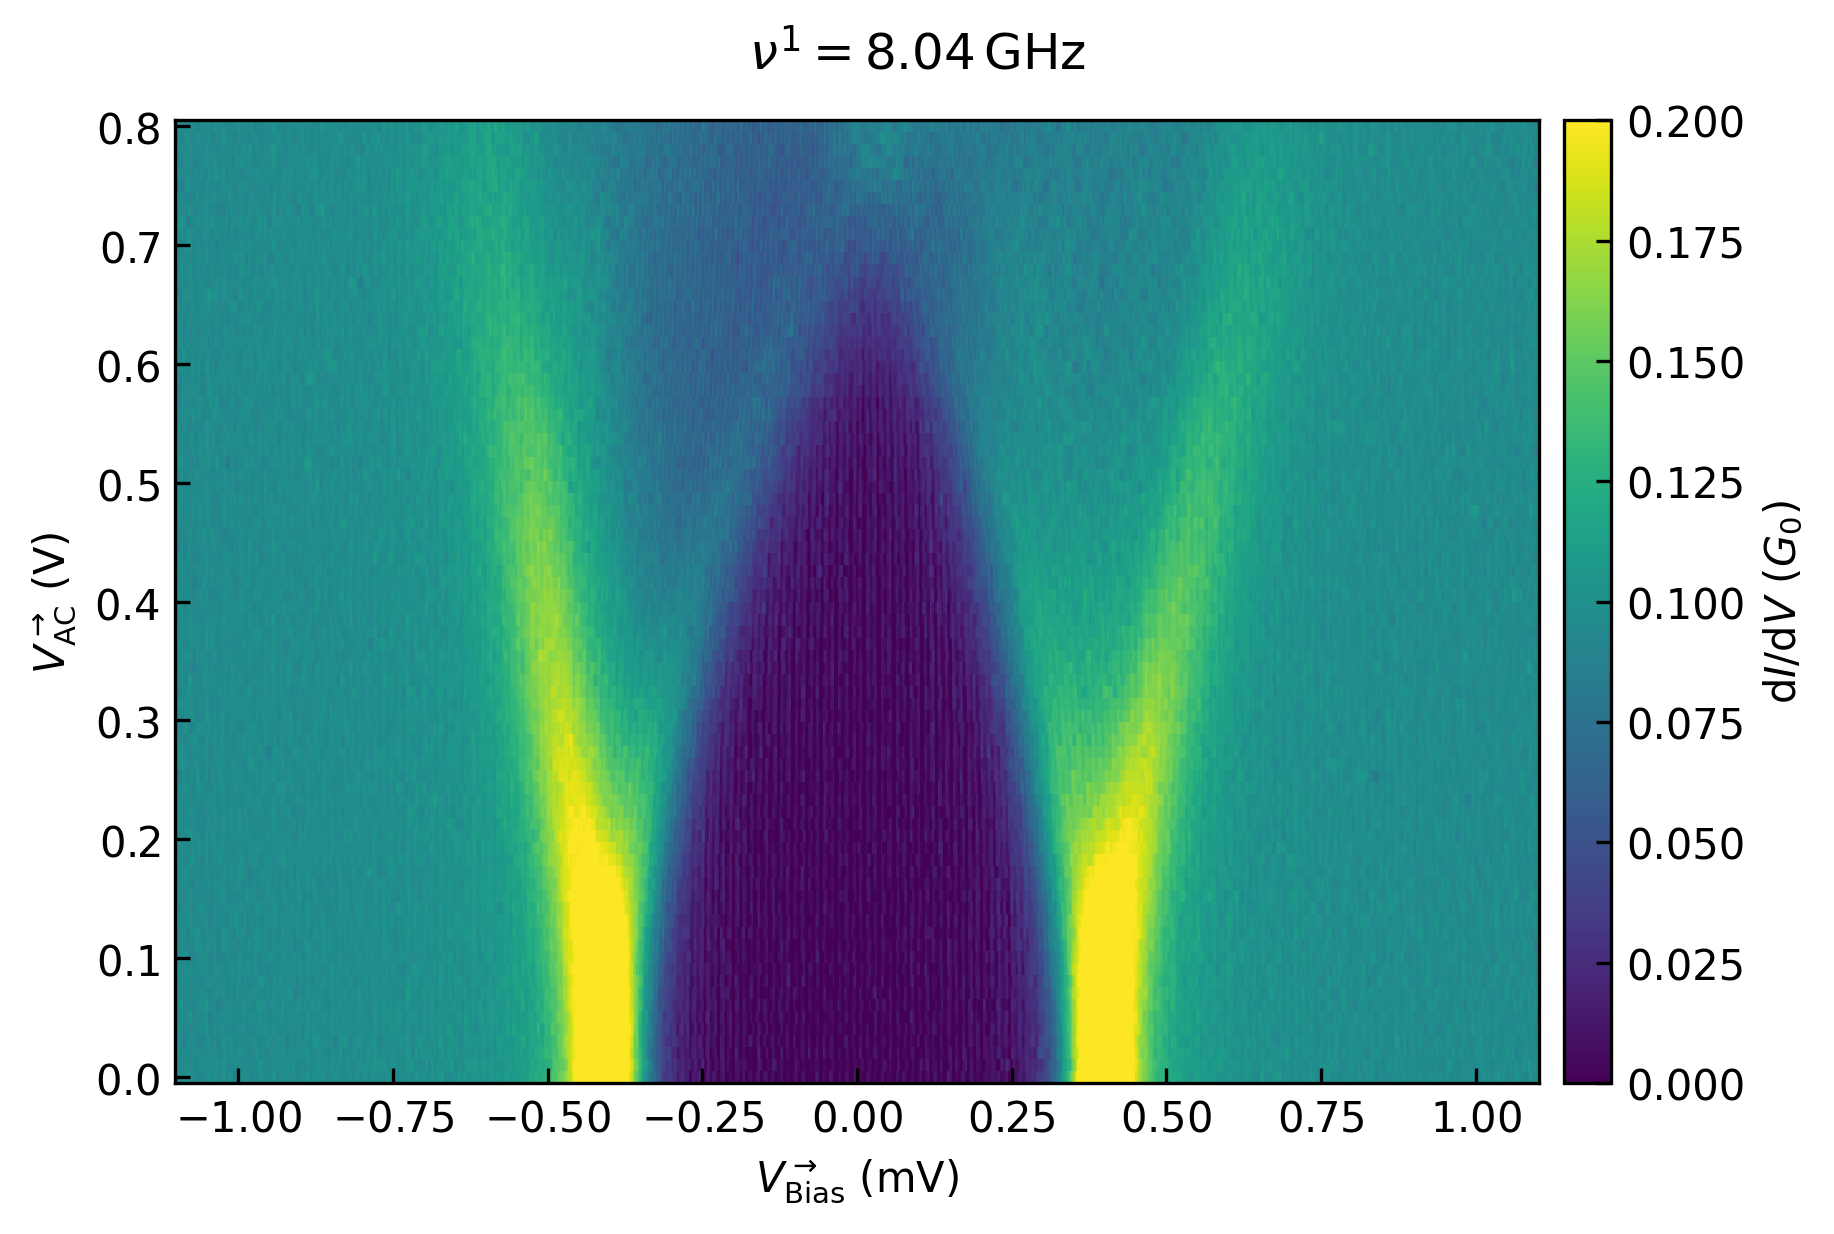

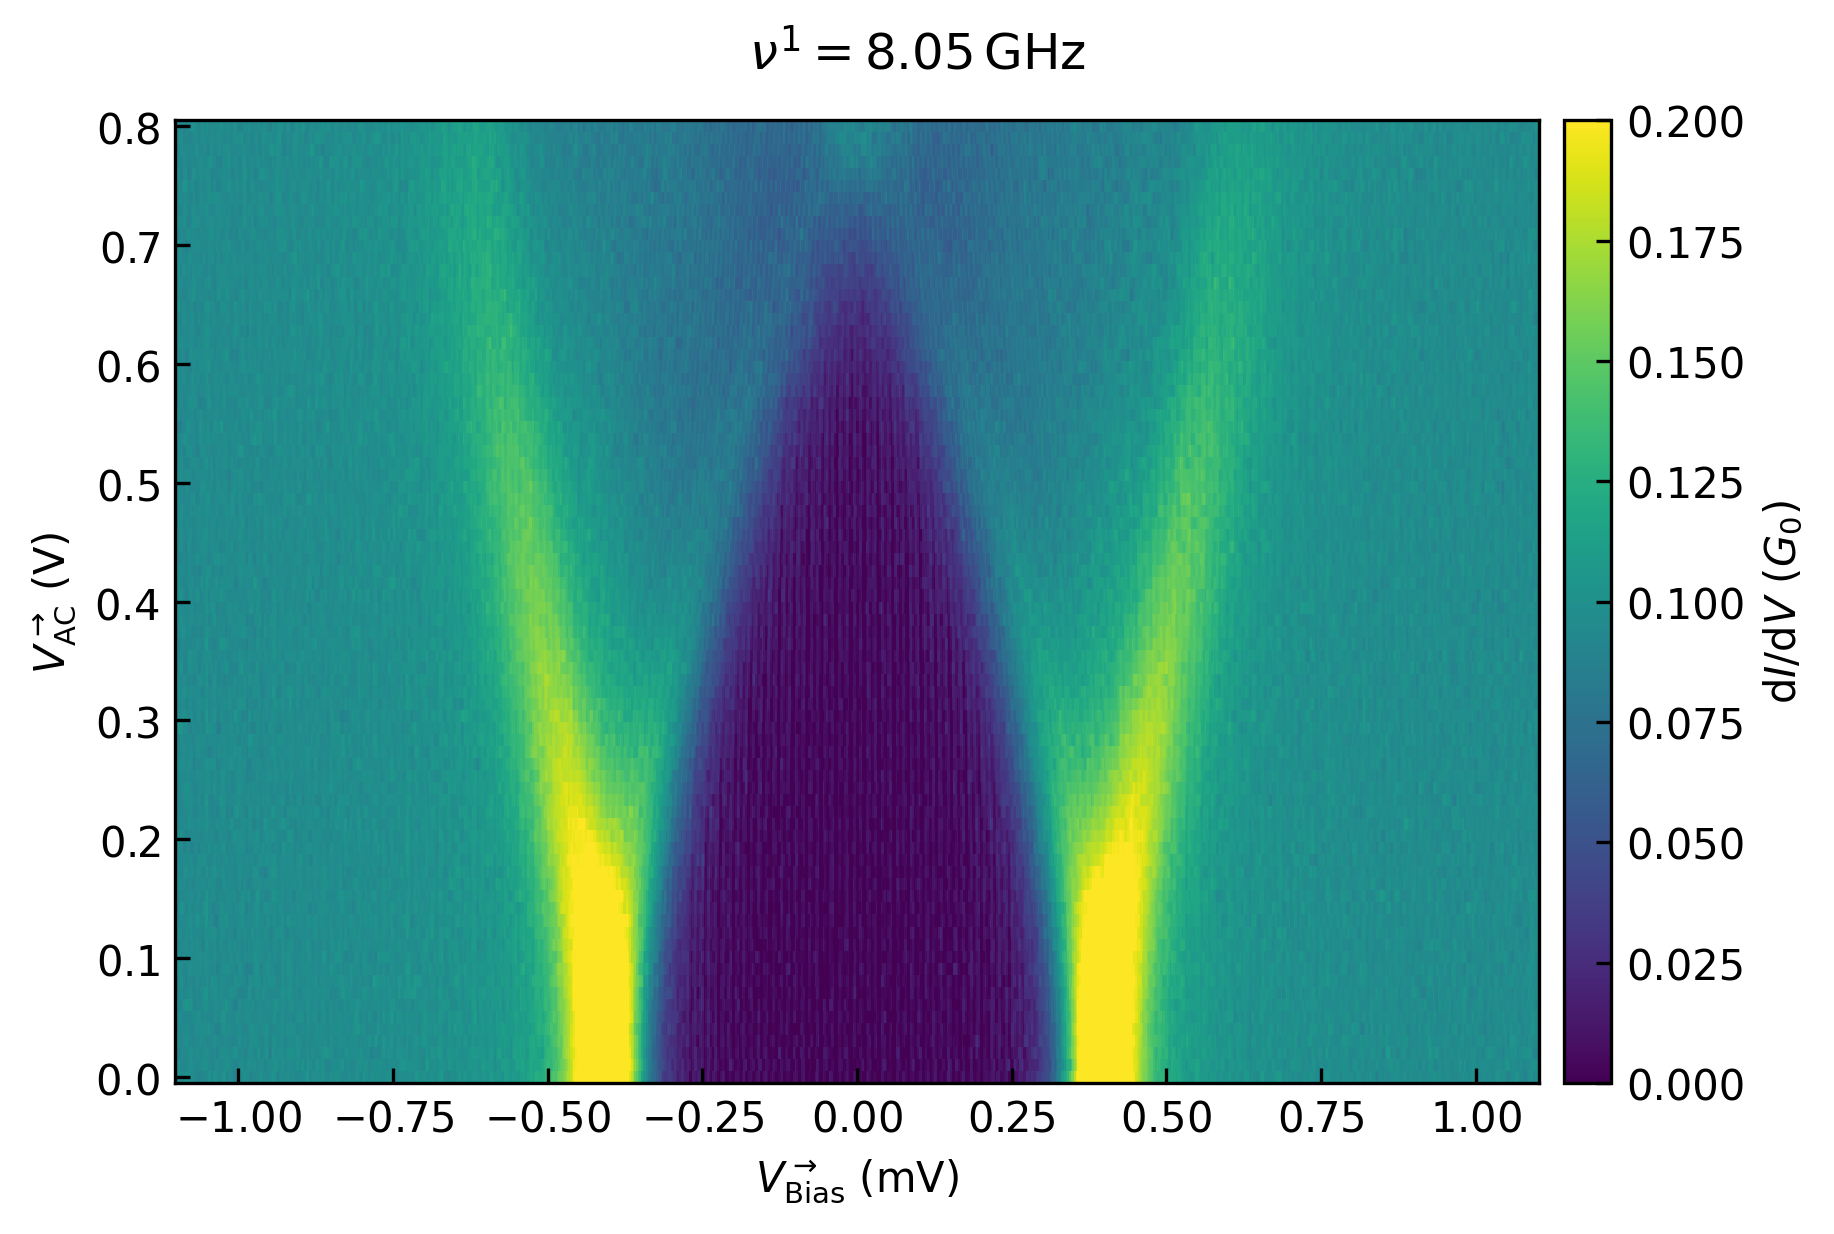

In [134]:
dIdV = savgol_filter(dIdV_up, window_length=10, polyorder=2)
dIdV = dIdV.reshape(np.shape(nu)[0],np.shape(v_ac)[0],np.shape(V)[0])
for i,n in enumerate(nu):
    img =  dIdV[i,:,:]/G_0
    fig, ax_img, ax_clb, ext = IV_plotting(    
        img = img,
        x = V*1e3,
        y = v_ac,
        x_lim=(-1.1, 1.1),
        # y_lim=(0, .75),
        clim=(0,.2),
        # cmap = cmap(color='seeblau'),
        cmap='viridis',
        xlabel='$V_\mathrm{Bias}^\\rightarrow$ (mV)',
        ylabel='$V_\mathrm{AC}^\\rightarrow$ (V)',
        clabel='d$I/$d$V$ ($G_0$)',
        suptitle=f'$\\nu^1 = {n:.2f}\,$GHz',
        
        dpi = 300,
        fig_nr = i,
        title = f'{i:04}',
        path = 'irradiation_figures',
        )

In [ ]:
# ffmpeg -r 20 -i %04d.png -vf scale="823:-2" -c:v libx264 -crf 0 -r 30 ksweep.mp4  
# ffmpeg -r 10 -i %04d.png -vf scale="823:-2" -c:v libx264 -crf 0 -r 30 fsweep.mp4

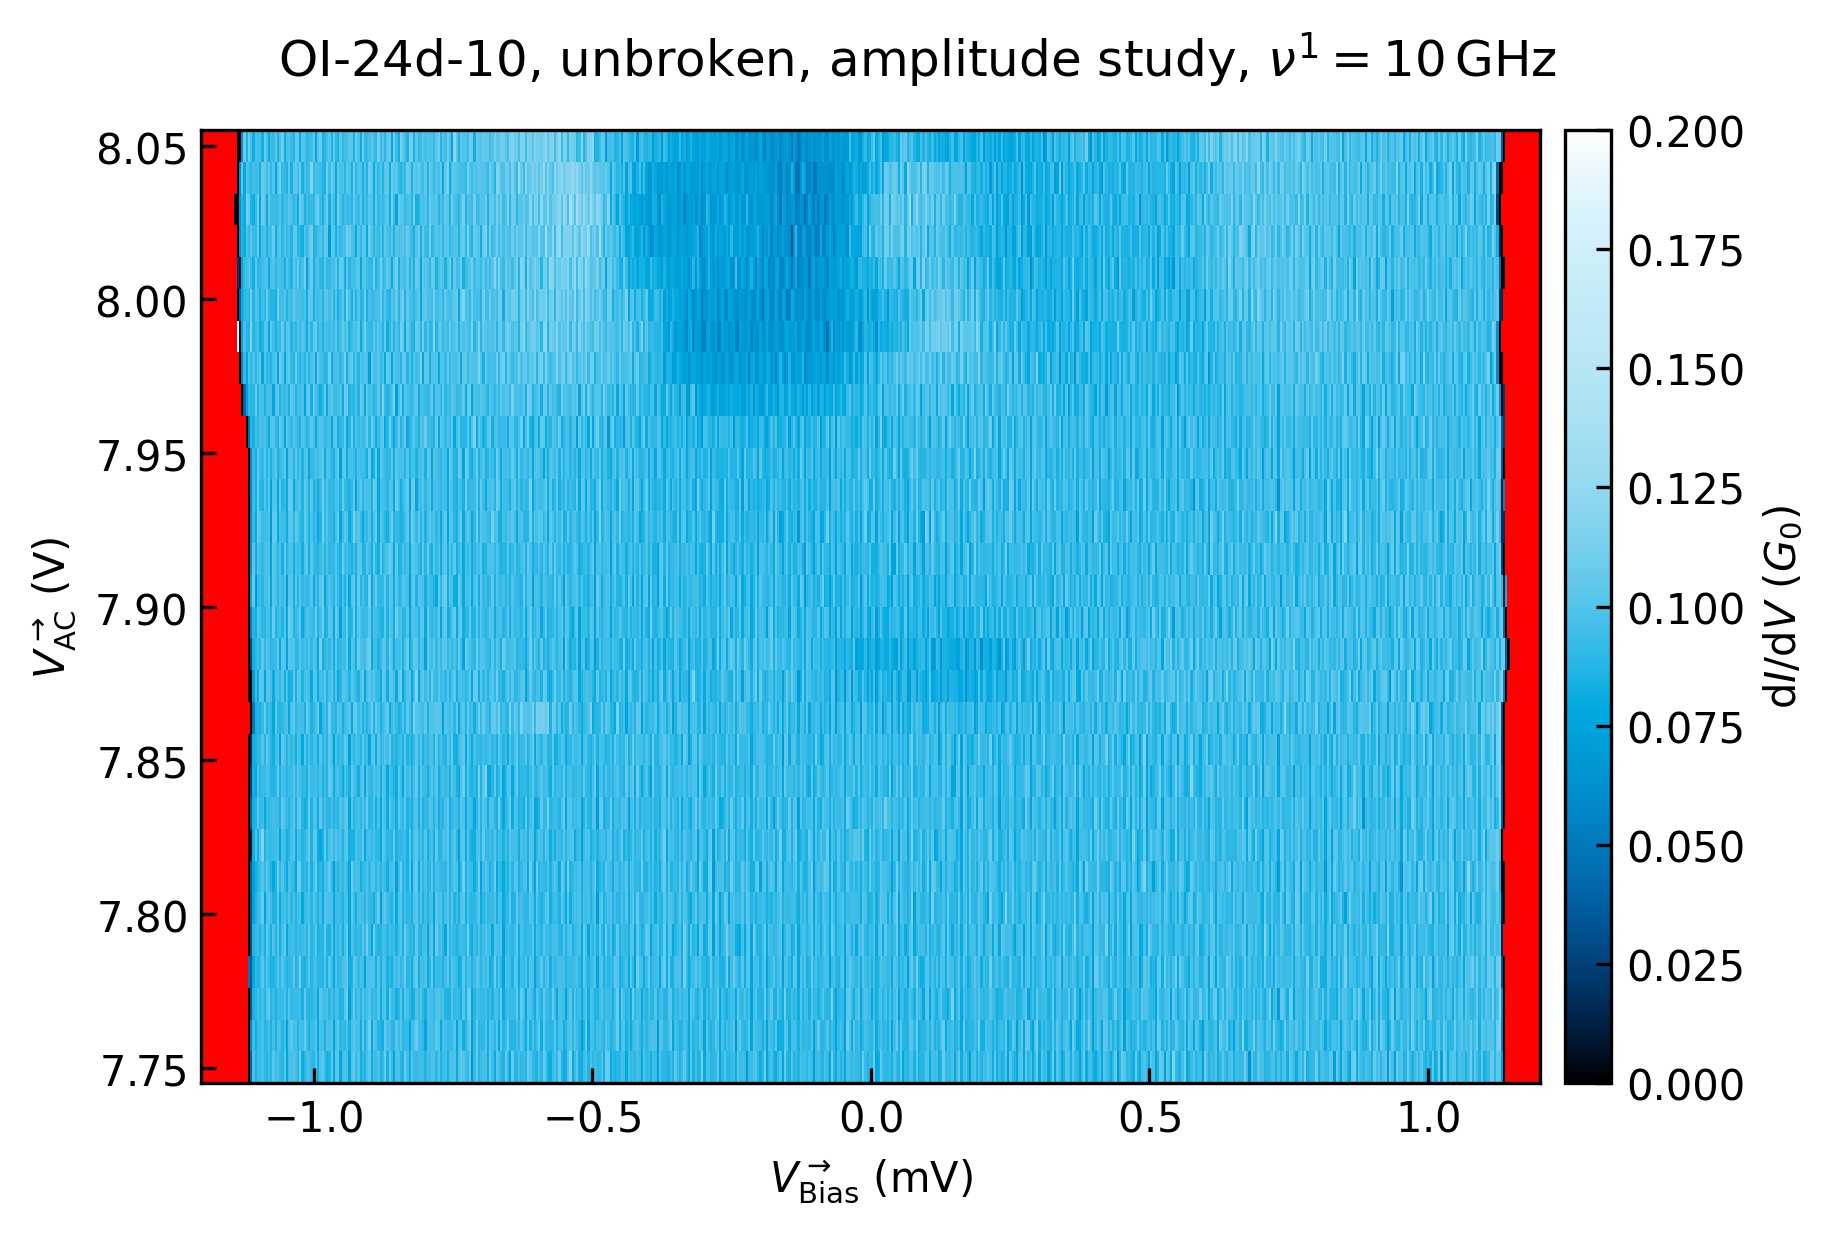

In [100]:
fig, ax_img, ax_clb, ext = IV_plotting(    
img = dIdV_up/G_0,
x = V*1e3,
y = y,
x_lim=(-1.2, 1.2),
# y_lim=(0, .75),
clim=(0,.2),
cmap = cmap(color='seeblau'),
# cmap='viridis',
xlabel='$V_\mathrm{Bias}^\\rightarrow$ (mV)',
ylabel='$V_\mathrm{AC}^\\rightarrow$ (V)',
clabel='d$I/$d$V$ ($G_0$)',
suptitle=f'OI-24d-10, unbroken, amplitude study, $\\nu^1 = 10\,$GHz',
dpi = 300,
fig_nr = 0,
title = 'OI-24d-10, unbroken, amplitude study, nu^1=10.0000 GHz'
)

In [32]:
a=3
for i in [a]:
    print(3)

3


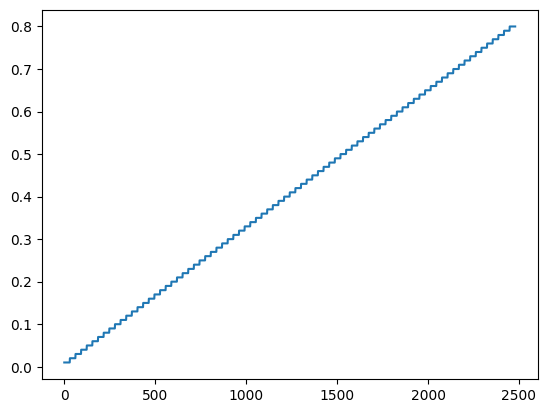

In [16]:
plt.plot(V_AC)

In [ ]:


y, skeys = get_keys(
file=file, 
mkey=mkey, 
to_pop='no_irradiation',
i1=14, 
i2=-1, 
)
# y = np.concatenate((np.array([0,0]),y))
# skeys = [b'no_irradiation',b'no_irradiation'] + skeys

V, I_up, I_down, dIdV_up, dIdV_down, t = IV_mapping(
file = file,
mkey = mkey,
skeys = skeys,
y = y,
V_min=-1.8e-3,
V_max=1.8e-3,
N_bins=900,
V1_AMP=V1_AMP,
V2_AMP=V2_AMP,
R_REF=R_REF,
)
smmoth_dIdV = savgol_filter(dIdV_up, window_length=20, polyorder=2)

%matplotlib inline
fig, ax_img, ax_clb, ext = IV_plotting(    
img = dIdV_up/G_0,
x = V*1e3,
y = y,
x_lim=(-1.2, 1.2),
# y_lim=(0, .75),
clim=(0,.2),
cmap = cmap(color='seeblau'),
# cmap='viridis',
xlabel='$V_\mathrm{Bias}^\\rightarrow$ (mV)',
ylabel='$V_\mathrm{AC}^\\rightarrow$ (V)',
clabel='d$I/$d$V$ ($G_0$)',
suptitle=f'OI-24d-10, unbroken, amplitude study, $\\nu^1 = 10\,$GHz',
dpi = 300,
fig_nr = 0,
title = 'OI-24d-10, unbroken, amplitude study, nu^1=10.0000 GHz'
)